In [1]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user
# !jupyter nbextension enable toc2/main
# !pip install seaborn
# !pip install statsmodels

In [2]:
!pip freeze

anaconda-anon-usage @ file:///croot/anaconda-anon-usage_1697038922993/work
anaconda-client @ file:///croot/anaconda-client_1694625250883/work
anaconda-cloud-auth @ file:///croot/anaconda-cloud-auth_1697462711326/work
anaconda-navigator @ file:///croot/anaconda-navigator_1695236675007/work
anaconda-project @ file:///opt/conda/conda-bld/anaconda-project_1660339890420/work
anyio==4.2.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1697661133851/work
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-generator==1.10
async-lru==2.0.4
attrs @ file:///croot/attrs_1695717823297/work
Babel==2.14.0
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
beautifulsoup4 @ file:///croot/beautifulsoup4-split_1681493039619/work
bleach==6.1.0
boltons @ file:///croot/boltons_16

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats as stats

<a id="understanding-datasets"></a>
# 1. Understanding the Datasets #
We'll look at the raw datasets to verify the columns and data types, identify any obvious shortcomings in the data, and get an overview for the overarching patterns shared across the datasets.

<a id="bitcoin-datasets"></a>
## 1.1 Bitcoin Datasets

<a id="bitcoin-daily-trade-records"></a>
### 1.1.1 Bitcoin Daily Trade Records

In [4]:
btc_daily = pd.read_csv("transformed_BTC_daily_data.csv")
btc_daily.head()

record_id coin_symbol        date     open      low     high    close  \
0    BTC649         BTC  2020-04-20  7132.88  6770.07  7225.23  6842.45   
1    BTC650         BTC  2020-04-21  6842.45  6779.51  6948.78  6855.11   
2    BTC651         BTC  2020-04-22  6855.11  6831.44  7165.43  7135.41   
3    BTC652         BTC  2020-04-23  7135.41  7041.20  7731.56  7489.25   
4    BTC653         BTC  2020-04-24  7489.25  7408.35  7607.28  7509.44   

   trade_vol_native  trade_vol_USD  
0          64707.00   4.523198e+08  
1          44531.91   3.058443e+08  
2          43780.72   3.082545e+08  
3          81106.87   5.991958e+08  
4          51734.50   3.890271e+08

In [5]:
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_id         1353 non-null   object 
 1   coin_symbol       1353 non-null   object 
 2   date              1353 non-null   object 
 3   open              1353 non-null   float64
 4   low               1353 non-null   float64
 5   high              1353 non-null   float64
 6   close             1353 non-null   float64
 7   trade_vol_native  1353 non-null   float64
 8   trade_vol_USD     1353 non-null   float64
dtypes: float64(6), object(3)
memory usage: 95.3+ KB


In [6]:
btc_daily.describe()

open           low          high         close  \
count   1353.000000   1353.000000   1353.000000   1353.000000   
mean   30575.412616  29776.149254  31318.751471  30603.380613   
std    14446.758628  13970.884584  14851.199082  14437.969967   
min     6842.450000   6770.070000   6948.780000   6842.450000   
25%    19425.630000  19065.870000  19911.790000  19441.960000   
50%    28694.700000  28135.500000  29245.270000  28702.800000   
75%    41235.580000  39980.360000  42372.050000  41243.160000   
max    67549.140000  66312.420000  68978.640000  67549.140000   

       trade_vol_native  trade_vol_USD  
count       1353.000000   1.353000e+03  
mean       41940.710355   1.246852e+09  
std        28091.929365   1.024939e+09  
min         3495.960000   9.302473e+07  
25%        23891.170000   5.493114e+08  
50%        35382.360000   1.011310e+09  
75%        51976.970000   1.596039e+09  
max       290986.060000   1.112022e+10

<a id="bitcoin-hourly-trade-records"></a>
### 1.1.2 Bitcoin Hourly Trade Records

In [7]:
btc_hourly = pd.read_csv("transformed_BTC_hourly_data.csv")
btc_hourly.head()

record_id coin_symbol        date   hour      open       low      high  \
0  BTC_H00001         BTC  2023-10-11  09:00  27107.75  27093.50  27290.42   
1  BTC_H00002         BTC  2023-10-11  10:00  27285.58  27225.10  27333.27   
2  BTC_H00003         BTC  2023-10-11  11:00  27281.95  27179.59  27299.00   
3  BTC_H00004         BTC  2023-10-11  12:00  27199.27  27052.04  27262.54   
4  BTC_H00005         BTC  2023-10-11  13:00  27169.68  27079.81  27184.26   

      close  hr_trade_vol_native  hr_trade_vol_USD  
0  27285.58              1352.43       36766511.64  
1  27281.95               846.60       23088197.88  
2  27199.27               699.87       19065159.84  
3  27169.68              1303.31       35398168.61  
4  27145.83              1150.58       31210898.40

In [8]:
btc_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34017 entries, 0 to 34016
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            34017 non-null  object 
 1   coin_symbol          34017 non-null  object 
 2   date                 34017 non-null  object 
 3   hour                 34017 non-null  object 
 4   open                 34017 non-null  float64
 5   low                  34017 non-null  float64
 6   high                 34017 non-null  float64
 7   close                34017 non-null  float64
 8   hr_trade_vol_native  34017 non-null  float64
 9   hr_trade_vol_USD     34017 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.6+ MB


In [9]:
btc_hourly.describe()

open           low          high         close  \
count  34017.000000  34017.000000  34017.000000  34017.000000   
mean   29532.881439  29391.368044  29667.551367  29533.885732   
std    14903.438552  14816.767553  14984.733547  14903.248647   
min     4240.690000   3948.920000   4623.450000   4240.690000   
25%    18546.430000  18432.740000  18639.240000  18546.790000   
50%    27891.240000  27789.460000  27961.530000  27891.930000   
75%    40407.060000  40168.540000  40592.730000  40408.980000   
max    68624.180000  68464.620000  68978.640000  68624.180000   

       hr_trade_vol_native  hr_trade_vol_USD  
count         34017.000000      3.401700e+04  
mean           1861.712988      5.316416e+07  
std            3376.186086      1.230502e+08  
min              47.400000      1.377541e+06  
25%             709.360000      1.588111e+07  
50%            1240.100000      3.202599e+07  
75%            2143.390000      6.255356e+07  
max          235647.610000      7.859574e+09

<a id="bitcoin-dataset-takeaways"></a>
### 1.1.3 Bitcoin Dataset Takeaways 
- Bitcoin daily trade records (BDR) has 1353 rows, none of which are null.  
- Bitcoin hourly trade records (BHR) has 34,017 rows, none of which are null.
- There do not appear to be any abnormally small figures.
- There are large margins between the min and max values, both in terms of trading price and trade volume.

<a id="ethereum-datasets"></a>
## 1.2 Ethereum Datasets 

<a id="ethereum-daily-trade-records"></a>
### 1.2.1 Ethereum Daily Trade Records

In [10]:
eth_daily = pd.read_csv("transformed_ETH_daily_data.csv")
eth_daily.head()

record_id coin_symbol        date    open     low    high   close  \
0    ETH649         ETH  2020-04-20  180.32  169.08  176.88  170.65   
1    ETH650         ETH  2020-04-21  170.65  170.14  173.37  171.03   
2    ETH651         ETH  2020-04-22  171.03  177.67  183.59  183.02   
3    ETH652         ETH  2020-04-23  183.02  184.68  194.80  185.73   
4    ETH653         ETH  2020-04-24  185.73  186.01  188.49  187.66   

   trade_vol_native  trade_vol_USD  
0        2362597.95   4.031790e+08  
1        1526448.92   2.610762e+08  
2        1563646.41   2.861837e+08  
3        2006279.73   3.726332e+08  
4        1279874.65   2.401824e+08

In [11]:
eth_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_id         1353 non-null   object 
 1   coin_symbol       1353 non-null   object 
 2   date              1353 non-null   object 
 3   open              1353 non-null   float64
 4   low               1353 non-null   float64
 5   high              1353 non-null   float64
 6   close             1353 non-null   float64
 7   trade_vol_native  1353 non-null   float64
 8   trade_vol_USD     1353 non-null   float64
dtypes: float64(6), object(3)
memory usage: 95.3+ KB


In [12]:
eth_daily.describe()

open          low         high        close  trade_vol_native  \
count  1353.000000  1353.000000  1353.000000  1353.000000      1.353000e+03   
mean   1840.313843  1780.458078  1894.905942  1841.922077      5.230868e+05   
std    1059.035778  1020.396855  1091.205168  1058.164189      4.390908e+05   
min     170.650000   169.080000   173.370000   170.650000      2.981167e+04   
25%    1233.730000  1198.200000  1275.000000  1234.100000      2.498074e+05   
50%    1775.760000  1716.260000  1817.330000  1776.160000      3.955594e+05   
75%    2367.700000  2268.200000  2469.050000  2367.700000      6.380082e+05   
max    4810.970000  4710.000000  4865.940000  4810.970000      3.649323e+06   

       trade_vol_USD  
count   1.353000e+03  
mean    8.153200e+08  
std     7.729194e+08  
min     3.759109e+07  
25%     3.032891e+08  
50%     6.374480e+08  
75%     1.045739e+09  
max     9.657969e+09

<a id="ethereum-hourly-trade-records"></a>
### 1.2.2 Ethereum Hourly Trade Records

In [13]:
eth_hourly = pd.read_csv("transformed_ETH_hourly_data.csv")
eth_hourly.head()

record_id coin_symbol        date   hour     open      low     high  \
0  ETH_H00001         ETH  2023-10-11  09:00  1564.27  1563.12  1578.15   
1  ETH_H00002         ETH  2023-10-11  10:00  1576.23  1573.08  1578.37   
2  ETH_H00003         ETH  2023-10-11  11:00  1576.08  1571.70  1578.14   
3  ETH_H00004         ETH  2023-10-11  12:00  1572.76  1565.81  1576.55   
4  ETH_H00005         ETH  2023-10-11  13:00  1572.50  1566.72  1573.76   

     close  hr_trade_vol_native  hr_trade_vol_USD  
0  1576.23              9208.90       14466020.49  
1  1576.08              5515.81        8692493.54  
2  1572.76              6409.13       10094485.02  
3  1572.50             11991.00       18855727.60  
4  1573.67              8298.72       13038289.55

In [14]:
eth_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34017 entries, 0 to 34016
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            34017 non-null  object 
 1   coin_symbol          34017 non-null  object 
 2   date                 34017 non-null  object 
 3   hour                 34017 non-null  object 
 4   open                 34017 non-null  float64
 5   low                  34017 non-null  float64
 6   high                 34017 non-null  float64
 7   close                34017 non-null  float64
 8   hr_trade_vol_native  34017 non-null  float64
 9   hr_trade_vol_USD     34017 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.6+ MB


In [15]:
eth_hourly.describe()

open           low          high         close  \
count  34017.000000  34017.000000  34017.000000  34017.000000   
mean    1765.088211   1754.823530   1774.819685   1765.148183   
std     1089.752121   1082.795226   1096.226708   1089.726979   
min       99.230000     96.730000    100.970000     99.230000   
25%     1167.240000   1156.190000   1174.660000   1167.300000   
50%     1715.400000   1705.240000   1722.690000   1715.410000   
75%     2305.690000   2290.120000   2322.580000   2305.850000   
max     4848.030000   4835.790000   4865.940000   4848.030000   

       hr_trade_vol_native  hr_trade_vol_USD  
count         3.401700e+04      3.401700e+04  
mean          2.690316e+04      3.395412e+07  
std           3.944984e+04      4.349840e+07  
min           4.908100e+02      8.557134e+05  
25%           8.021040e+03      1.014574e+07  
50%           1.558147e+04      2.101594e+07  
75%           2.988619e+04      4.158215e+07  
max           1.029523e+06      1.030309e+09

<a id="ethereum-dataset-takeaways"></a>
### 1.2.3 Ethereum Dataset Takeaways 
- Ethereum daily trade records (EDR) has 1353 rows, none of which are null.
- Ethereum hourly trade records (EHR) has 34,017, none of which are null.
- There do not appear to be any abnormally small figures.
- The bargin between Ethereum's minimum and maximum values are much greater than those of Bitcoin.

<a id="solana-trade-records"></a>
## 1.3 Solana Trade Records

<a id="solana-daily-trade-records"></a>
### 1.3.1 Solana Daily Trade Records

In [16]:
sol_daily = pd.read_csv("transformed_SOL_daily_data.csv")
sol_daily.head()

record_id coin_symbol        date    open     low    high   close  \
0    SOL649         SOL  2020-04-20  0.6047  0.5217  0.6099  0.5321   
1    SOL650         SOL  2020-04-21  0.5321  0.5092  0.5961  0.5786   
2    SOL651         SOL  2020-04-22  0.5786  0.5901  0.7123  0.6941   
3    SOL652         SOL  2020-04-23  0.6941  0.6074  0.7356  0.6313   
4    SOL653         SOL  2020-04-24  0.6313  0.6107  0.6668  0.6254   

   trade_vol_native  trade_vol_USD  
0         4542657.0     2417317.40  
1         6140323.0     3552614.56  
2        15462983.0    10732258.56  
3        10371579.0     6547255.09  
4         3667234.0     2293437.40

In [17]:
sol_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_id         1353 non-null   object 
 1   coin_symbol       1353 non-null   object 
 2   date              1353 non-null   object 
 3   open              1353 non-null   float64
 4   low               1353 non-null   float64
 5   high              1353 non-null   float64
 6   close             1353 non-null   float64
 7   trade_vol_native  1353 non-null   float64
 8   trade_vol_USD     1353 non-null   float64
dtypes: float64(6), object(3)
memory usage: 95.3+ KB


In [18]:
sol_daily.describe()

open          low         high        close  trade_vol_native  \
count  1353.000000  1353.000000  1353.000000  1353.000000      1.353000e+03   
mean     45.553063    43.342169    47.816141    45.631571      2.709639e+06   
std      54.046185    51.383066    56.508158    54.058041      2.649497e+06   
min       0.515600     0.505800     0.555700     0.515600      2.130939e+04   
25%      13.190000    12.390000    13.780000    13.250000      1.004785e+06   
50%      24.760000    23.860000    25.620000    24.810000      1.998841e+06   
75%      47.590000    44.580000    51.910000    47.920000      3.625716e+06   
max     258.630000   245.900000   259.950000   258.630000      3.246075e+07   

       trade_vol_USD  
count   1.353000e+03  
mean    1.552570e+08  
std     2.379963e+08  
min     5.580379e+04  
25%     1.053316e+07  
50%     5.690215e+07  
75%     2.058698e+08  
max     2.460799e+09

<a id="solana-hourly-trade-records"></a>
### 1.3.2 Solana Hourly Trade Records

In [19]:
sol_hourly = pd.read_csv("transformed_SOL_hourly_data.csv")
sol_hourly.head()

record_id coin_symbol        date   hour   open    low   high  close  \
0  SOL_H00001         SOL  2023-10-11  09:00  22.20  22.20  22.39  22.35   
1  SOL_H00002         SOL  2023-10-11  10:00  22.35  22.22  22.40  22.26   
2  SOL_H00003         SOL  2023-10-11  11:00  22.26  22.13  22.31  22.15   
3  SOL_H00004         SOL  2023-10-11  12:00  22.15  22.06  22.22  22.15   
4  SOL_H00005         SOL  2023-10-11  13:00  22.15  22.12  22.26  22.25   

   hr_trade_vol_native  hr_trade_vol_USD  
0             27379.29         610755.67  
1             70835.81        1578709.41  
2             73188.91        1623427.09  
3             51005.75        1129847.03  
4             35384.11         785319.34

In [20]:
sol_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34017 entries, 0 to 34016
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            34017 non-null  object 
 1   coin_symbol          34017 non-null  object 
 2   date                 34017 non-null  object 
 3   hour                 34017 non-null  object 
 4   open                 34017 non-null  float64
 5   low                  34017 non-null  float64
 6   high                 34017 non-null  float64
 7   close                34017 non-null  float64
 8   hr_trade_vol_native  34017 non-null  float64
 9   hr_trade_vol_USD     34017 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.6+ MB


In [21]:
sol_hourly.describe()

open           low          high         close  \
count  34017.000000  34017.000000  34017.000000  34017.000000   
mean      43.554473     43.138781     43.960555     43.557458   
std       53.612918     53.097513     54.108684     53.613526   
min        0.000000      0.000000      0.000000      0.000000   
25%        5.786000      5.723000      5.835000      5.804000   
50%       23.790000     23.610000     23.980000     23.790000   
75%       44.910000     44.380000     45.540000     44.910000   
max      258.630000    256.340000    259.950000    258.630000   

       hr_trade_vol_native  hr_trade_vol_USD  
count         3.401700e+04      3.401700e+04  
mean          1.136748e+05      6.010123e+06  
std           1.875772e+05      1.094001e+07  
min           0.000000e+00      0.000000e+00  
25%           2.755900e+04      2.213067e+05  
50%           6.639409e+04      1.794934e+06  
75%           1.374437e+05      7.010805e+06  
max           1.137631e+07      2.466454e+08

<a id="solana-dataset-takeaway"></a>
### 1.3.3. Solana Dataset Takeaway 
- Solana daily trade records (SDR) has 1352 rows, none of which are null
- Solana hourly trade records (SHR) has 34,017 rows, none of which are null
- It's hard to say whether there are aberrations in the data, as the Solana data begins on the first day it begain trading.  As such, the records chart its rise from nothing to its current state
- The min and max values are wildly different

<a id="adding-percent-change-columns"></a>
# 2. Adding % Change Columns
24-hour and 7-day percent change columns are added to the daily trade records, both for close prices as well as trade volumes.
1-hour percent change columns are added to the hourly trade records, both for close prices and trade volumes.  These figures will better allow us to track trade within respective cryptocurrencies, identify possible trade patterns, and to compare patterns between the coins.

<a id="btc-percent-changes-daily"></a>
## 2.1 BTC % Changes, Daily

In [22]:
btc_daily.insert(7, '24h%', btc_daily['close'].pct_change() * 100)
btc_daily.insert(8, '7d%', btc_daily['close'].pct_change(periods=7) * 100)
btc_daily.insert(10, '24h_ntv%', btc_daily['trade_vol_native'].pct_change() * 100)
btc_daily.insert(11, '7d_ntv%', btc_daily['trade_vol_native'].pct_change(periods=7) * 100)
btc_daily.insert(13, '24h_usd%', btc_daily['trade_vol_USD'].pct_change() * 100)
btc_daily.insert(14, '7d_usd%', btc_daily['trade_vol_USD'].pct_change(periods=7) * 100)
btc_daily.head()

record_id coin_symbol        date     open      low     high    close  \
0    BTC649         BTC  2020-04-20  7132.88  6770.07  7225.23  6842.45   
1    BTC650         BTC  2020-04-21  6842.45  6779.51  6948.78  6855.11   
2    BTC651         BTC  2020-04-22  6855.11  6831.44  7165.43  7135.41   
3    BTC652         BTC  2020-04-23  7135.41  7041.20  7731.56  7489.25   
4    BTC653         BTC  2020-04-24  7489.25  7408.35  7607.28  7509.44   

       24h%  7d%  trade_vol_native   24h_ntv%  7d_ntv%  trade_vol_USD  \
0       NaN  NaN          64707.00        NaN      NaN   4.523198e+08   
1  0.185021  NaN          44531.91 -31.179146      NaN   3.058443e+08   
2  4.088921  NaN          43780.72  -1.686858      NaN   3.082545e+08   
3  4.958930  NaN          81106.87  85.257049      NaN   5.991958e+08   
4  0.269586  NaN          51734.50 -36.214405      NaN   3.890271e+08   

    24h_usd%  7d_usd%  
0        NaN      NaN  
1 -32.383190      NaN  
2   0.788052      NaN  
3  94.383509      NaN  
4 -35.075128      NaN

<a id="btc-percent-changes-hourly"></a>
## 2.2 BTC % Changes, Hourly

In [23]:
btc_hourly.insert(8, '1h%', btc_hourly['close'].pct_change() * 100)
btc_hourly.insert(10, '1h_ntv%', btc_hourly['hr_trade_vol_native'].pct_change() * 100)
btc_hourly.insert(12, '1h_usd%', btc_hourly['hr_trade_vol_USD'].pct_change() * 100)
btc_hourly.head()

record_id coin_symbol        date   hour      open       low      high  \
0  BTC_H00001         BTC  2023-10-11  09:00  27107.75  27093.50  27290.42   
1  BTC_H00002         BTC  2023-10-11  10:00  27285.58  27225.10  27333.27   
2  BTC_H00003         BTC  2023-10-11  11:00  27281.95  27179.59  27299.00   
3  BTC_H00004         BTC  2023-10-11  12:00  27199.27  27052.04  27262.54   
4  BTC_H00005         BTC  2023-10-11  13:00  27169.68  27079.81  27184.26   

      close       1h%  hr_trade_vol_native    1h_ntv%  hr_trade_vol_USD  \
0  27285.58       NaN              1352.43        NaN       36766511.64   
1  27281.95 -0.013304               846.60 -37.401566       23088197.88   
2  27199.27 -0.303058               699.87 -17.331680       19065159.84   
3  27169.68 -0.108790              1303.31  86.221727       35398168.61   
4  27145.83 -0.087782              1150.58 -11.718624       31210898.40   

     1h_usd%  
0        NaN  
1 -37.203186  
2 -17.424652  
3  85.669404  
4 -11.829059

<a id="ethereum-percent-changes-daily"></a>
## 2.3 Ethereum % Changes, Daily

In [24]:
# Calculate the '24%' change
eth_daily.insert(7, '24h%', eth_daily['close'].pct_change() * 100)
eth_daily.insert(8, '7d%', eth_daily['close'].pct_change(periods=7) * 100)
eth_daily.insert(10, '24h_ntv%', eth_daily['trade_vol_native'].pct_change() * 100)
eth_daily.insert(11, '7d_ntv%', eth_daily['trade_vol_native'].pct_change(periods=7) * 100)
eth_daily.insert(13, '24h_usd%', eth_daily['trade_vol_USD'].pct_change() * 100)
eth_daily.insert(14, '7d_usd%', eth_daily['trade_vol_USD'].pct_change(periods=7) * 100)
eth_daily.head()

record_id coin_symbol        date    open     low    high   close      24h%  \
0    ETH649         ETH  2020-04-20  180.32  169.08  176.88  170.65       NaN   
1    ETH650         ETH  2020-04-21  170.65  170.14  173.37  171.03  0.222678   
2    ETH651         ETH  2020-04-22  171.03  177.67  183.59  183.02  7.010466   
3    ETH652         ETH  2020-04-23  183.02  184.68  194.80  185.73  1.480712   
4    ETH653         ETH  2020-04-24  185.73  186.01  188.49  187.66  1.039143   

   7d%  trade_vol_native   24h_ntv%  7d_ntv%  trade_vol_USD   24h_usd%  \
0  NaN        2362597.95        NaN      NaN   4.031790e+08        NaN   
1  NaN        1526448.92 -35.391084      NaN   2.610762e+08 -35.245590   
2  NaN        1563646.41   2.436864      NaN   2.861837e+08   9.616921   
3  NaN        2006279.73  28.307763      NaN   3.726332e+08  30.207692   
4  NaN        1279874.65 -36.206570      NaN   2.401824e+08 -35.544534   

   7d_usd%  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

<a id="eth-percent-changes-hourly"></a>
## 2.4 ETH % Changes, Hourly

In [25]:
eth_hourly.insert(8, '1h%', eth_hourly['close'].pct_change() * 100)
eth_hourly.insert(10, '1h_ntv%', eth_hourly['hr_trade_vol_native'].pct_change() * 100)
eth_hourly.insert(12, '1h_usd%', eth_hourly['hr_trade_vol_USD'].pct_change() * 100)
eth_hourly.head()

record_id coin_symbol        date   hour     open      low     high  \
0  ETH_H00001         ETH  2023-10-11  09:00  1564.27  1563.12  1578.15   
1  ETH_H00002         ETH  2023-10-11  10:00  1576.23  1573.08  1578.37   
2  ETH_H00003         ETH  2023-10-11  11:00  1576.08  1571.70  1578.14   
3  ETH_H00004         ETH  2023-10-11  12:00  1572.76  1565.81  1576.55   
4  ETH_H00005         ETH  2023-10-11  13:00  1572.50  1566.72  1573.76   

     close       1h%  hr_trade_vol_native    1h_ntv%  hr_trade_vol_USD  \
0  1576.23       NaN              9208.90        NaN       14466020.49   
1  1576.08 -0.009516              5515.81 -40.103487        8692493.54   
2  1572.76 -0.210649              6409.13  16.195627       10094485.02   
3  1572.50 -0.016531             11991.00  87.092476       18855727.60   
4  1573.67  0.074404              8298.72 -30.792094       13038289.55   

     1h_usd%  
0        NaN  
1 -39.910955  
2  16.128761  
3  86.792368  
4 -30.852366

<a id="sol-percent-changes-daily"></a>
## 2.5 SOL % Changes, Daily

In [26]:
# Calculate the '24%' change
sol_daily.insert(7, '24h%', sol_daily['close'].pct_change() * 100)
sol_daily.insert(8, '7d%', sol_daily['close'].pct_change(periods=7) * 100)
sol_daily.insert(10, '24h_ntv%', sol_daily['trade_vol_native'].pct_change() * 100)
sol_daily.insert(11, '7d_ntv%', sol_daily['trade_vol_native'].pct_change(periods=7) * 100)
sol_daily.insert(13, '24h_usd%', sol_daily['trade_vol_USD'].pct_change() * 100)
sol_daily.insert(14, '7d_usd%', sol_daily['trade_vol_USD'].pct_change(periods=7) * 100)
sol_daily.head()

record_id coin_symbol        date    open     low    high   close  \
0    SOL649         SOL  2020-04-20  0.6047  0.5217  0.6099  0.5321   
1    SOL650         SOL  2020-04-21  0.5321  0.5092  0.5961  0.5786   
2    SOL651         SOL  2020-04-22  0.5786  0.5901  0.7123  0.6941   
3    SOL652         SOL  2020-04-23  0.6941  0.6074  0.7356  0.6313   
4    SOL653         SOL  2020-04-24  0.6313  0.6107  0.6668  0.6254   

        24h%  7d%  trade_vol_native    24h_ntv%  7d_ntv%  trade_vol_USD  \
0        NaN  NaN         4542657.0         NaN      NaN     2417317.40   
1   8.738959  NaN         6140323.0   35.170298      NaN     3552614.56   
2  19.961977  NaN        15462983.0  151.826866      NaN    10732258.56   
3  -9.047688  NaN        10371579.0  -32.926402      NaN     6547255.09   
4  -0.934579  NaN         3667234.0  -64.641507      NaN     2293437.40   

     24h_usd%  7d_usd%  
0         NaN      NaN  
1   46.965167      NaN  
2  202.094651      NaN  
3  -38.994620      NaN  
4  -64.971009      NaN

<a id="sol-percent-changes-hourly"></a>
## SOL % Changes, Hourly

In [27]:
sol_hourly.insert(8, '1h%', sol_hourly['close'].pct_change() * 100)
sol_hourly.insert(10, '1h_ntv%', sol_hourly['hr_trade_vol_native'].pct_change() * 100)
sol_hourly.insert(12, '1h_usd%', sol_hourly['hr_trade_vol_USD'].pct_change() * 100)
sol_hourly.head()

record_id coin_symbol        date   hour   open    low   high  close  \
0  SOL_H00001         SOL  2023-10-11  09:00  22.20  22.20  22.39  22.35   
1  SOL_H00002         SOL  2023-10-11  10:00  22.35  22.22  22.40  22.26   
2  SOL_H00003         SOL  2023-10-11  11:00  22.26  22.13  22.31  22.15   
3  SOL_H00004         SOL  2023-10-11  12:00  22.15  22.06  22.22  22.15   
4  SOL_H00005         SOL  2023-10-11  13:00  22.15  22.12  22.26  22.25   

        1h%  hr_trade_vol_native     1h_ntv%  hr_trade_vol_USD     1h_usd%  
0       NaN             27379.29         NaN         610755.67         NaN  
1 -0.402685             70835.81  158.720405        1578709.41  158.484610  
2 -0.494160             73188.91    3.321907        1623427.09    2.832547  
3  0.000000             51005.75  -30.309455        1129847.03  -30.403587  
4  0.451467             35384.11  -30.627214         785319.34  -30.493304

<a id="analyze-relationships-daily-weekly"></a>
# 3. Analyze Relationships in Trade Patterns - Daily & Weekly
With the foundational data outlined above, we can now begin to look for correlations in inter-coin trade fluctuations

<a id="daily-weekly-changes"></a>
## 3.1 Daily & Weekly Changes
**Dataframe 'daily_weekly_changes' is created as a collection of 24-hour and 7-day change in close price and trade volume for each coin**

In [28]:
daily_weekly_changes = pd.DataFrame({
    'BTC_24h%': btc_daily['24h%'],
    'BTC_7d%': btc_daily['7d%'],
    'BTC_vUSD_24h%': btc_daily['24h_usd%'],
    'BTC_vUSD_7d%': btc_daily['7d_usd%'],
    'ETH_24h%': eth_daily['24h%'],
    'ETH_7d%': eth_daily['7d%'],
    'ETH_vUSD_24h%': eth_daily['24h_usd%'],
    'ETH_vUSD_7d%': eth_daily['7d_usd%'],
    'SOL_24h%': sol_daily['24h%'],
    'SOL_7d%': sol_daily['7d%'],
    'SOL_vUSD_24h%': sol_daily['24h_usd%'],
    'SOL_vUSD_7d%': sol_daily['7d_usd%'],
})
daily_weekly_changes.head()

BTC_24h%  BTC_7d%  BTC_vUSD_24h%  BTC_vUSD_7d%  ETH_24h%  ETH_7d%  \
0       NaN      NaN            NaN           NaN       NaN      NaN   
1  0.185021      NaN     -32.383190           NaN  0.222678      NaN   
2  4.088921      NaN       0.788052           NaN  7.010466      NaN   
3  4.958930      NaN      94.383509           NaN  1.480712      NaN   
4  0.269586      NaN     -35.075128           NaN  1.039143      NaN   

   ETH_vUSD_24h%  ETH_vUSD_7d%   SOL_24h%  SOL_7d%  SOL_vUSD_24h%  \
0            NaN           NaN        NaN      NaN            NaN   
1     -35.245590           NaN   8.738959      NaN      46.965167   
2       9.616921           NaN  19.961977      NaN     202.094651   
3      30.207692           NaN  -9.047688      NaN     -38.994620   
4     -35.544534           NaN  -0.934579      NaN     -64.971009   

   SOL_vUSD_7d%  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [29]:
daily_weekly_changes.describe()

BTC_24h%      BTC_7d%  BTC_vUSD_24h%  BTC_vUSD_7d%     ETH_24h%  \
count  1352.000000  1346.000000    1352.000000   1346.000000  1352.000000   
mean      0.194878     1.333549      15.385219     16.021791     0.289560   
std       3.335027     9.071331      67.066518     73.854859     4.358856   
min     -15.480144   -33.234975     -85.381353    -80.808277   -27.674863   
25%      -1.303917    -3.218770     -27.349972    -27.123266    -1.777109   
50%       0.049824     0.559840       0.771832     -0.780588     0.178812   
75%       1.688973     5.577329      39.230785     37.088915     2.449921   
max      19.472137    38.470578     534.264359   1029.387847    26.298877   

           ETH_7d%  ETH_vUSD_24h%  ETH_vUSD_7d%     SOL_24h%      SOL_7d%  \
count  1346.000000    1352.000000   1346.000000  1352.000000  1346.000000   
mean      1.991395      12.473322     18.049119     0.652728     4.645073   
std      11.668471      58.018886     76.887369     7.256003    20.907620   
min     -41.481744     -77.948031    -88.480696   -41.007494   -60.558417   
25%      -4.275962     -25.228979    -29.565773    -3.247572    -8.185000   
50%       0.726665      -1.110891     -0.465066    -0.015273     0.868690   
75%       7.686273      35.161316     39.908214     3.862602    13.590147   
max      66.572680     356.750219    555.523997    45.985401   112.006861   

       SOL_vUSD_24h%  SOL_vUSD_7d%  
count    1352.000000   1346.000000  
mean       23.085536     41.197505  
std       149.173149    147.275240  
min       -98.273969    -98.509813  
25%       -27.749569    -35.701489  
50%        -0.493344      0.302010  
75%        36.406722     54.959876  
max      3220.139912   1590.045863

<a id="pearson-correlation"></a>
## 3.2 Pearson Correlation
**A Pearson Correlation is created as 'day_week_matrix', which is then used for plotting a heat map**

In [30]:
day_week_matrix = daily_weekly_changes.corr()
day_week_matrix

BTC_24h%   BTC_7d%  BTC_vUSD_24h%  BTC_vUSD_7d%  ETH_24h%  \
BTC_24h%       1.000000  0.394509      -0.009909      0.028884  0.801204   
BTC_7d%        0.394509  1.000000       0.010353      0.143582  0.301618   
BTC_vUSD_24h% -0.009909  0.010353       1.000000      0.301516 -0.099473   
BTC_vUSD_7d%   0.028884  0.143582       0.301516      1.000000 -0.059471   
ETH_24h%       0.801204  0.301618      -0.099473     -0.059471  1.000000   
ETH_7d%        0.322530  0.794241      -0.009910      0.078047  0.382991   
ETH_vUSD_24h% -0.091195 -0.009091       0.804843      0.258680 -0.054032   
ETH_vUSD_7d%  -0.024674  0.086445       0.193221      0.700429 -0.004299   
SOL_24h%       0.481012  0.208887      -0.078005      0.020019  0.574546   
SOL_7d%        0.177155  0.462033      -0.004231      0.077950  0.202031   
SOL_vUSD_24h% -0.029237  0.004171       0.265545      0.071502 -0.045015   
SOL_vUSD_7d%  -0.057995  0.003475       0.085277      0.351162 -0.055633   

                ETH_7d%  ETH_vUSD_24h%  ETH_vUSD_7d%  SOL_24h%   SOL_7d%  \
BTC_24h%       0.322530      -0.091195     -0.024674  0.481012  0.177155   
BTC_7d%        0.794241      -0.009091      0.086445  0.208887  0.462033   
BTC_vUSD_24h% -0.009910       0.804843      0.193221 -0.078005 -0.004231   
BTC_vUSD_7d%   0.078047       0.258680      0.700429  0.020019  0.077950   
ETH_24h%       0.382991      -0.054032     -0.004299  0.574546  0.202031   
ETH_7d%        1.000000       0.002157      0.192536  0.252748  0.547885   
ETH_vUSD_24h%  0.002157       1.000000      0.285429 -0.084327  0.001390   
ETH_vUSD_7d%   0.192536       0.285429      1.000000  0.005434  0.105011   
SOL_24h%       0.252748      -0.084327      0.005434  1.000000  0.387057   
SOL_7d%        0.547885       0.001390      0.105011  0.387057  1.000000   
SOL_vUSD_24h%  0.016943       0.222306      0.042823  0.091008  0.022030   
SOL_vUSD_7d%   0.030497       0.083629      0.286456  0.175308  0.350282   

               SOL_vUSD_24h%  SOL_vUSD_7d%  
BTC_24h%           -0.029237     -0.057995  
BTC_7d%             0.004171      0.003475  
BTC_vUSD_24h%       0.265545      0.085277  
BTC_vUSD_7d%        0.071502      0.351162  
ETH_24h%           -0.045015     -0.055633  
ETH_7d%             0.016943      0.030497  
ETH_vUSD_24h%       0.222306      0.083629  
ETH_vUSD_7d%        0.042823      0.286456  
SOL_24h%            0.091008      0.175308  
SOL_7d%             0.022030      0.350282  
SOL_vUSD_24h%       1.000000      0.371870  
SOL_vUSD_7d%        0.371870      1.000000

<a id="heatmap-daily-weekly-correlation"></a>
## 3.3 Heatmap Daily/Weekly Correlation
Heatmaps are used to give a graphical representation of the matrices variables and make linear correlation more easily identifiable.  Scores of +/- 0.7 or more in absolute value are considered as significantly positively/negatively correlated.  Scores of +/- 0.45 to 0.69 are considered more moderately correlated.  Scores less than that, in absolute value, aren't considered as possessing relevant correlation.

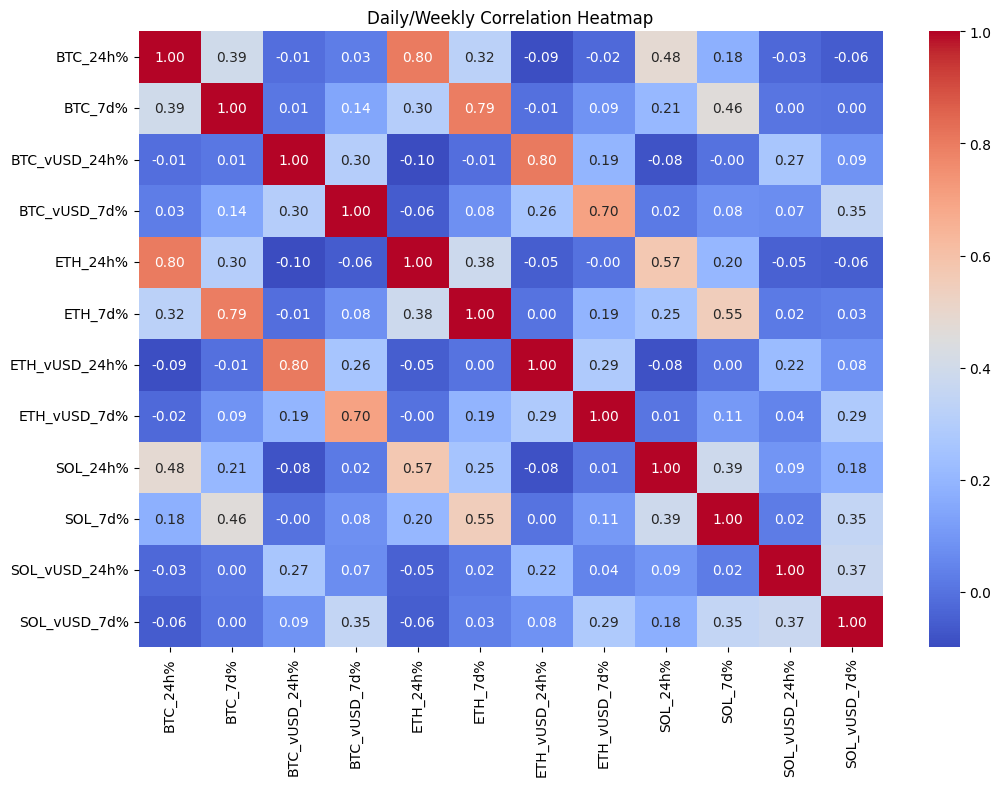

In [31]:
# daily/weekly heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(day_week_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Daily/Weekly Correlation Heatmap")
plt.show()

<a id="heatmap-daily-weekly-reflections"></a>
### 3.3.1 Heatmap Daily/Weekly Reflections
- There is a significant correlation between 24-hour and 7-day Bitcoin and Ethereum price changes and trade volume changes.
- There is a moderate correlation between the 24-hour and 7-day price changes of Ethereum amd Solana as well as Bitcoin and Solana.
- There doesn't appear to be any noteworthy correlation between the changes in trade volume of Bitcoin and Solana or Ethereum and Solana.
- There doesn't appear to be any noteworthy correlation between changes in prices and changes in trade volumes.

<a id="scatter-plots-daily-weekly"></a>
# 4. Scatter plots : Daily & Weekly Changes
**Scatter plots will allow for focused observation of two-variable pairs from the daily_weekly_changes dataframe.  A Seaborn regplots are used to illustrate how the observed data fit around a regression line, and to what degree of confidence the data do so.**

<a id="scatter-plots-btc-eth"></a>
## 4.1 Scatter Plots: BTC vs ETH

<a id="scatter-btc-vs-eth-price-changes"></a>
### 4.1.1 BTC vs ETH Price Changes

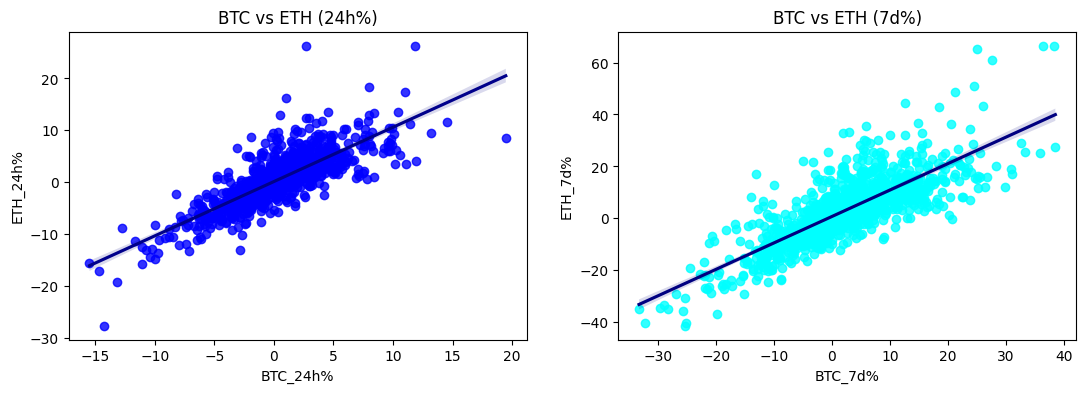

In [32]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (24h% and 7d%)
sns.regplot(x='BTC_24h%', y='ETH_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"})
axs[0].set_title('BTC vs ETH (24h%)')
sns.regplot(x='BTC_7d%', y='ETH_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "cyan"}, line_kws={"color": "navy"})
axs[1].set_title('BTC vs ETH (7d%)')
plt.show()


<a id="scatter-btc-vs-eth-vusd-changes"></a>
### 4.1.2 BTC vs ETH Trade Volume Changes

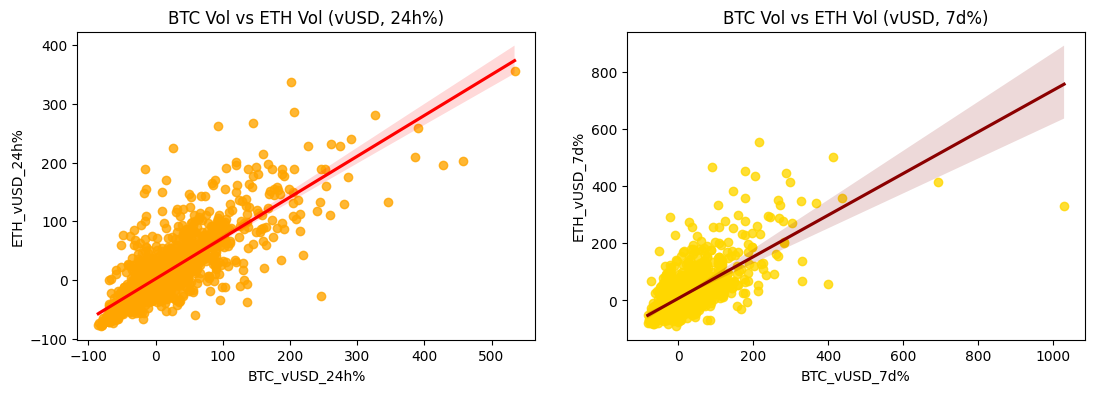

In [33]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (vol 24h% and vol 7d%)
sns.regplot(x='BTC_vUSD_24h%', y='ETH_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "orange"}, line_kws={"color": "red"})
axs[0].set_title('BTC Vol vs ETH Vol (vUSD, 24h%)')
sns.regplot(x='BTC_vUSD_7d%', y='ETH_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "gold"}, line_kws={"color": "darkred"})
axs[1].set_title('BTC Vol vs ETH Vol (vUSD, 7d%)')
plt.show()



<a id="scatter-btc-price-vs-eth-vusd"></a>
### 4.1.3 BTC Price Changes vs ETH Trade Volume Changes

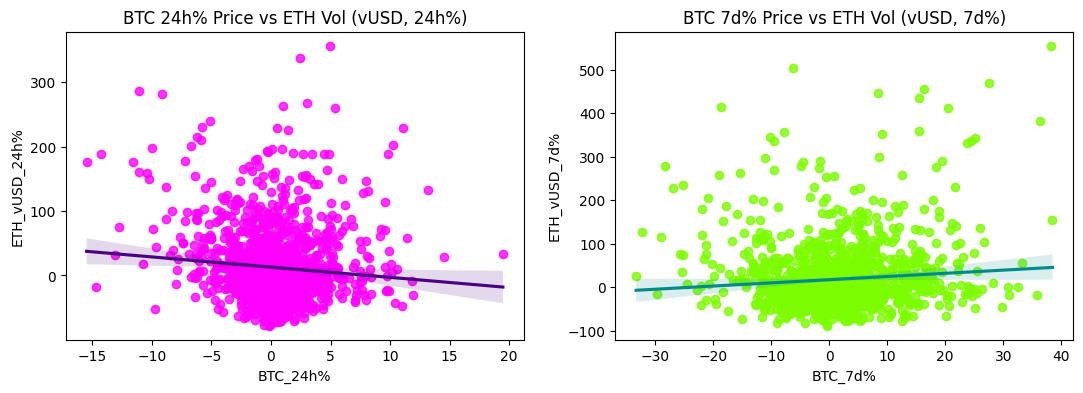

In [34]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (BTC price v ETH Vol)
sns.regplot(x='BTC_24h%', y='ETH_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "fuchsia"}, line_kws={"color": "indigo"})
axs[0].set_title('BTC 24h% Price vs ETH Vol (vUSD, 24h%)')
sns.regplot(x='BTC_7d%', y='ETH_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "lawngreen"}, line_kws={"color": "darkcyan"})
axs[1].set_title('BTC 7d% Price vs ETH Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-eth-price-vs-btc-vusd"></a>
### 4.1.4 ETH Price vs BTC Trade Volume

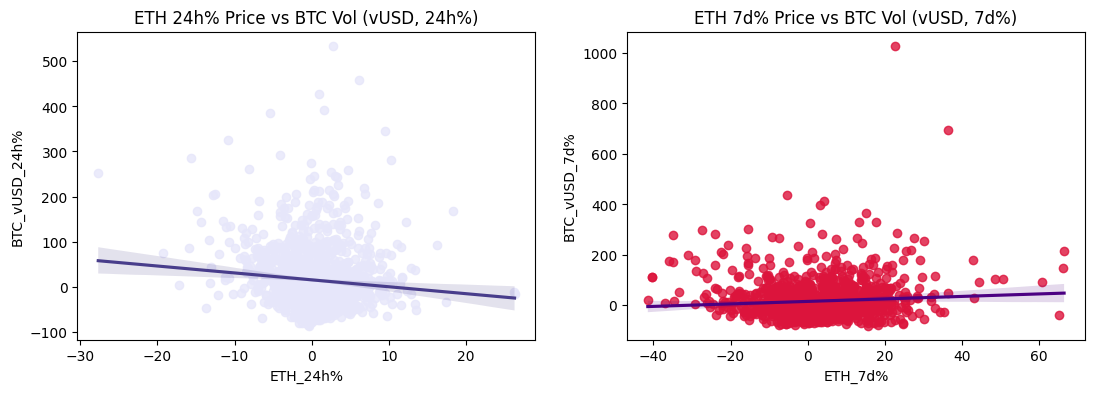

In [35]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (BTC price v ETH Vol)
sns.regplot(x='ETH_24h%', y='BTC_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "lavender"}, line_kws={"color": "darkslateblue"})
axs[0].set_title('ETH 24h% Price vs BTC Vol (vUSD, 24h%)')
sns.regplot(x='ETH_7d%', y='BTC_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "crimson"}, line_kws={"color": "indigo"})
axs[1].set_title('ETH 7d% Price vs BTC Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-plots-btc-eth-reflections"></a>
### 4.1.5 Scatter Plots: BTC vs ETH, Reflections
- There is a significant positie linear correlation between the 24-hour and 7-day price changes of Bitcoin and Ethereum.  
- The tight clustering of the scatter points suggest the relationship between the prices changes is strong, with the regression line accurately positioned
- There is a noticable positive linear relatinship, albeit weaker than in price changes, between the 24-hour changes in Bitcoin and Ethereum trade volumes.
- There is a positive linerar correlatin between the 7-day percent change in Ethereum price and the 7-day percent change in Bitcoin trade volume.  The data of the inverse are much more varied, suggesting weaker correlation
- There is a negative correlation between the 24-hour percent change in price of Bitcoin/Ethereum and its counterpart's percent change in trade volume.  Although the scattered data infers that this correlation isn't very strong, it's nevertheless worth noting, as it is thus far the only negative linear correlation that's been revealed.  This might represent short-term shifts in speculative focus, with investors moving funds back and forth between BTC and ETH when there are asymmetries in percent price changes.

<a id="scatter-plot-btc-vs-sol"></a>
## 4.2 Scatter Plot: BTC vs SOL

<a id="scatter-btc-vs-sol-price-changes"></a>
### 4.2.1 BTC vs SOL Price Changes

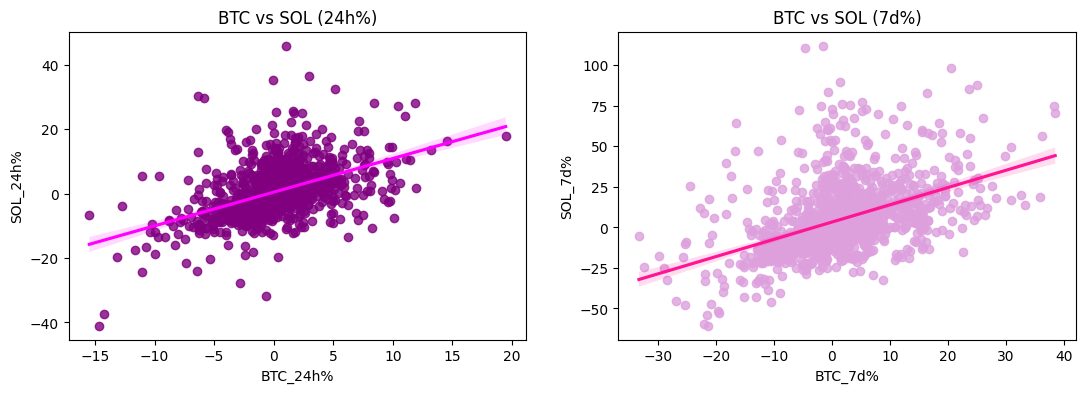

In [36]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs SOL (24h% and 7d%)
sns.regplot(x='BTC_24h%', y='SOL_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "purple"}, line_kws={"color": "magenta"})
axs[0].set_title('BTC vs SOL (24h%)')
sns.regplot(x='BTC_7d%', y='SOL_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "plum"}, line_kws={"color": "deeppink"})
axs[1].set_title('BTC vs SOL (7d%)')

plt.show()

<a id="scatter-btc-vs-sol-vusd-changes"></a>
### 4.2.2 BTC vs SOL Trade Volume Changes

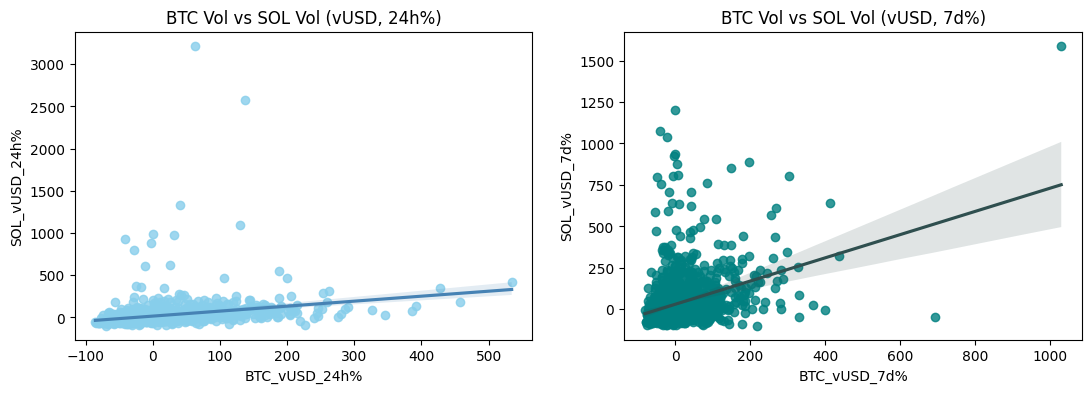

In [37]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs SOL (vol 24h% and vol 7d%)
sns.regplot(x='BTC_vUSD_24h%', y='SOL_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "skyblue"}, line_kws={"color": "steelblue"})
axs[0].set_title('BTC Vol vs SOL Vol (vUSD, 24h%)')
sns.regplot(x='BTC_vUSD_7d%', y='SOL_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "teal"}, line_kws={"color": "darkslategray"})
axs[1].set_title('BTC Vol vs SOL Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-btc-price-vs-sol-vusd"></a>
### 4.2.3 BTC Price Changes vs SOL Trade Volume Changes

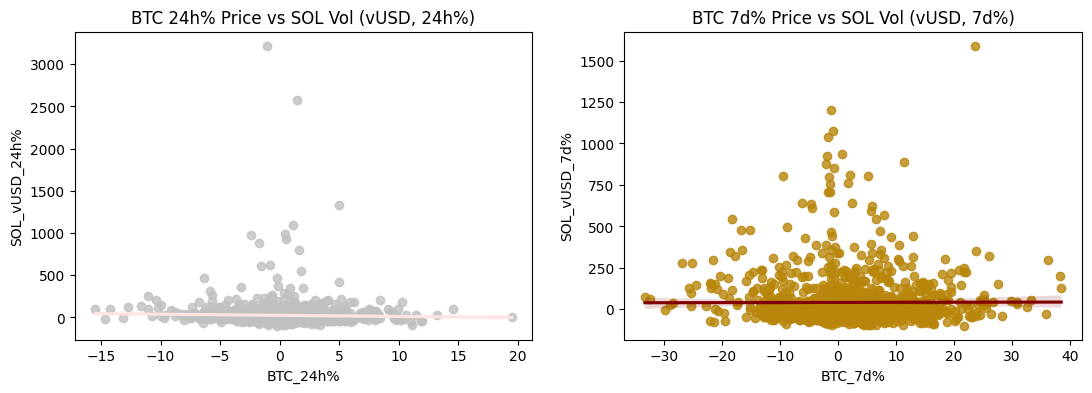

In [38]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs SOL (BTC price v SOL Vol)
sns.regplot(x='BTC_24h%', y='SOL_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "silver"}, line_kws={"color": "mistyrose"})
axs[0].set_title('BTC 24h% Price vs SOL Vol (vUSD, 24h%)')
sns.regplot(x='BTC_7d%', y='SOL_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "darkgoldenrod"}, line_kws={"color": "maroon"})
axs[1].set_title('BTC 7d% Price vs SOL Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-sol-price-vs-btc-vusd"></a>
### 4.2.4 SOL Price Changes vs BTC Trade Volume Changes

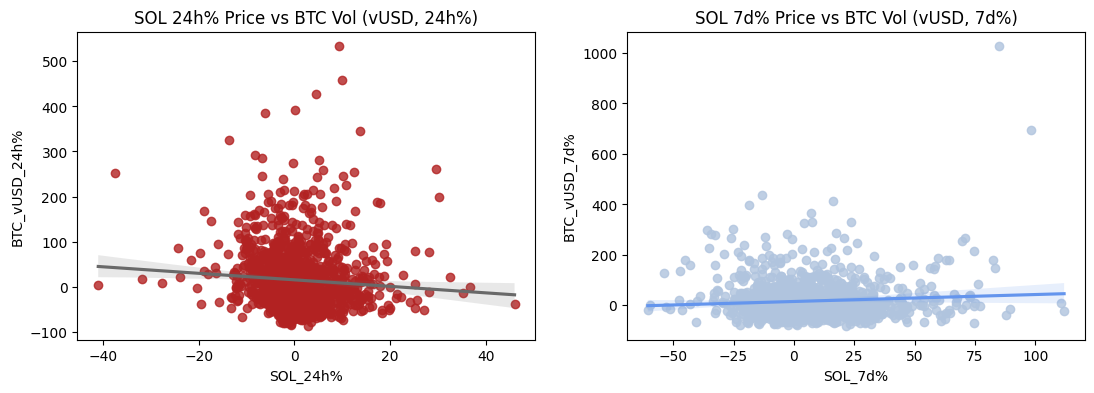

In [39]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# SOL Price vs BTC Volume (24h and 7d)
sns.regplot(x='SOL_24h%', y='BTC_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "firebrick"}, line_kws={"color": "dimgray"})
axs[0].set_title('SOL 24h% Price vs BTC Vol (vUSD, 24h%)')
sns.regplot(x='SOL_7d%', y='BTC_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "cornflowerblue"})
axs[1].set_title('SOL 7d% Price vs BTC Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-plots-btc-vs-sol-reflections"></a>
### 4.2.5 Scatter Plots: BTC vs SOL, Reflections
- The data suggest a positive linear price correlation between 24-hour and 7-day changes in price, although the visible spread of scatter plots point to vvariability. 
- There is a clear and quite tightly coupled relationship between the 24-hour change in BTC and SOL trade volumes.  However, such is not the case over the 7-day interval, where there appears to be little to no correlation.
- Changes in BTC price appear to have had no bearing on the change in SOL trade volume.  Oddly, the data suggests a nominal negative correlation between the two variables, with the SOL trade volume just slightly dropping as BTC prices rise, particularly within the 14-hour interval.  For all practical purposes, the change in SOL trade volume remains the same at all BTC price changes.
- Changes in SOL price, however, display a more pronounced correlation with BTC trade volume changes.  The 24-hour correlation is negative, although not strong.  The 7-day correlation is just slightly positive, but more strongly linked than the 24-hour correlation.
- The marginal relationships between BTC and SOL trade volumes could likely be attributed, at least in part, to the fact that much of the data was drawn from times when SOL value was small, as it was a relative newcomer to the market.
- The inverse relationship between 24-hour and 7-day SOL price changes and BTC trade volumes is worth noting and might warrant deeper inquiry, as it perhaps might represent the movement in investments of short-term day traders between BTC and SOL, much in the same way that we saw with BTC and ETH.

<a id="scatter-plots-eth-vs-sol"></a>
## 4.3 Scatter Plots: ETH vs SOL

<a id="scatter-eth-vs-sol-price-changes"></a>
### 4.3.1 ETH vs SOL Price Changes

Text(0.5, 1.0, 'ETH vs SOL (7d%)')

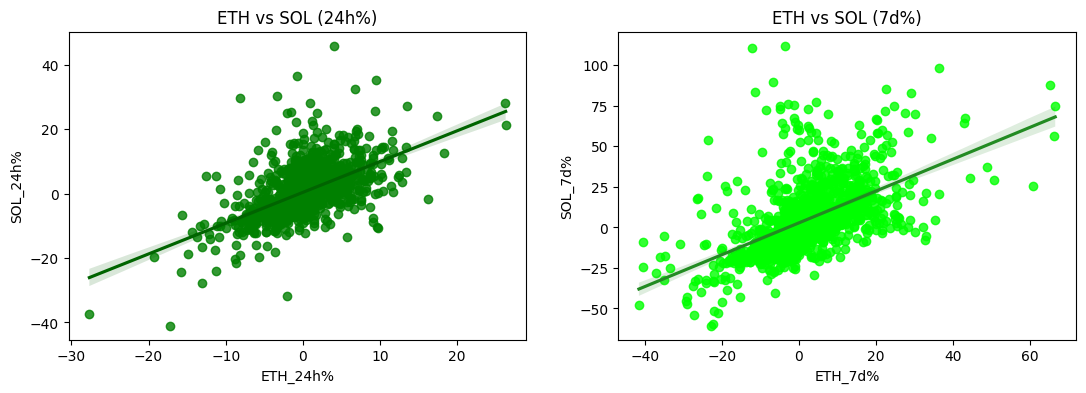

In [40]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# ETH vs SOL (24h% and 7d%)
sns.regplot(x='ETH_24h%', y='SOL_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "green"}, line_kws={"color": "darkgreen"})
axs[0].set_title('ETH vs SOL (24h%)')
sns.regplot(x='ETH_7d%', y='SOL_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "lime"}, line_kws={"color": "forestgreen"})
axs[1].set_title('ETH vs SOL (7d%)')

<a id="scatter-eth-vs-sol-vusd-changes"></a>
### 4.3.2 ETH vs SOL Trade Volume Changes

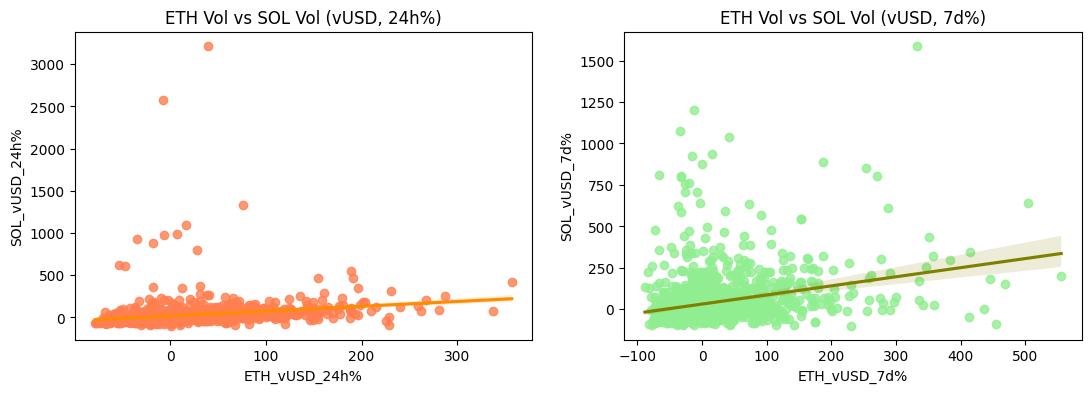

In [41]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# ETH vs SOL (vol 24h% and vol 7d%)
sns.regplot(x='ETH_vUSD_24h%', y='SOL_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "coral"}, line_kws={"color": "darkorange"})
axs[0].set_title('ETH Vol vs SOL Vol (vUSD, 24h%)')
sns.regplot(x='ETH_vUSD_7d%', y='SOL_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "lightgreen"}, line_kws={"color": "olive"})
axs[1].set_title('ETH Vol vs SOL Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-eth-price-vs-sol-vusd"></a>
### 4.3.3 ETH Price Changes vs SOL Trade Volume Changes

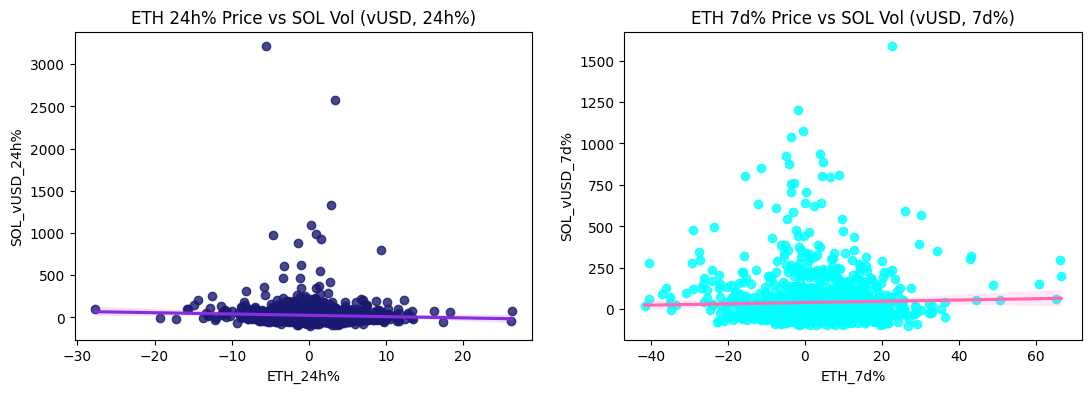

In [42]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# ETH Price vs SOL Volume (24h% and 7d%)
sns.regplot(x='ETH_24h%', y='SOL_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "midnightblue"}, line_kws={"color": "blueviolet"})
axs[0].set_title('ETH 24h% Price vs SOL Vol (vUSD, 24h%)')
sns.regplot(x='ETH_7d%', y='SOL_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "aqua"}, line_kws={"color": "hotpink"})
axs[1].set_title('ETH 7d% Price vs SOL Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-sol-price-vs-eth-vusd"></a>
### 4.3.4 SOL Price Changes vs ETH Trade Volume Changes

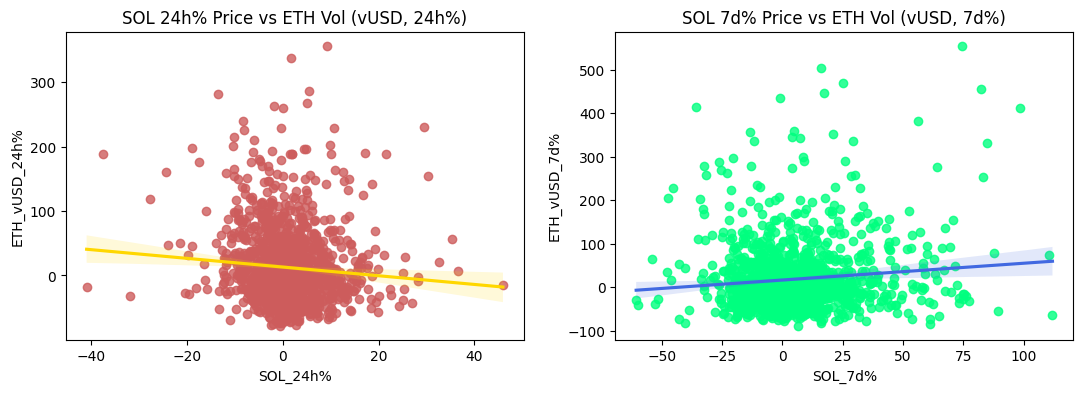

In [43]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# SOL Price vs ETH volume (24h% and 7d%)
sns.regplot(x='SOL_24h%', y='ETH_vUSD_24h%', data=daily_weekly_changes, ax=axs[0], 
            scatter_kws={"color": "indianred"}, line_kws={"color": "gold"})
axs[0].set_title('SOL 24h% Price vs ETH Vol (vUSD, 24h%)')
sns.regplot(x='SOL_7d%', y='ETH_vUSD_7d%', data=daily_weekly_changes, ax=axs[1], 
            scatter_kws={"color": "springgreen"}, line_kws={"color": "royalblue"})
axs[1].set_title('SOL 7d% Price vs ETH Vol (vUSD, 7d%)')
plt.show()

<a id="scatter-plots-eth-vs-sol-reflections"></a>
### 4.3.5 Scatter Plots: ETH vs SOL, Reflections
- The positive correlations in price changes between ETH and SOL mirror those of BTC and SOL, in that the slope is similar and points indicate moderate variability
- Relationships in trade volumes are likewise similar, with the 24-hour period exhibiting close correlation, but the 7-day little to no correlation
- Their appears to be a slightly negative correlation between the 24-hour change in ETH price and SOL trade volume, and a less tightly coupled positive correlation along the 7-day interval
- The slopes for 24-hour and 7-day SOL price change vs ETH trade volume change are more pronounced (negative and positive, respectively), but the data is far more variable
- Given the similarity in ETH/SOL plots and BTC/SOL plots, it could be reasonably posited that the movements of SOL are ultimately effected by BTC as a prime mover, and that perceived relationships in the ETH/SOL plots are ultimately a result of the BTC/ETH relationships

<a id="analyze-relationships-hourly-changes"></a>
# 5. Analyze Relationships in Trade Patterns - Hourly Changes

In [44]:
hourly_changes = pd.DataFrame({
    'BTC_1h%': btc_hourly['1h%'],
    'BTC_1h_vUSD%': btc_hourly['1h_usd%'],
    'ETH_1h%': eth_hourly['1h%'],
    'ETH_1h_vUSD%': eth_hourly['1h_usd%'],
    'SOL_1h%': sol_hourly['1h%'],
    'SOL_1h_vUSD%': sol_hourly['1h_usd%']
})
hourly_changes.head()

BTC_1h%  BTC_1h_vUSD%   ETH_1h%  ETH_1h_vUSD%   SOL_1h%  SOL_1h_vUSD%
0       NaN           NaN       NaN           NaN       NaN           NaN
1 -0.013304    -37.203186 -0.009516    -39.910955 -0.402685    158.484610
2 -0.303058    -17.424652 -0.210649     16.128761 -0.494160      2.832547
3 -0.108790     85.669404 -0.016531     86.792368  0.000000    -30.403587
4 -0.087782    -11.829059  0.074404    -30.852366  0.451467    -30.493304

<a id="data-cleaning"></a>
## 5.1 Data Cleaning
Forthcoming scatter plots revealed minor flaws in the data that didn't allow for effecting plotting.  This was due to the fact that in the early phases of Solana trade some of the figures were incredibly small, which threw off calculation.  Consequently, I've come back and made adjustments.  See the description and cleaning steps in the following.

In [45]:
hourly_changes['SOL_1h%'].describe()

count    3.271500e+04
mean              inf
std               NaN
min     -1.000000e+02
25%     -6.314729e-01
50%      0.000000e+00
75%      6.345662e-01
max               inf
Name: SOL_1h%, dtype: float64

In [46]:
hourly_changes['SOL_1h%'].isna().sum()

1302

In [47]:
np.isinf(hourly_changes['SOL_1h%']).sum()

3

In [48]:
# Replace infinities with NaN
hourly_changes['SOL_1h%'] = hourly_changes['SOL_1h%'].replace([np.inf, -np.inf], np.nan)
np.isinf(hourly_changes['SOL_1h%']).sum()

0

In [49]:
# Drop rows with NaN
hourly_changes.dropna(subset=['SOL_1h%'], inplace=True)
hourly_changes['SOL_1h%'].isna().sum()

0

<a id="pearson-correlation-hourly"></a>
## 5.2 Pearson Correlation: Hourly Changes

In [50]:
## Calculate Pearson correlation
hourly_matrix = hourly_changes.corr()
hourly_matrix

BTC_1h%  BTC_1h_vUSD%   ETH_1h%  ETH_1h_vUSD%   SOL_1h%  \
BTC_1h%       1.000000      0.004142  0.830823      0.000869  0.649219   
BTC_1h_vUSD%  0.004142      1.000000  0.009978      0.253803  0.001525   
ETH_1h%       0.830823      0.009978  1.000000      0.014491  0.750776   
ETH_1h_vUSD%  0.000869      0.253803  0.014491      1.000000  0.007716   
SOL_1h%       0.649219      0.001525  0.750776      0.007716  1.000000   
SOL_1h_vUSD%  0.004556      0.046640  0.002773      0.126951  0.010584   

              SOL_1h_vUSD%  
BTC_1h%           0.004556  
BTC_1h_vUSD%      0.046640  
ETH_1h%           0.002773  
ETH_1h_vUSD%      0.126951  
SOL_1h%           0.010584  
SOL_1h_vUSD%      1.000000

<a id="heatmap-hourly-changes"></a>
## 5.3 Heatmap: Hourly Changes

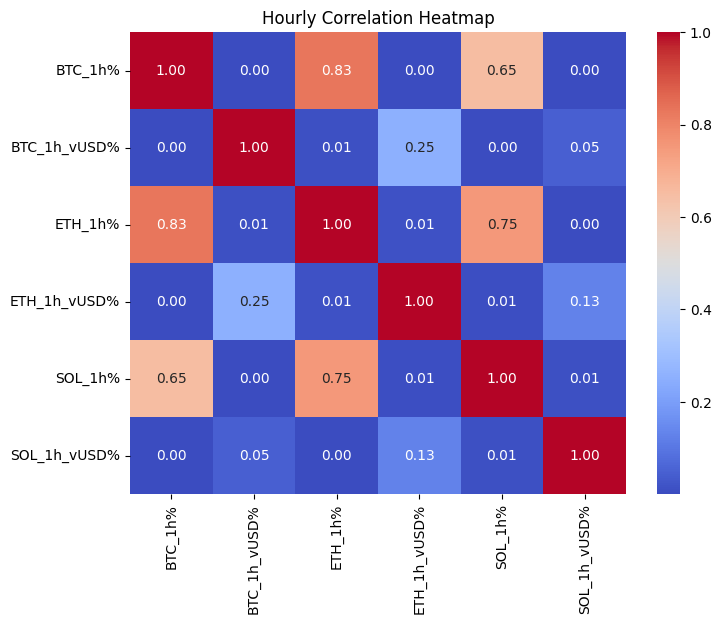

In [51]:
# create a heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(hourly_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Hourly Correlation Heatmap")
plt.show()

<a id="hourly-heatmap-reflections"></a>
## 5.4 Hourly Heatmap Reflections
- There is a strong correlation between the hourly price changes for Bitcoin and Ethereum.
- There is a strong correlation between the hourly price changes for Ethereum and Solana.  This is interesting, as I'd have assumed that Bitcoin would have a stronger correlation with Solana, given its market dominance.
- There is a moderate correlation between the hourly price changes for Bitcoin and Solana.
- There are virtually no correlations between the changes in hourly trade volumes of the three coins.

<a id="scatter-plots-hourly-changes"></a>
# 6.0 Scatter Plots: Hourly Changes

<a id="scatter-btc-eth-hourly-changes"></a>
## 6.1 BTC vs ETH Hourly Price and Volume Change

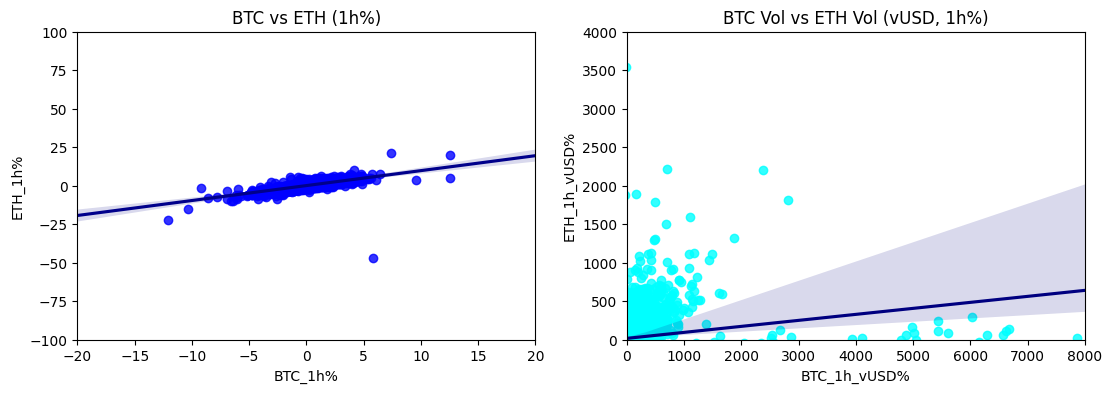

In [52]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (hourly price% and trade vol%)
sns.regplot(x='BTC_1h%', y='ETH_1h%', data=hourly_changes, ax=axs[0], 
            scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"})
axs[0].set_title('BTC vs ETH (1h%)')
axs[0].set_xlim(-20, 20)  # Set x-axis limits
axs[0].set_ylim(-100, 100)  # Set y-axis limits

sns.regplot(x='BTC_1h_vUSD%', y='ETH_1h_vUSD%', data=hourly_changes, ax=axs[1], 
            scatter_kws={"color": "cyan"}, line_kws={"color": "navy"})
axs[1].set_title('BTC Vol vs ETH Vol (vUSD, 1h%)')
axs[1].set_xlim(0, 8000)  # Set x-axis limits
axs[1].set_ylim(0, 4000)  # Set y-axis limits

plt.show()

<a id="scatter-btc-eth-hourly-price-vs-vusd-changes"></a>
## 6.2 BTC/ETH Hourly Price Change vs Trade Volume Changes

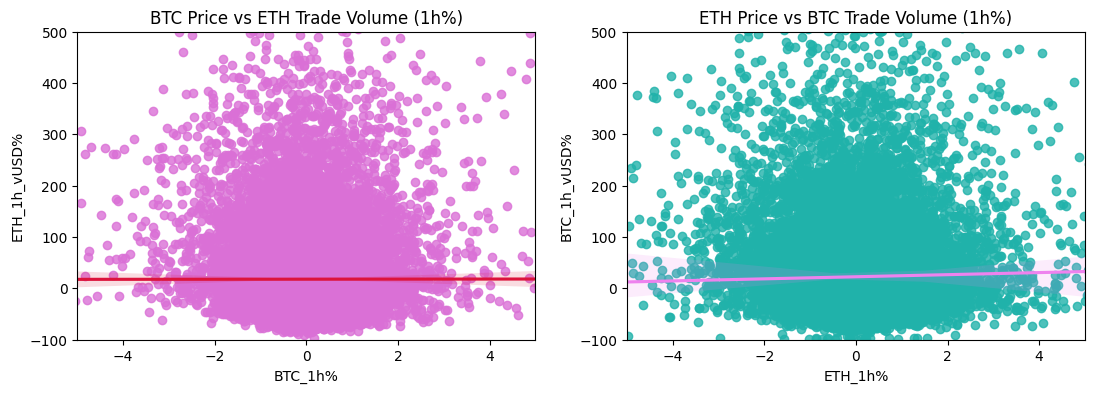

In [53]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC Price vs ETH Volume
sns.regplot(x='BTC_1h%', y='ETH_1h_vUSD%', data=hourly_changes, ax=axs[0], 
            scatter_kws={"color": "orchid"}, line_kws={"color": "crimson"})
axs[0].set_title('BTC Price vs ETH Trade Volume (1h%)')
axs[0].set_xlim(-5, 5)  # Set x-axis limits
axs[0].set_ylim(-100, 500)  # Set y-axis limits

sns.regplot(x='ETH_1h%', y='BTC_1h_vUSD%', data=hourly_changes, ax=axs[1], 
            scatter_kws={"color": "lightseagreen"}, line_kws={"color": "violet"})
axs[1].set_title('ETH Price vs BTC Trade Volume (1h%)')
axs[1].set_xlim(-5, 5)  # Set x-axis limits
axs[1].set_ylim(-100, 500)  # Set y-axis limits

plt.show()

<a id="scatter-btc-sol-hourly-changes"></a>
## 6.3 BTC vs SOL Hourly Price and Volume Changes

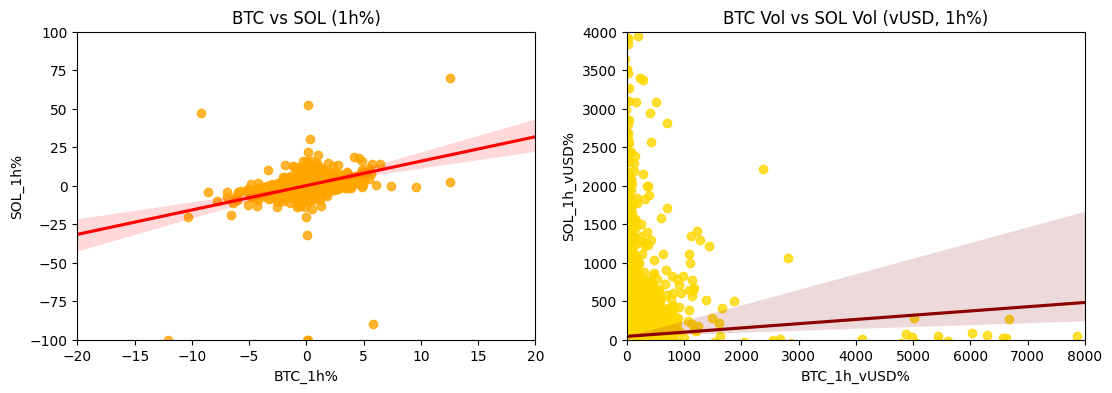

In [54]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (hourly price% and trade vol%)
sns.regplot(x='BTC_1h%', y='SOL_1h%', data=hourly_changes, ax=axs[0], 
            scatter_kws={"color": "orange"}, line_kws={"color": "red"})
axs[0].set_title('BTC vs SOL (1h%)')
axs[0].set_xlim(-20, 20)  # Set x-axis limits
axs[0].set_ylim(-100, 100)  # Set y-axis limits

sns.regplot(x='BTC_1h_vUSD%', y='SOL_1h_vUSD%', data=hourly_changes, ax=axs[1], 
            scatter_kws={"color": "gold"}, line_kws={"color": "darkred"})
axs[1].set_title('BTC Vol vs SOL Vol (vUSD, 1h%)')
axs[1].set_xlim(0, 8000)  # Set x-axis limits
axs[1].set_ylim(0, 4000)  # Set y-axis limits

plt.show()

<a id="scatter-btc-sol-hourly-changes"></a>
## 6.4 BTC/SOL Hourly Price Change vs Trade Volume Changes

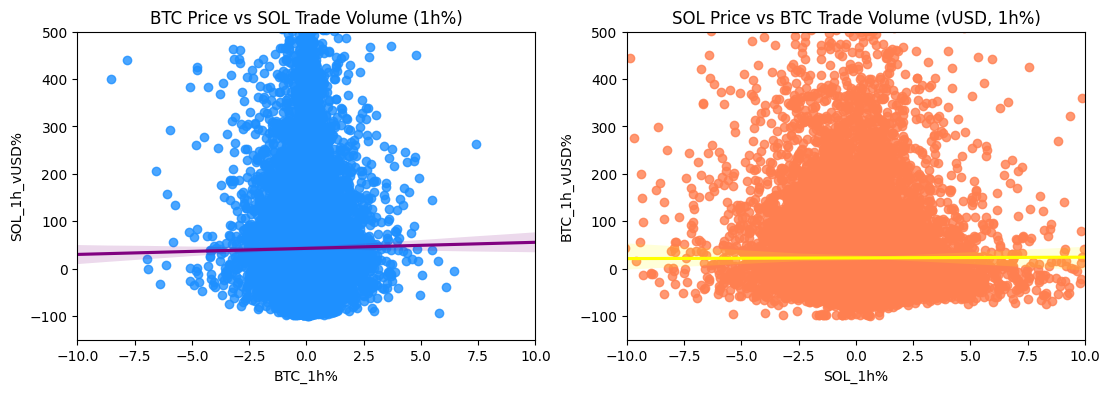

In [55]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# BTC vs ETH (hourly price% and trade vol%)
sns.regplot(x='BTC_1h%', y='SOL_1h_vUSD%', data=hourly_changes, ax=axs[0], 
            scatter_kws={"color": "dodgerblue"}, line_kws={"color": "purple"})
axs[0].set_title('BTC Price vs SOL Trade Volume (1h%)')
axs[0].set_xlim(-10, 10)  # Set x-axis limits
axs[0].set_ylim(-150, 500)  # Set y-axis limits

sns.regplot(x='SOL_1h%', y='BTC_1h_vUSD%', data=hourly_changes, ax=axs[1], 
            scatter_kws={"color": "coral"}, line_kws={"color": "yellow"})
axs[1].set_title('SOL Price vs BTC Trade Volume (vUSD, 1h%)')
axs[1].set_xlim(-10, 10)  # Set x-axis limits
axs[1].set_ylim(-150, 500)  # Set y-axis limits

plt.show()

<a id="scatter-eth-sol-hourly-price-vs-vusd-changes"></a>
## 6.5 ETH vs SOL Hourly Price and Volume Changes

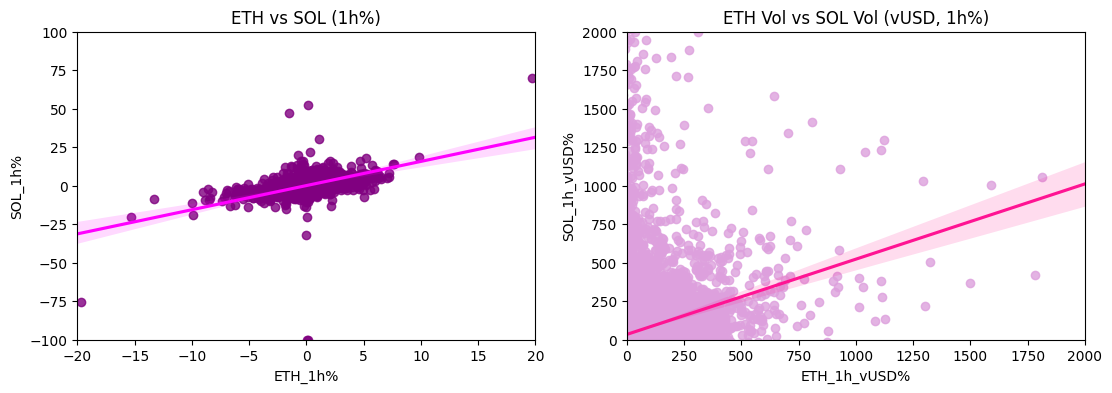

In [56]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# ETH vs SOL (hourly price% and trade vol%)
sns.regplot(x='ETH_1h%', y='SOL_1h%', data=hourly_changes, ax=axs[0], 
            scatter_kws={"color": "purple"}, line_kws={"color": "magenta"})
axs[0].set_title('ETH vs SOL (1h%)')
axs[0].set_xlim(-20, 20)  # Set x-axis limits
axs[0].set_ylim(-100, 100)  # Set y-axis limits


sns.regplot(x='ETH_1h_vUSD%', y='SOL_1h_vUSD%', data=hourly_changes, ax=axs[1], 
            scatter_kws={"color": "plum"}, line_kws={"color": "deeppink"})
axs[1].set_title('ETH Vol vs SOL Vol (vUSD, 1h%)')
axs[1].set_xlim(0, 2000)  # Set x-axis limits
axs[1].set_ylim(0, 2000)  # Set y-axis limits

plt.show()

<a id="scatter-eth-sol-hourly-price-vs-vusd-changes"></a>
## 6.6 ETH/SOL Hourly Price Change vs Trade Volume Changes

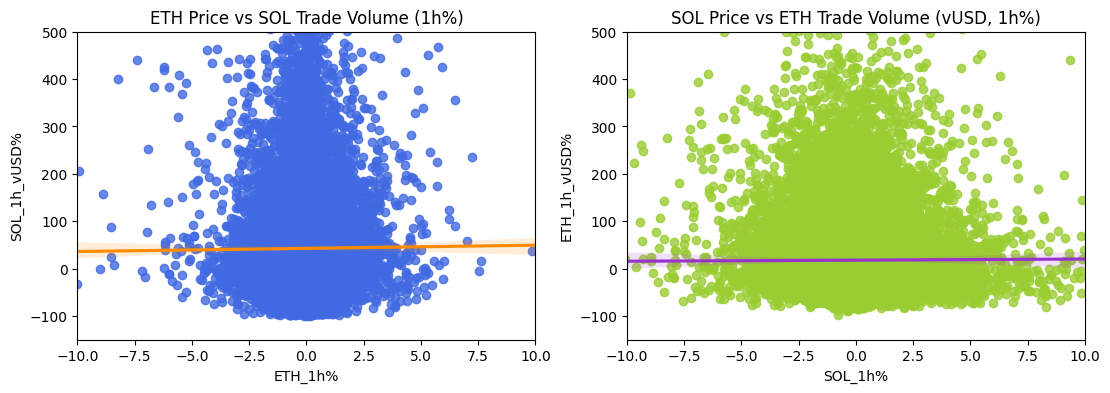

In [57]:
# Setting up the matplotlib figure (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2)

# ETH vs SOL (hourly price% and trade vol%)
sns.regplot(x='ETH_1h%', y='SOL_1h_vUSD%', data=hourly_changes, ax=axs[0], 
            scatter_kws={"color": "royalblue"}, line_kws={"color": "darkorange"})
axs[0].set_title('ETH Price vs SOL Trade Volume (1h%)')
axs[0].set_xlim(-10, 10)  # Set x-axis limits
axs[0].set_ylim(-150, 500)  # Set y-axis limits

sns.regplot(x='SOL_1h%', y='ETH_1h_vUSD%', data=hourly_changes, ax=axs[1], 
            scatter_kws={"color": "yellowgreen"}, line_kws={"color": "darkorchid"})
axs[1].set_title('SOL Price vs ETH Trade Volume (vUSD, 1h%)')
axs[1].set_xlim(-10, 10)  # Set x-axis limits
axs[1].set_ylim(-150, 500)  # Set y-axis limits

plt.show()

<a id="hourly-scatter-plot-reflections"></a>
## 6.7 Hourly Scatter Plot Reflections
- There is a very strong positive correlation between the hourly price movements of Bitcoin and Ethereum.
- There is a slightly less strong, positive correlation between hourly price movements of Ethereum and Solana.
- There appears to be some positive correlation between Bitcoin and Solana, although not as strong as the relationships of the other two.
- The scatter plots suggest that there is no hourly correlation in trade volumes of the three coins, or between price changes and trade volumes

<a id="time-series-decomposition"></a>
# 7. Time Series Decomposition #
We will perform time series decompositions to track the changes in price and trade volume over time, and to search for evidence fluctuation relationships between the cryptocurrencies in question.

In [58]:
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_id         1353 non-null   object 
 1   coin_symbol       1353 non-null   object 
 2   date              1353 non-null   object 
 3   open              1353 non-null   float64
 4   low               1353 non-null   float64
 5   high              1353 non-null   float64
 6   close             1353 non-null   float64
 7   24h%              1352 non-null   float64
 8   7d%               1346 non-null   float64
 9   trade_vol_native  1353 non-null   float64
 10  24h_ntv%          1352 non-null   float64
 11  7d_ntv%           1346 non-null   float64
 12  trade_vol_USD     1353 non-null   float64
 13  24h_usd%          1352 non-null   float64
 14  7d_usd%           1346 non-null   float64
dtypes: float64(12), object(3)
memory usage: 158.7+ KB


<a id="def-decompose-series()"></a>
## 7.1 def decompose_series()
**Create a decompose_series() function so I can easily perform timeseries decompositions across different coins, features, and time periods**

In [59]:
def decompose_series(time_series, period):
    """
    Perform a seasonal decomposition of a time series and plot its components.

    This function applies a multiplicative seasonal decomposition to the provided
    time series data. It decomposes the time series into four components: observed,
    trend, seasonal, and residual, and plots each of these components in a separate
    subplot.

    Parameters:
    - time_series (Pandas Series or similar): The time series data to decompose. This 
      should be a continuous numerical dataset, like the closing prices or trade volumes 
      of a cryptocurrency.
    - period (int): The period of the seasonal component. For daily data, this might be 
      set to 7 for a weekly cycle, 30 for a monthly cycle, etc.

    Returns:
    - None: This function does not return a value. It outputs a series of plots.

    Note:
    - This function relies on the statsmodels library for the decomposition and matplotlib 
      for plotting. Ensure these libraries are installed and imported in your environment.
    - The function assumes a 'multiplicative' model for decomposition, which is suitable 
      when the seasonal variation is proportional to the level of the time series. If the 
      seasonal variation is constant over time, consider using an 'additive' model instead.
    """

    # Perform the seasonal decomposition
    decomp_result = sm.tsa.seasonal_decompose(time_series, model='multiplicative', period=period)

    # Plotting each component
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomp_result.observed)
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomp_result.trend)
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomp_result.seasonal)
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomp_result.resid)
    plt.title('Residual')

    plt.tight_layout()
    plt.show()


<a id="btc-time-series-decomposition"></a>
## 7.2 Bitcoin Time Series Decomposition

<a id="btc-time-series-decomposition-close"></a>
### 7.2.1 Time Series Decomposition: Bitcoin Close Price

<a id="btc-time-series-decomposition-close-7d"></a>
#### 7.2.1.1 Time Series Decomposition: Bitcoin Close Price, Period = 7 Days

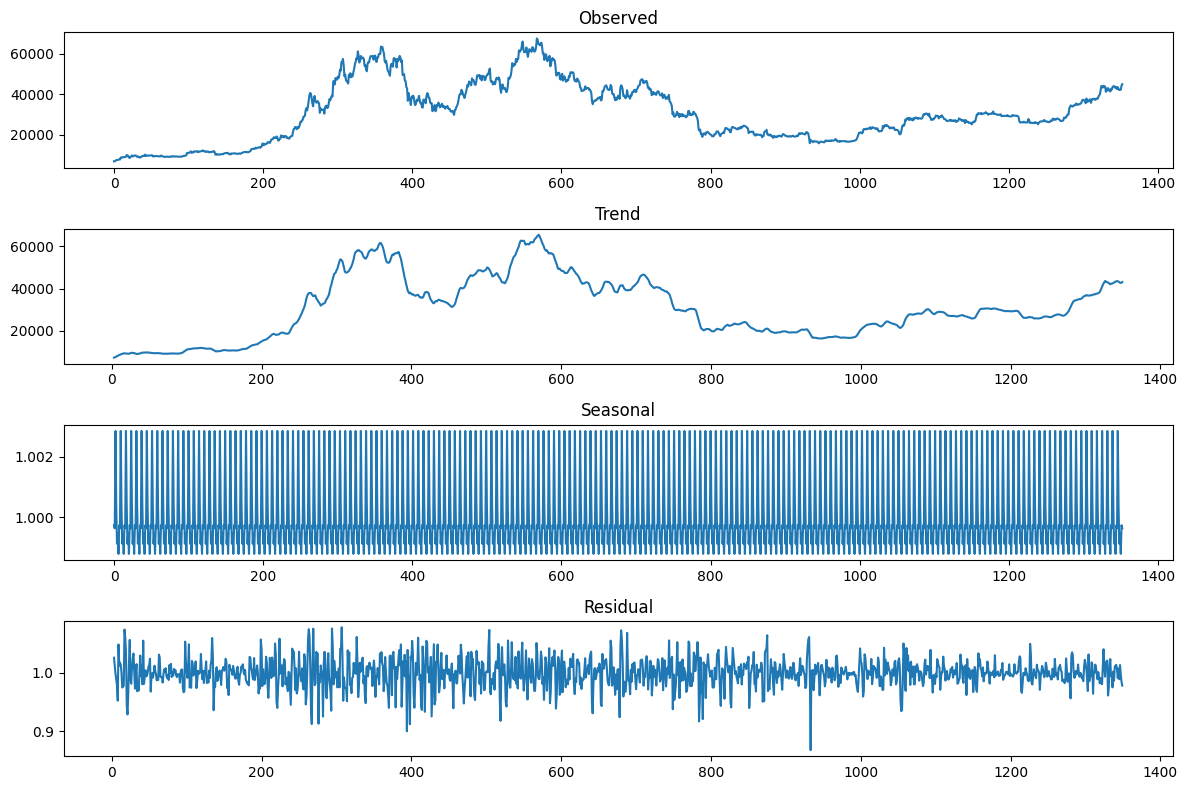

In [60]:
# 7 day period paramater
decompose_series(btc_daily['close'], 7)


<a id="btc-time-series-decomposition-close-30d"></a>
#### 7.2.1.2 Time Series Decomposition: Bitcoin Close Price, Period = 30 Days

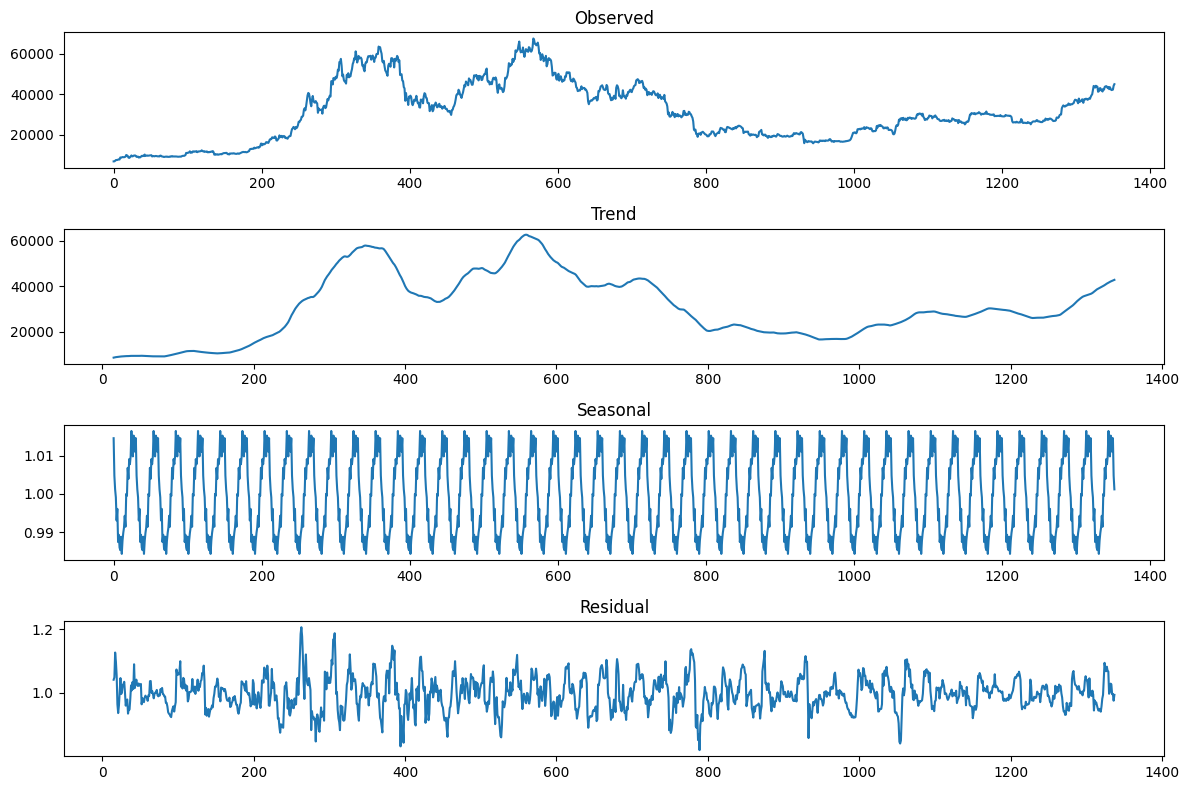

In [61]:
# 30 day period parameter
decompose_series(btc_daily['close'], 30)

<a id="btc-time-series-decomposition-close-120d"></a>
#### 7.2.1.3 Time Series Decomposition: Bitcoin Close Price, Period = 120 Days

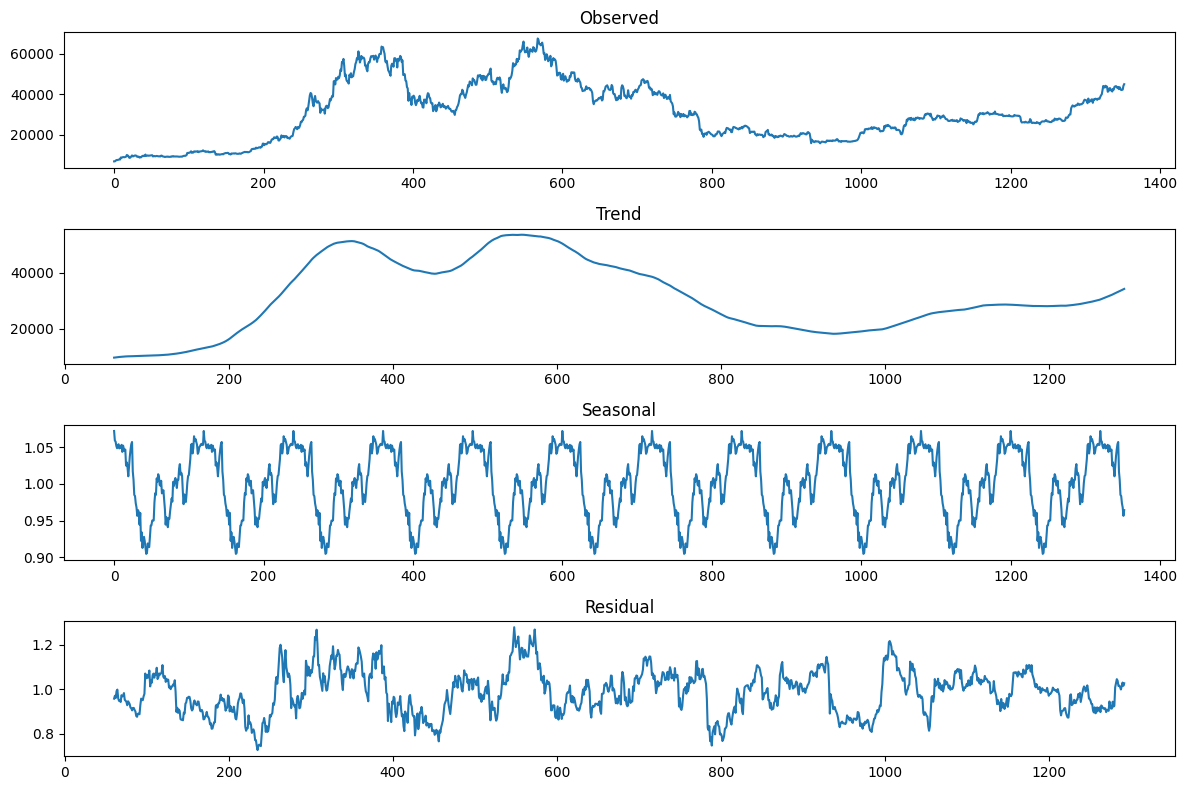

In [62]:
# 120 day period
decompose_series(btc_daily['close'], 120)

<a id="btc-time-series-decomposition-vusd"></a>
### 7.2.2 Time Series Decomposition: Bitcoin Trade Volume (USD)

<a id="btc-time-series-decomposition-vusd-7d"></a>
#### 7.2.2.1 Time Series Decomposition: Bitcoin Trade Volume (USD), Period = 7 Days

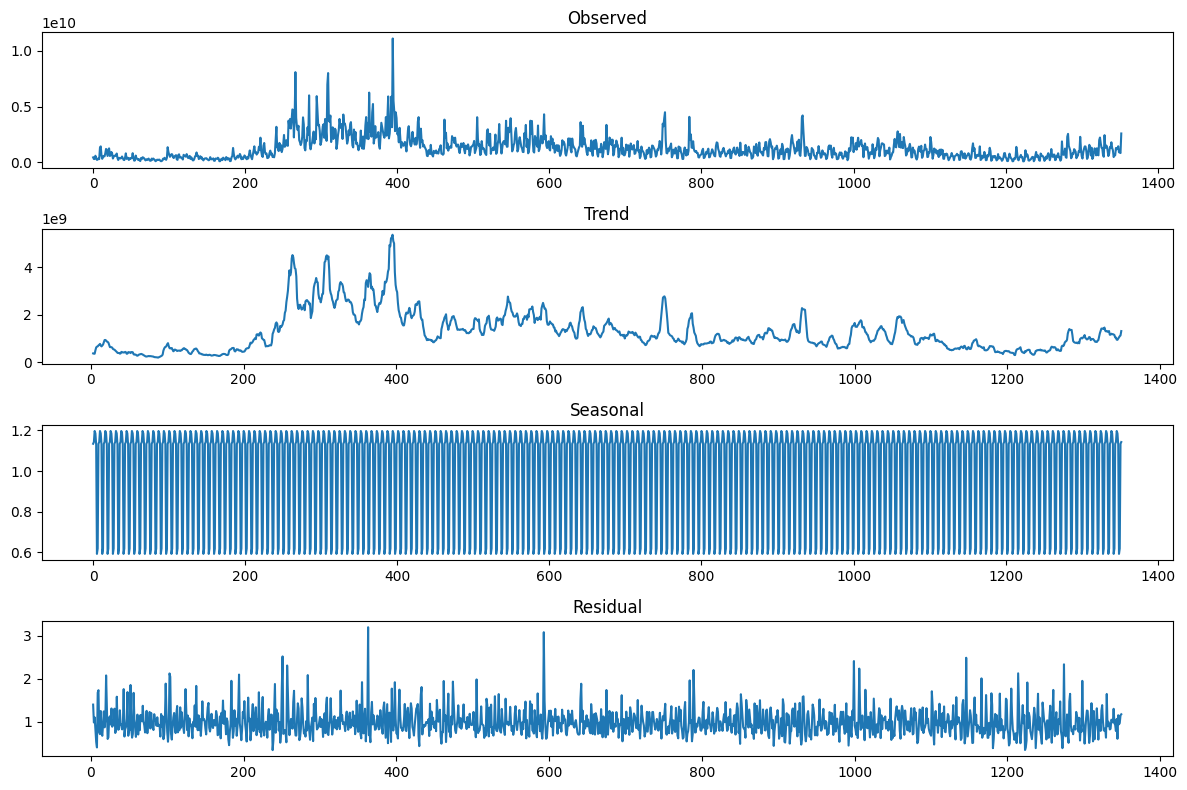

In [63]:
decompose_series(btc_daily['trade_vol_USD'], 7)

<a id="btc-time-series-decomposition-vusd-30d"></a>
#### 7.2.2.2 Time Series Decomposition: Bitcoin Trade Volume (USD), Period = 30 Days

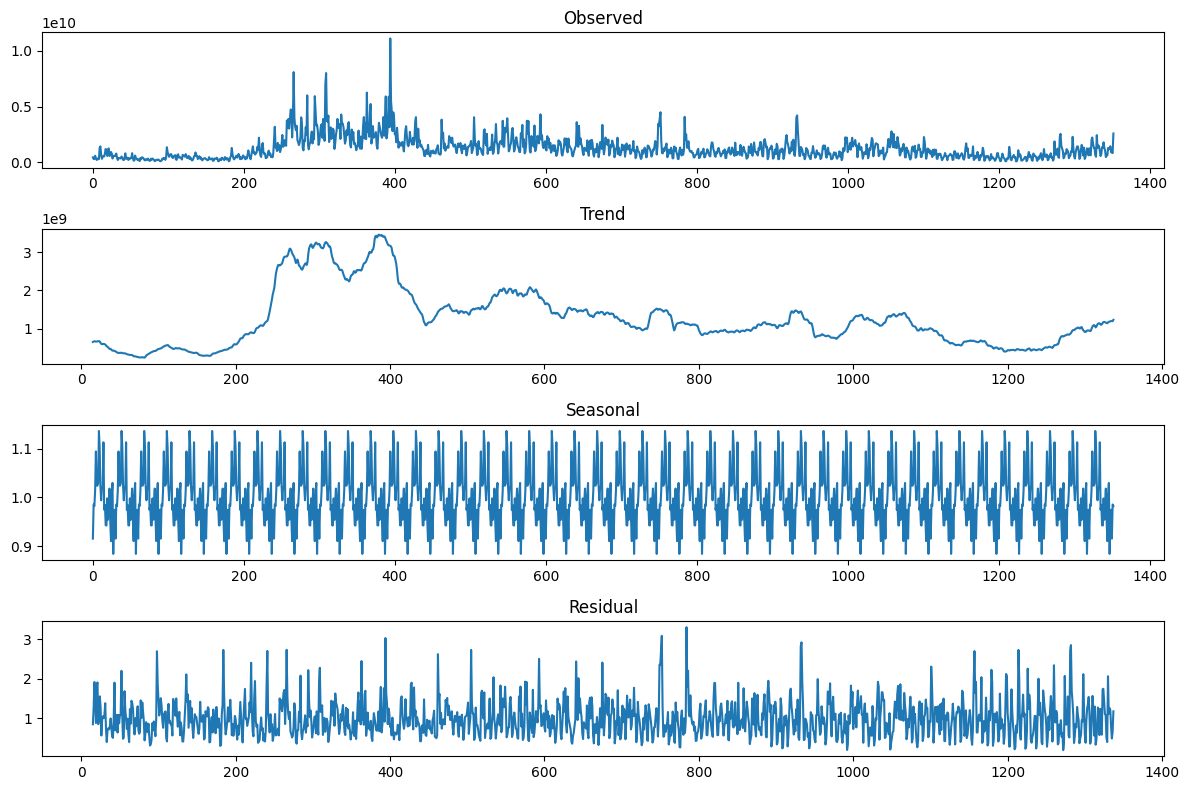

In [64]:
decompose_series(btc_daily['trade_vol_USD'], 30)

<a id="btc-time-series-decomposition-vusd-120d"></a>
#### 7.2.2.3 Time Series Decomposition: Bitcoin Trade Volume (USD), Period = 120 Days

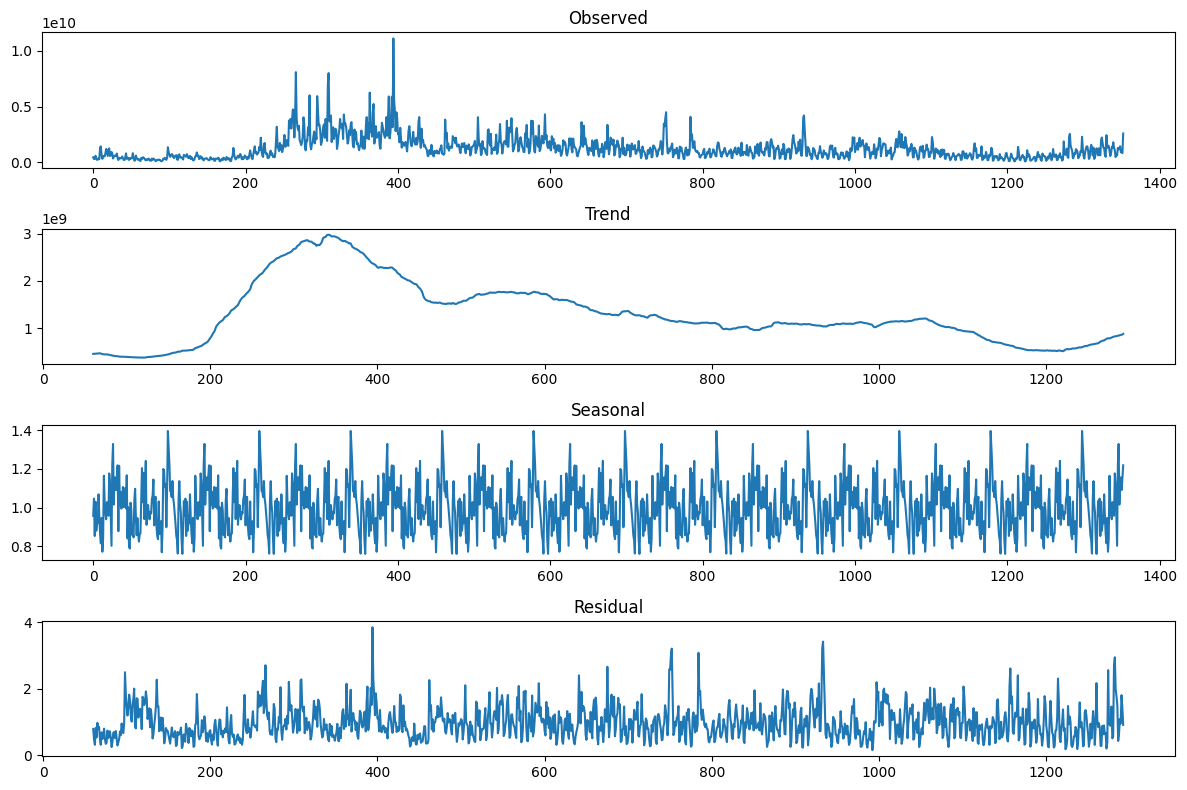

In [65]:
decompose_series(btc_daily['trade_vol_USD'], 120)

<a id="eth-time-series-decomposition"></a>
## 7.3 Ethereum Time Series Decomposition

<a id="eth-time-series-decomposition-close"></a>
### 7.3.1 Time Series Decomposition: Ethereum Close Price

<a id="eth-time-series-decomposition-close-7d"></a>
#### 7.3.1.1 Time Series Decomposition: Ethereum Close Price, Period = 7 Days

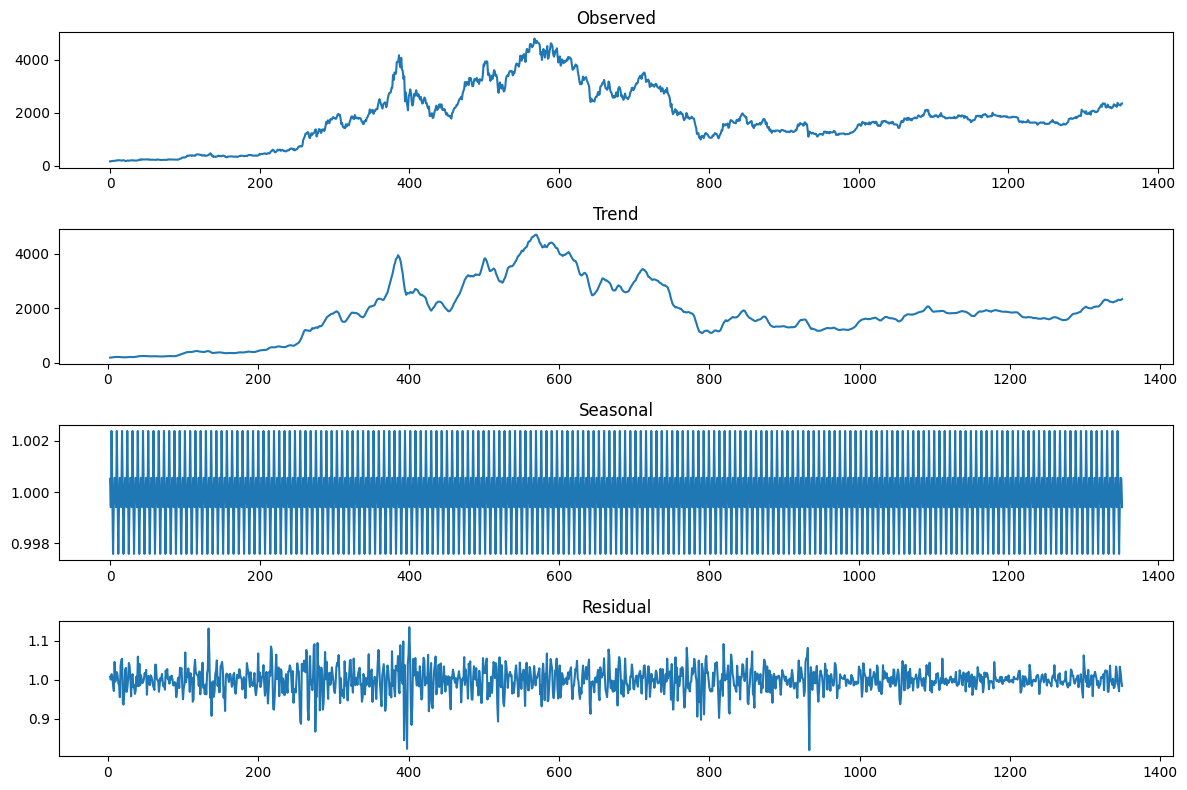

In [66]:
# 7 day period
decompose_series(eth_daily['close'], 7)

<a id="eth-time-series-decomposition-close-30d"></a>
#### 7.3.1.2 Time Series Decomposition: Ethereum Close Price, Period = 30 Days

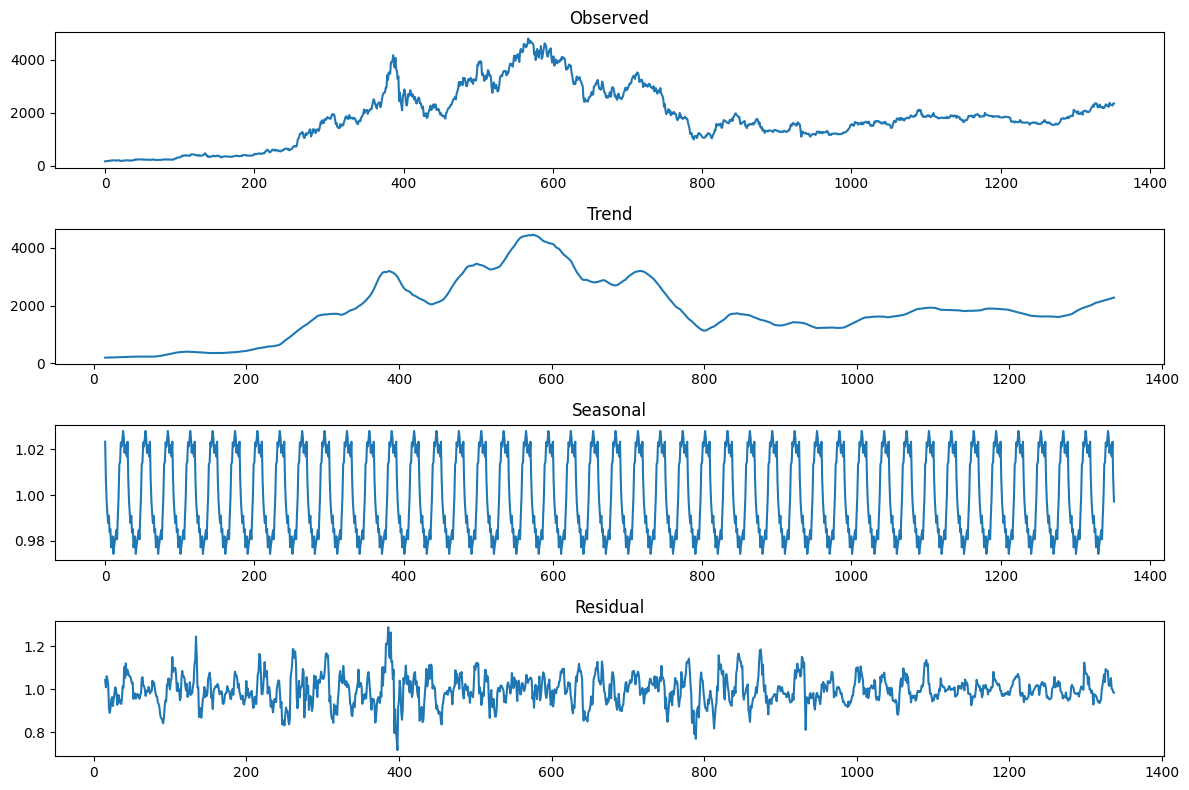

In [67]:
# 30 day period
decompose_series(eth_daily['close'], 30)

<a id="eth-time-series-decomposition-close-120d"></a>
#### 7.3.1.3 Time Series Decomposition: Ethereum Close Price, Period = 120 Days

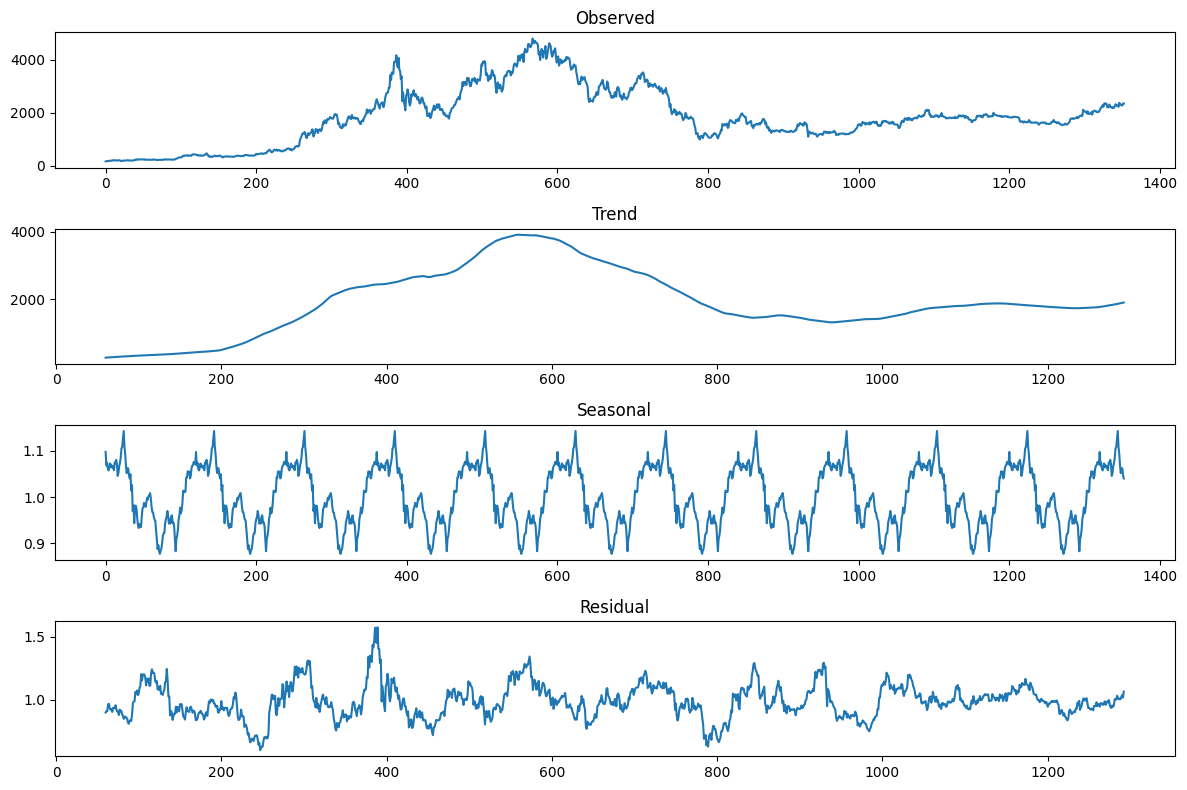

In [68]:
# 120 day period
decompose_series(eth_daily['close'], 120)

<a id="eth-time-series-decomposition-vusd"></a>
### 7.3.2 Time Series Decomposition: Ethereum Trade Volume (USD)

<a id="eth-time-series-decomposition-vusd-7d"></a>
#### 7.3.2.1 Time Series Decomposition: Ethereum Trade Volune (USD), Period = 7 Days

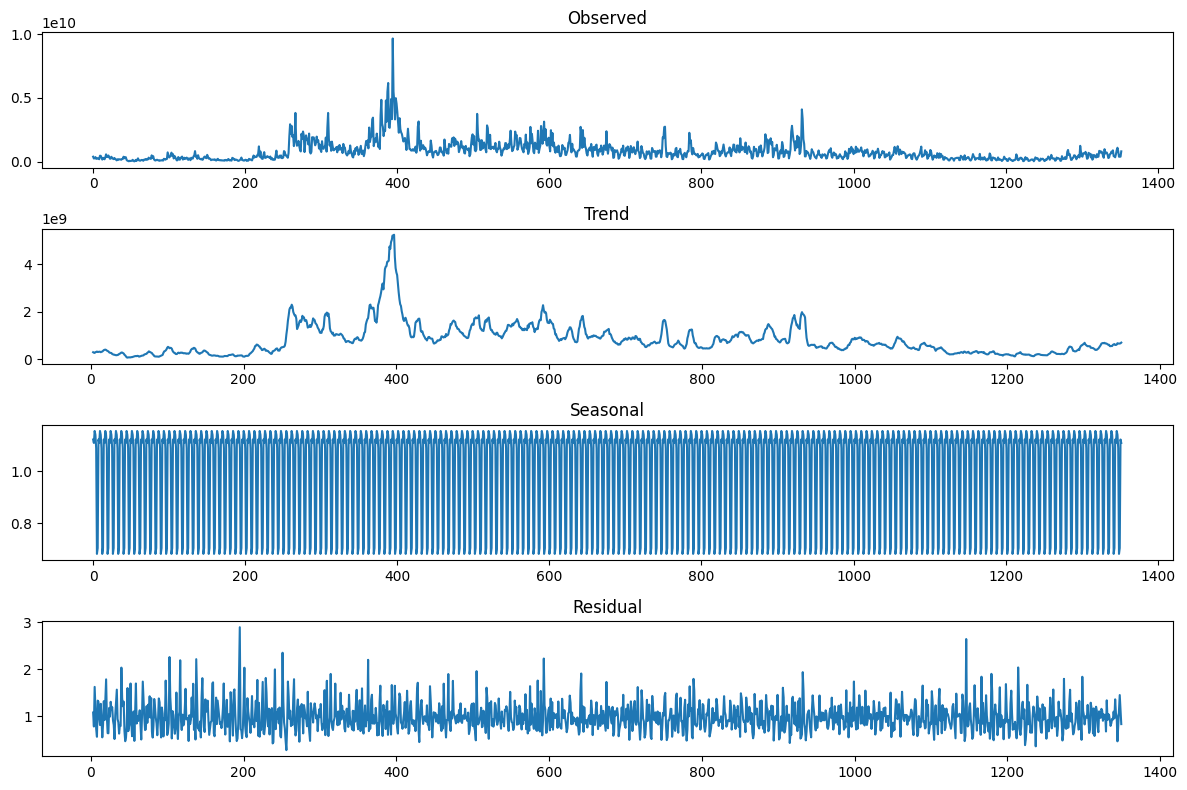

In [69]:
# 7 day
decompose_series(eth_daily['trade_vol_USD'], 7)

<a id="eth-time-series-decomposition-vusd-30d"></a>
#### 7.3.2.2 Time Series Decomposition: Ethereum Trade Volume (USD), Period = 30 Days

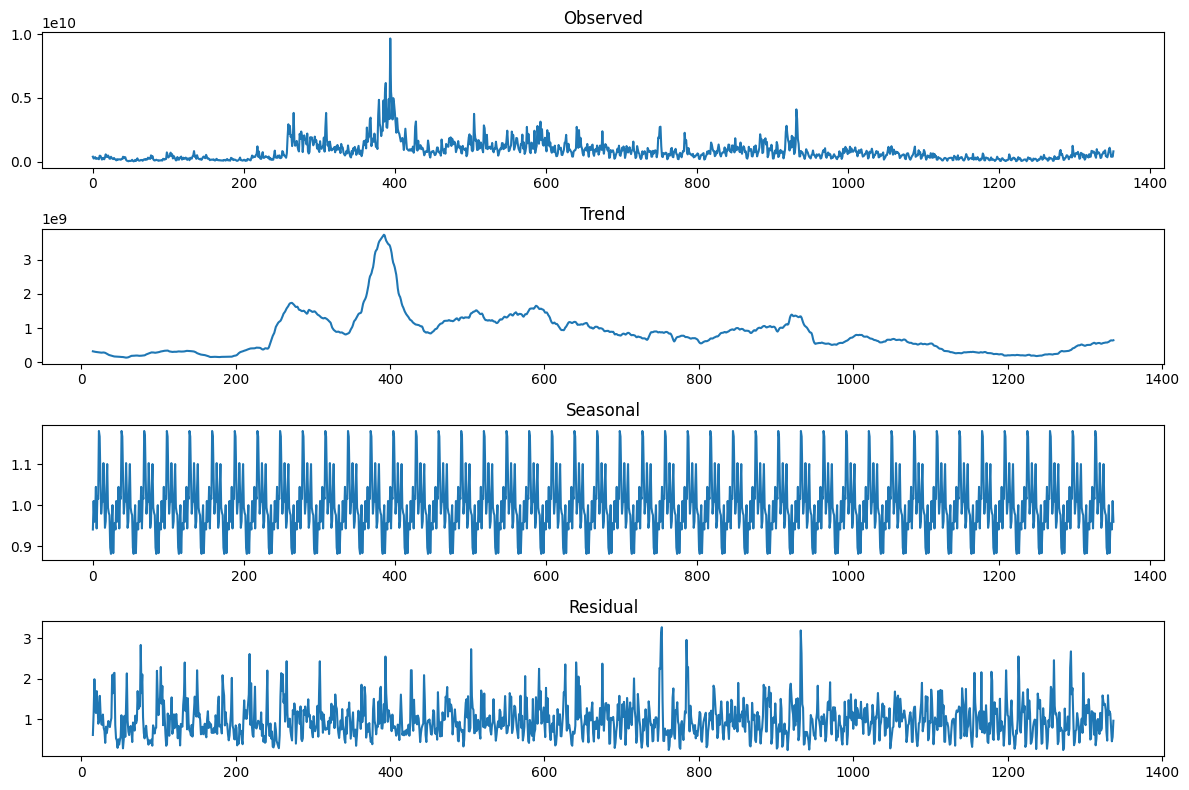

In [70]:
# 30 day
decompose_series(eth_daily['trade_vol_USD'], 30)

<a id="eth-time-series-decomposition-vusd-120d"></a>
#### 7.3.2.3 Time Series Decomposition: Ethereum Trade Volume (USD), Period = 120 Days

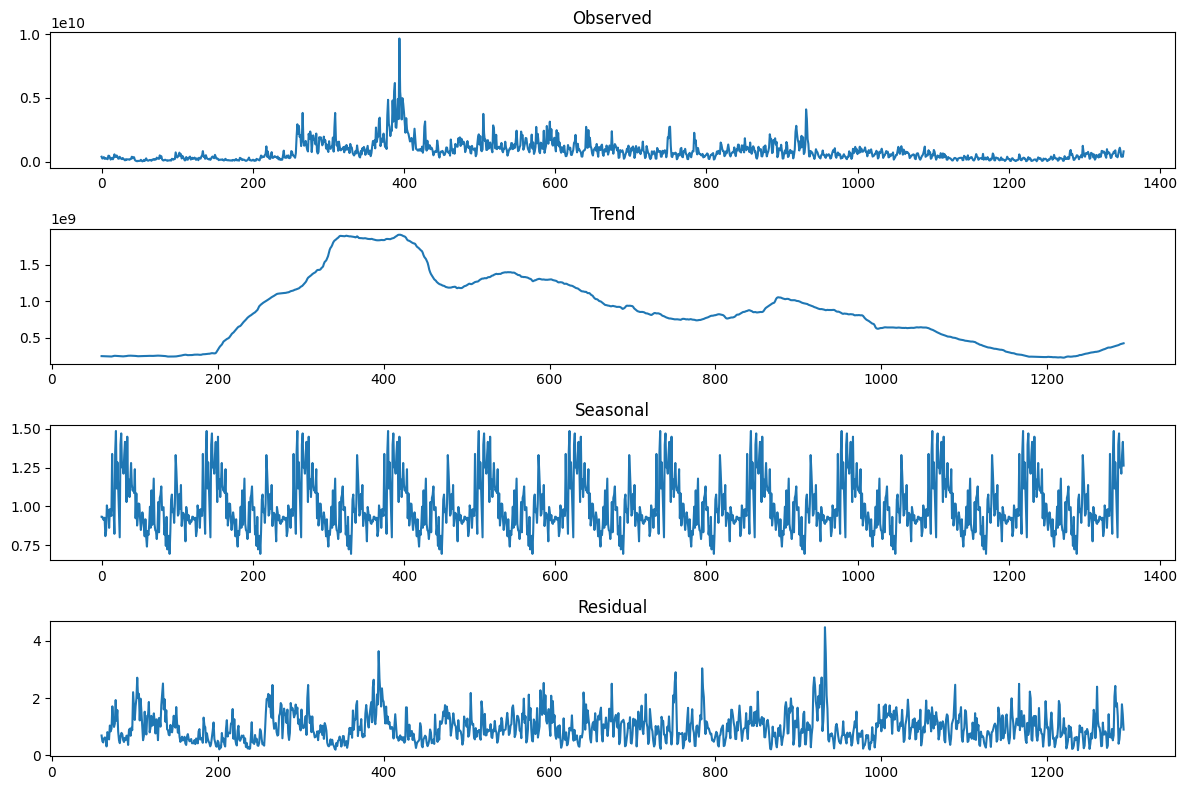

In [71]:
# 120 day
decompose_series(eth_daily['trade_vol_USD'], 120)

<a id="sol-time-series-decomposition"></a>
## 7.4 Solana Time Series Decomposition

<a id="sol-time-series-decomposition-close"></a>
### 7.4.1 Time Series Decomposition: Solana Close Price

<a id="sol-time-series-decomposition-close-7d"></a>
#### 7.4.1.1 Time Series Decomposition: Solana Close Price, Period = 7 Days

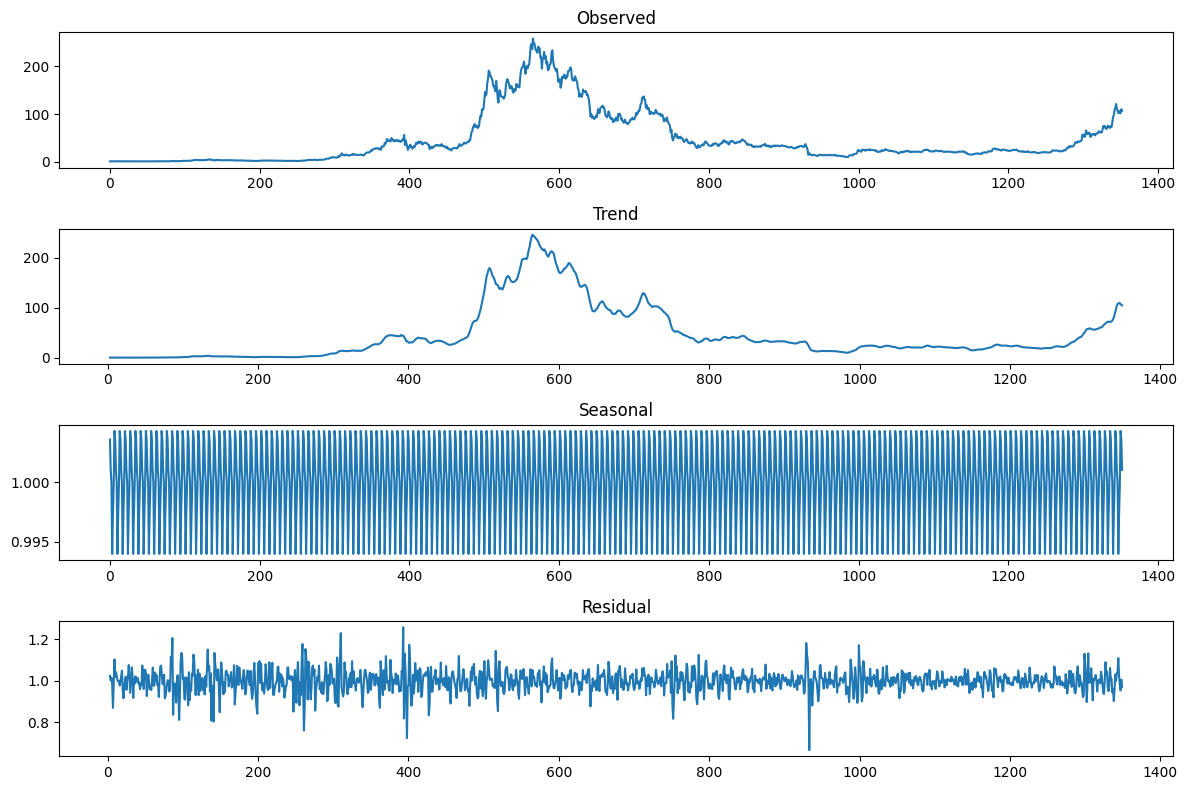

In [72]:
# 7 day
decompose_series(sol_daily['close'], 7)

<a id="sol-time-series-decomposition-close-30d"></a>
#### 7.4.1.2 Time Series Decomposition: Solana Close Price, Period = 30 Days

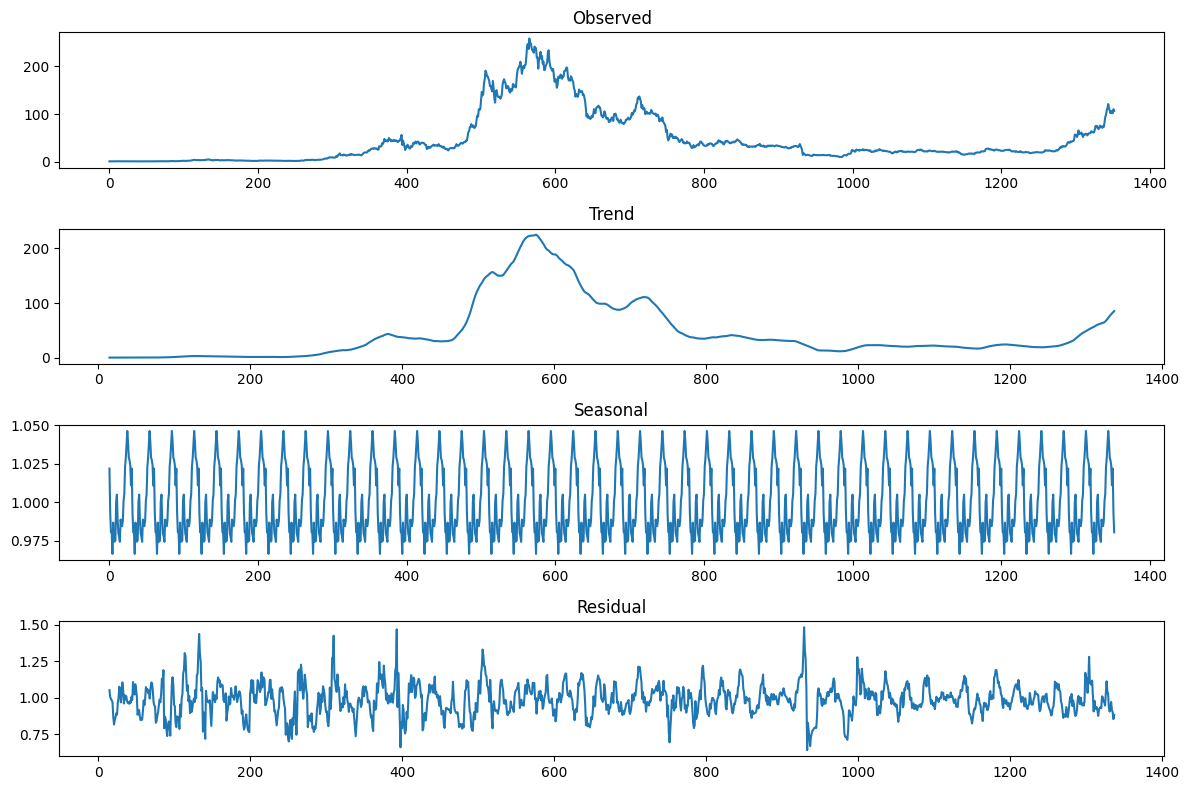

In [73]:
# 30 day
decompose_series(sol_daily['close'], 30)

<a id="sol-time-series-decomposition-close-120d"></a>
#### 7.4.1.3 Time Series Decomposition: Solana Close Price, Period = 120 Days

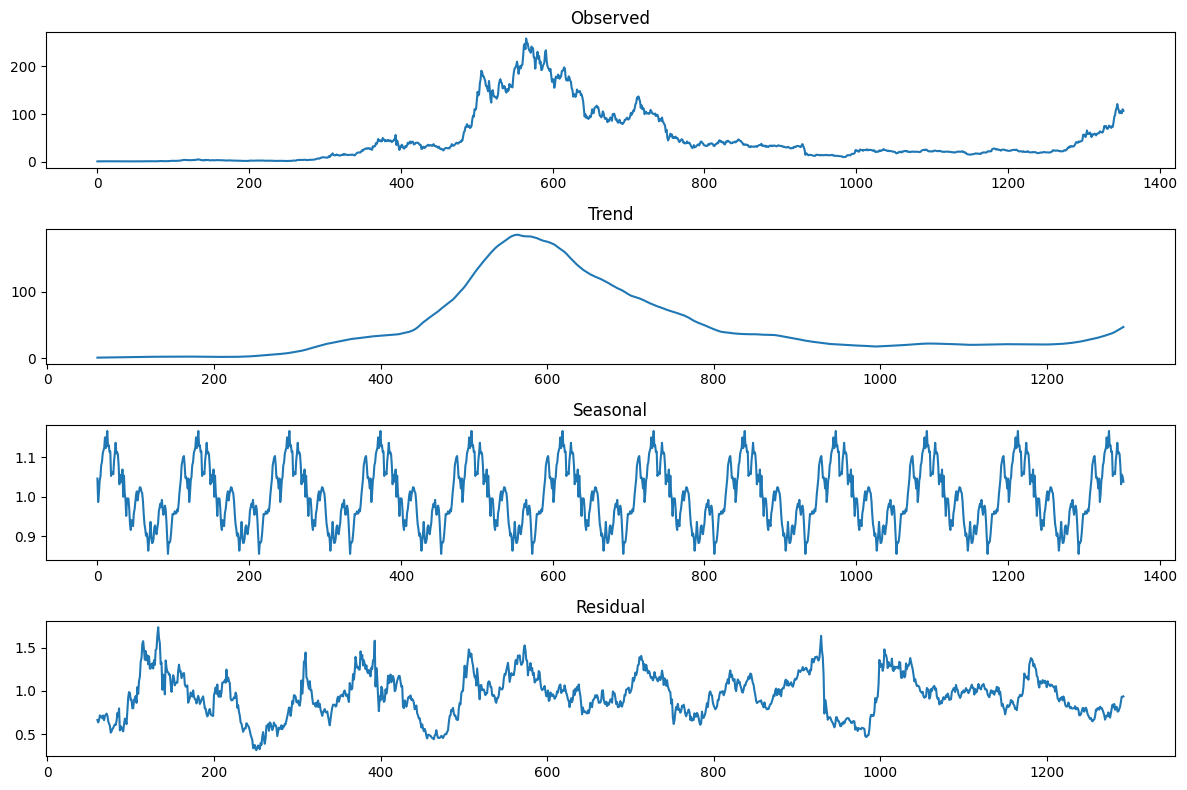

In [74]:
# 120 day
decompose_series(sol_daily['close'], 120)

<a id="sol-time-series-decomposition-vusd"></a>
### 7.4.2 Time Series Decomposition: Solana Trade Volume (USD)

<a id="sol-time-series-decomposition-vusd-7d"></a>
#### 7.4.2.1 Time Series Decomposition: Solana Trade Volume (USD), Period = 7 Days

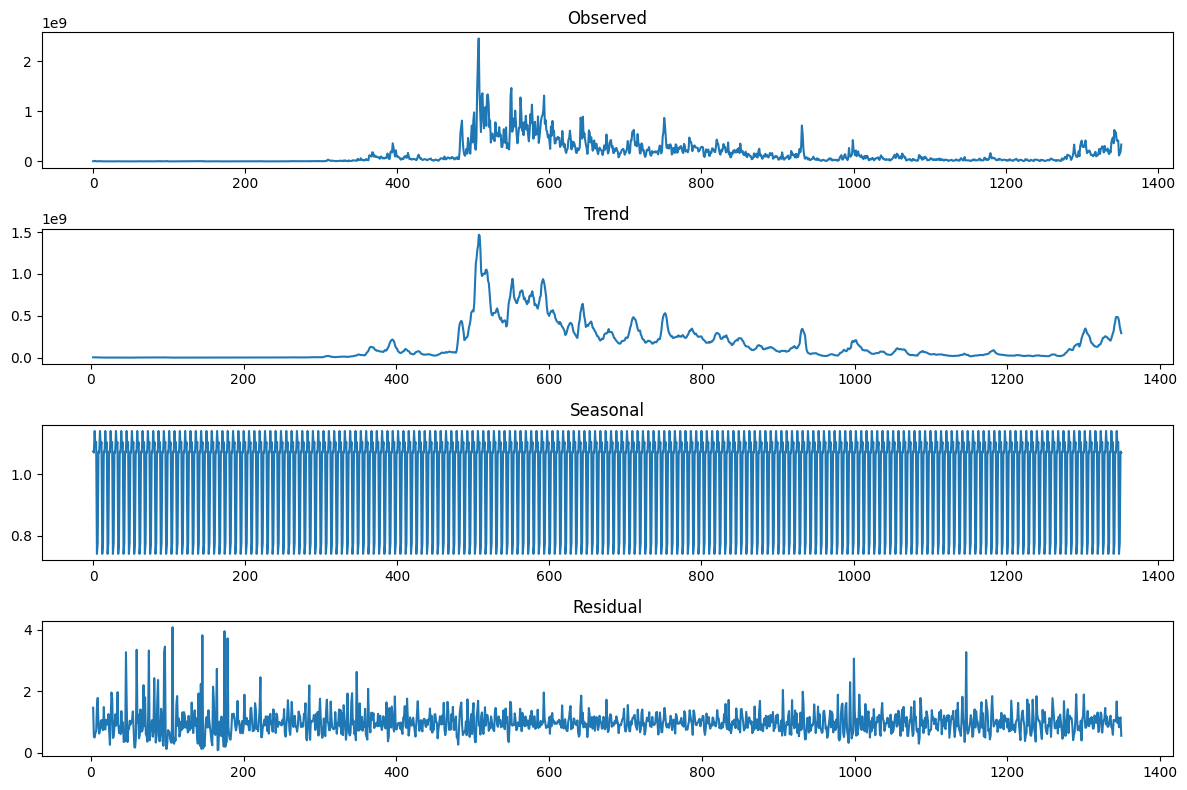

In [75]:
# 7 day
decompose_series(sol_daily['trade_vol_USD'], 7)

<a id="sol-time-series-decomposition-vusd-30d"></a>
#### 7.4.2.2 Time Series Decomposition: Solana Trade Volume (USD), Period = 30 Days

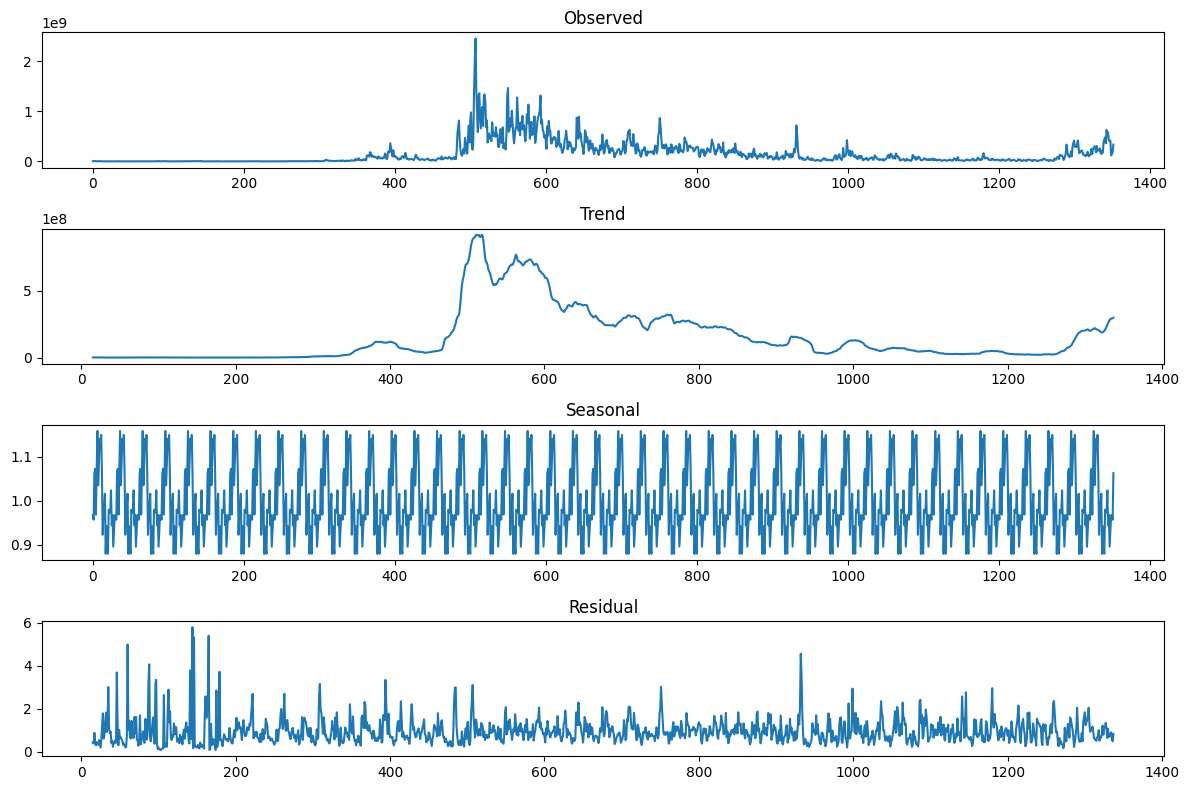

In [76]:
# 30 day
decompose_series(sol_daily['trade_vol_USD'], 30)

<a id="sol-time-series-decomposition-vusd-120d"></a>
#### 7.4.2.3 Time Series Decomposition: Solana Trade Volume (USD), Period = 120 Days

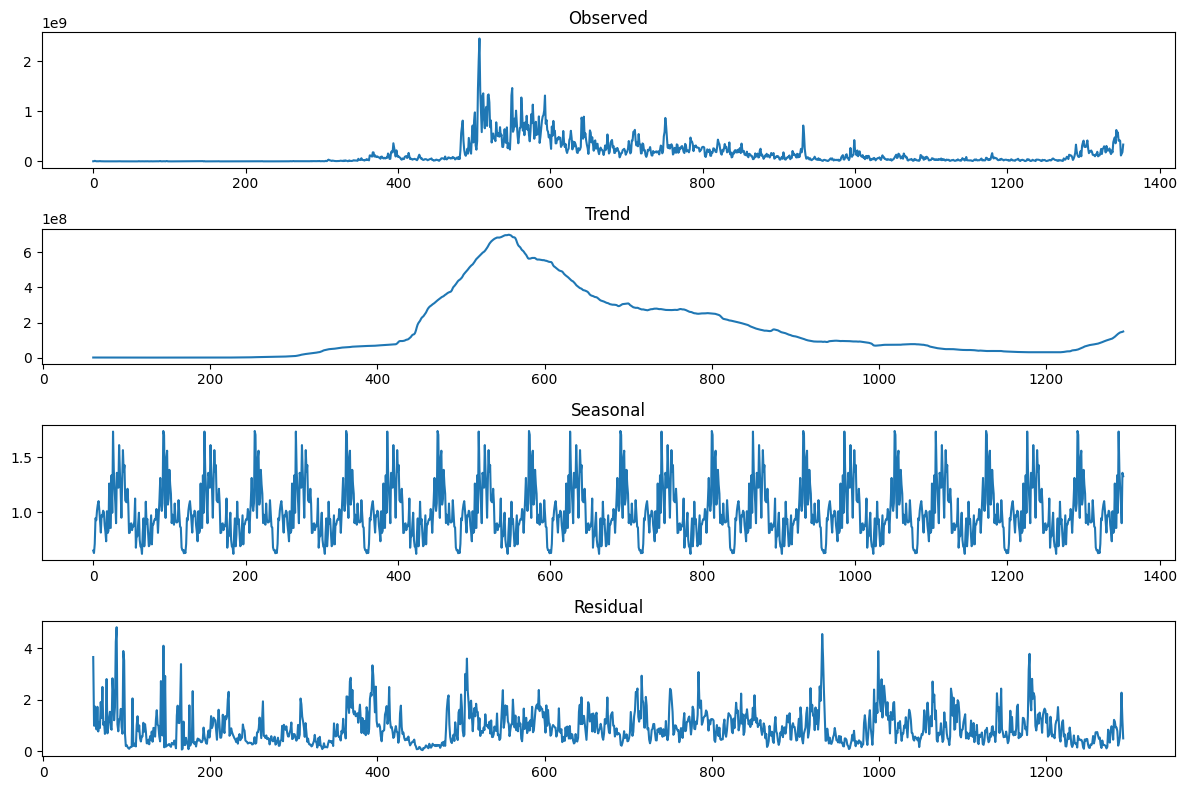

In [77]:
decompose_series(sol_daily['trade_vol_USD'], 120)

<a id="time-series-decomposition-coins-reflection"></a>
## 7.5 Time Series Decomposition of Individual Coins : Reflection
- There don't appear to be any cyclical trade patterns, seasonal or otherwise, that have revealed themselves over the past four years
- Although all three coins saw growth and decline around the same time periods, we can't assert that this was a result of intrinsic ties to each other.
- All trade movements should be viewwed in light of the concurrent Covid events
- ### Bitcoin
- Bitcoin prices grew markedly from day 200 to around 375 (end of 2020 to aorund June, 2021), dipped briefly, then were strong again until day 600 (early 2022), at which point they dropped and hit rock-bottom at around day 800 (around the end of 2022)
- Trade volumes for Bitcoin followed the same trajectory
- ### Ethereum
- Ethereum lagged behind Bitcoin by around 100 days, then jumped at around day 400 (July 2021)
- By day 800, Ethereum was also at rock-bottom
- Trade volume patterns are similar
- ### Solana
- Solana first hit the market around the same time that Covid hit the globe
- Solana price growth remained flat until day 500, at which point it spiked
- By day 800, Solana prices followed suit and were very low by day 800
- Trade volume patters were similar
  

<a id="time-series-decomposition-compare-plots"></a>
## 7.6 Time Series Decompositions: Comparitive Plots 
**To most easily see if correlations exist between relevant coin trade movements over time, we plot time series decompositions side by side.**

<a id="def-plot-decomposed-components()"></a>
### 7.6.1 def plot_decomposed_componenets()

In [78]:
def plot_decomposed_components(*time_series, period, component='observed'):
    """
    Plots a specified component (observed, trend, seasonal, residual) of seasonal decompositions 
    for multiple time series in a single plot.

    Parameters:
    *time_series (list of Series): Variable number of time series data.
    period (int): The period for seasonal decomposition.
    component (str): The component of the decomposition to plot ('observed', 'trend', 'seasonal', 'residual').
    """
    plt.figure(figsize=(12, 6))

    # Define colors for different time series
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
    if len(time_series) > len(colors):
        raise ValueError("Too many time series. Max allowed is {}".format(len(colors)))

    for i, series in enumerate(time_series):
        decomp_result = sm.tsa.seasonal_decompose(series, model='additive', period=period)
        if component == 'observed':
            plt.plot(decomp_result.observed, label='Series {}'.format(i+1), color=colors[i])
        elif component == 'trend':
            plt.plot(decomp_result.trend, label='Series {}'.format(i+1), color=colors[i])
        elif component == 'seasonal':
            plt.plot(decomp_result.seasonal, label='Series {}'.format(i+1), color=colors[i])
        elif component == 'residual':
            plt.plot(decomp_result.resid, label='Series {}'.format(i+1), color=colors[i])

    plt.title('{} Components'.format(component.capitalize()))
    plt.legend()
    plt.show()


<a id="time-series-daily-weekly-change-ref"></a>
### 7.6.2 Daily_Weekly_Changes Reference
**The datagrame daily_weekly_changes is provided again for reference**



In [79]:
daily_weekly_changes = pd.DataFrame({
    'BTC_24h%': btc_daily['24h%'],
    'BTC_7d%': btc_daily['7d%'],
    'BTC_vUSD_24h%': btc_daily['24h_usd%'],
    'BTC_vUSD_7d%': btc_daily['7d_usd%'],
    'ETH_24h%': eth_daily['24h%'],
    'ETH_7d%': eth_daily['7d%'],
    'ETH_vUSD_24h%': eth_daily['24h_usd%'],
    'ETH_vUSD_7d%': eth_daily['7d_usd%'],
    'SOL_24h%': sol_daily['24h%'],
    'SOL_7d%': sol_daily['7d%'],
    'SOL_vUSD_24h%': sol_daily['24h_usd%'],
    'SOL_vUSD_7d%': sol_daily['7d_usd%'],
})
daily_weekly_changes.head()

BTC_24h%  BTC_7d%  BTC_vUSD_24h%  BTC_vUSD_7d%  ETH_24h%  ETH_7d%  \
0       NaN      NaN            NaN           NaN       NaN      NaN   
1  0.185021      NaN     -32.383190           NaN  0.222678      NaN   
2  4.088921      NaN       0.788052           NaN  7.010466      NaN   
3  4.958930      NaN      94.383509           NaN  1.480712      NaN   
4  0.269586      NaN     -35.075128           NaN  1.039143      NaN   

   ETH_vUSD_24h%  ETH_vUSD_7d%   SOL_24h%  SOL_7d%  SOL_vUSD_24h%  \
0            NaN           NaN        NaN      NaN            NaN   
1     -35.245590           NaN   8.738959      NaN      46.965167   
2       9.616921           NaN  19.961977      NaN     202.094651   
3      30.207692           NaN  -9.047688      NaN     -38.994620   
4     -35.544534           NaN  -0.934579      NaN     -64.971009   

   SOL_vUSD_7d%  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

<a id="time-series-decomp-coins-price-side-by-side"></a>
### 7.6.3 Time Series Decomposition: BTC, ETH, SOL Weekly % Changes, 30-day & 120-day Periods
**We'll plot the 30-day and 120-day time series decomposition trends side by side, looking for correlation in price fluctuations, whether fluctuations occur in similar fashion at the same times, in series, or not at all.**

**First we'll drop the null values that occur at the beginning of the dataframe**

In [80]:
daily_weekly_changes.isna().sum()

for column in daily_weekly_changes.columns:
    # Drop rows where the column has null values
    daily_weekly_changes = daily_weekly_changes[daily_weekly_changes[column].notna()]


<a id="time-series-decomp-coins-price-side-by-side-30d"></a>
#### 7.6.3.1 Time Series Decomposition: Weekly Percent Change in Price, Component = Trend Period 30 days
**Bitcoin = Blue, Ethereum = Greeb, Solana = Red**

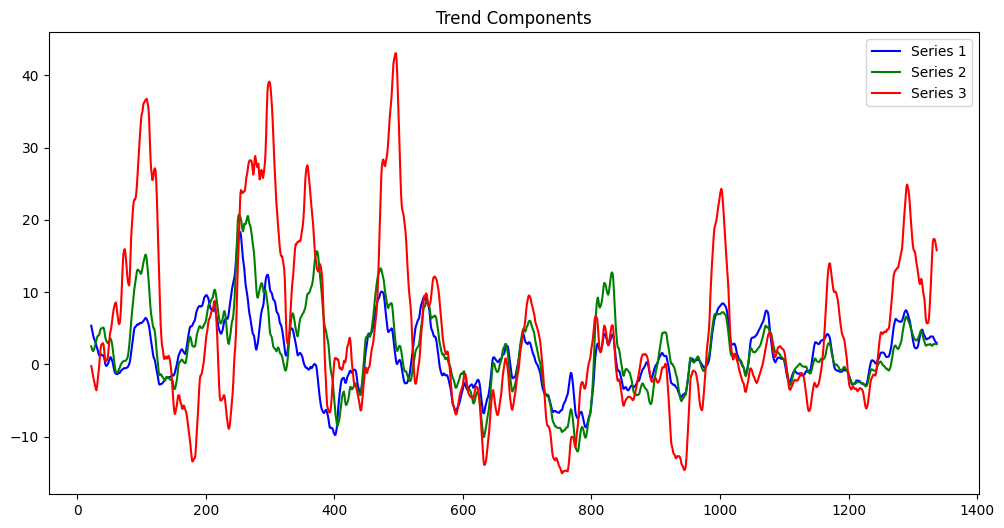

In [81]:
# 30 day trend
plot_decomposed_components(daily_weekly_changes['BTC_7d%'], daily_weekly_changes['ETH_7d%'], daily_weekly_changes['SOL_7d%'], period=30, component='trend')

<a id="time-series-decomp-coins-price-side-by-side-120d"></a>
#### 7.6.3.2 Time Series Decomposition: Weekly Percent Price Change in Price, Component = Trend, Period = 120 Days
**Bitcoin = Blue, Ethereum = Greeb, Solana = Red**

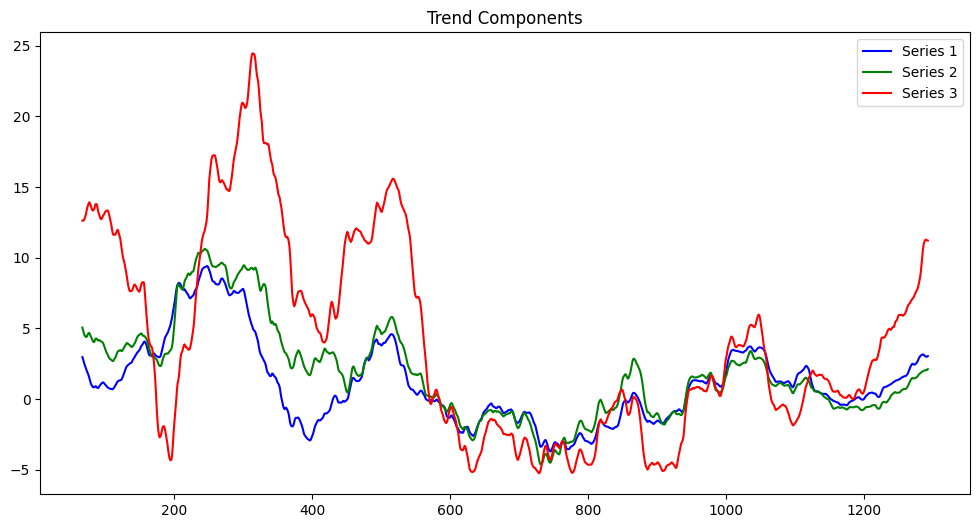

In [82]:
# 120-day trend
plot_decomposed_components(daily_weekly_changes['BTC_7d%'], daily_weekly_changes['ETH_7d%'], daily_weekly_changes['SOL_7d%'], period=120, component='trend')

<a id="time-series-decomp-coins-vusd-side-by-side"></a>
### 7.6.4 Time Series Decomposition: Weekly Trade Volume (USD) Percent Change, Component = Trend, Period = 30 Days
**Bitcoin = Blue, Ethereum = Greeb, Solana = Red**

<a id="time-series-decomp-coins-vusd-side-by-side-30d"></a>
#### 7.6.4.1 Time Series Decomposition: Weekly Trade Volume (USD) Percent Change, Component = Trend, Period = 30 Days
**Bitcoin = Blue, Ethereum = Greeb, Solana = Red**

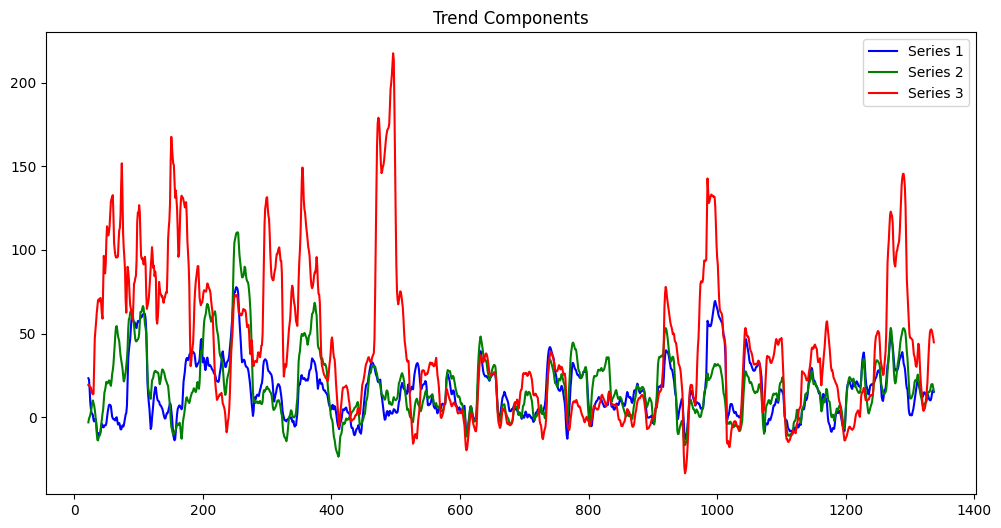

In [83]:
# 30 day vUSD % changes
plot_decomposed_components(daily_weekly_changes['BTC_vUSD_7d%'], daily_weekly_changes['ETH_vUSD_7d%'], daily_weekly_changes['SOL_vUSD_7d%'], period=30, component='trend')

<a id="time-series-decomp-coins-vusd-side-by-side-120d"></a>
#### 7.6.4.2 Time Series Decomposition: Weekly Trade Volume (USD) Percent Change, Component = Trend, Period = 120 Days
**Bitcoin = Blue, Ethereum = Greeb, Solana = Red**

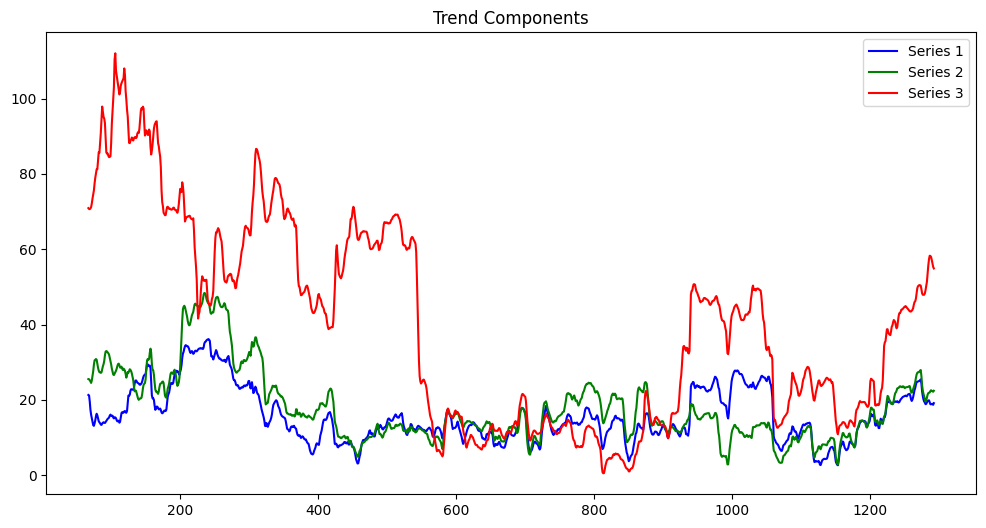

In [84]:
# 120 day vUSD % change
plot_decomposed_components(daily_weekly_changes['BTC_vUSD_7d%'], daily_weekly_changes['ETH_vUSD_7d%'], daily_weekly_changes['SOL_vUSD_7d%'], period=120, component='trend')

<a id="time-series-decomp-coins-side-by-side-reflections"></a>
### 7.6.5 Time Series Decomposition Comparisons : Reflections 
- There appears to be a correlation in price change over the 30 day and 120 days periods. Although all three coins' exchange values tended to rise and fall at proximate times, the change magnitudes of Bitcoin and Ethereum were more tightly coupled, while Solana exhibited much greater variability
- Vascillations in trade volumes also mimicked each other, although Solana changes varied to an even greater degree than did its changes in price.  Meanwhile, Bitcoin and Ethereum again followed closely similar fluctuation paths
- Given that Bitcoin and Ethereum (to a lesser degree) are the most well established and dominant cryptocurrencies on the market in terms of market capitalization, we tend to expect less volatility from them than we do Solana.  It might appear as though Bitcoin, or Ethereum, initiate movements in price and trade volume that Solana then follows.  In terms of relative magnitude, Solana changes are greater, presenting an opportunity for greater marginal returns for well-timed trades than can be achieved through trades in Bitcoin and Ethereum.


<a id="lead-lag-corr-analysis"></a>
# 8. Lead-Lag Correlation Analysis
**A lead-lag correlation analysis helps to determine if and how the movements of one coin's time series precede or follow the movements of another. Performing this analysis can help to identify if changes in one cryptocurrency's price or volume predict or are influenced by changes in another's**

In [85]:
hourly_changes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32712 entries, 1 to 34016
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BTC_1h%       32712 non-null  float64
 1   BTC_1h_vUSD%  32712 non-null  float64
 2   ETH_1h%       32712 non-null  float64
 3   ETH_1h_vUSD%  32712 non-null  float64
 4   SOL_1h%       32712 non-null  float64
 5   SOL_1h_vUSD%  32712 non-null  float64
dtypes: float64(6)
memory usage: 1.7 MB


In [86]:
hourly_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, BTC_1h% to SOL_1h_vUSD%
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BTC_1h%       6 non-null      float64
 1   BTC_1h_vUSD%  6 non-null      float64
 2   ETH_1h%       6 non-null      float64
 3   ETH_1h_vUSD%  6 non-null      float64
 4   SOL_1h%       6 non-null      float64
 5   SOL_1h_vUSD%  6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


In [87]:
daily_weekly_changes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 7 to 1352
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BTC_24h%       1346 non-null   float64
 1   BTC_7d%        1346 non-null   float64
 2   BTC_vUSD_24h%  1346 non-null   float64
 3   BTC_vUSD_7d%   1346 non-null   float64
 4   ETH_24h%       1346 non-null   float64
 5   ETH_7d%        1346 non-null   float64
 6   ETH_vUSD_24h%  1346 non-null   float64
 7   ETH_vUSD_7d%   1346 non-null   float64
 8   SOL_24h%       1346 non-null   float64
 9   SOL_7d%        1346 non-null   float64
 10  SOL_vUSD_24h%  1346 non-null   float64
 11  SOL_vUSD_7d%   1346 non-null   float64
dtypes: float64(12)
memory usage: 136.7 KB


<a id="lead-lag-corr-analysis-constants"></a>
## 8.1 Establishing Constants for Cross-Correlation

In [88]:
# Hourly Price Changes
BTC_1h_Price_Change = hourly_changes['BTC_1h%']
ETH_1h_Price_Change = hourly_changes['ETH_1h%']
SOL_1h_Price_Change = hourly_changes['SOL_1h%']
# Hourly Volume Changes
BTC_1h_vUSD_Change = hourly_changes['BTC_1h_vUSD%']
ETH_1h_vUSD_Change = hourly_changes['ETH_1h_vUSD%']
SOL_1h_vUSD_Change = hourly_changes['SOL_1h_vUSD%']
# 1 Day Price Changes
BTC_1d_Price_Change = daily_weekly_changes['BTC_24h%']
ETH_1d_Price_Change = daily_weekly_changes['ETH_24h%']
SOL_1d_Price_Change = daily_weekly_changes['SOL_24h%']
# 1 Day Volume Changes
BTC_1d_vUSD_Change = daily_weekly_changes['BTC_vUSD_24h%']
ETH_1d_vUSD_Change = daily_weekly_changes['ETH_vUSD_24h%']
SOL_1d_vUSD_Change = daily_weekly_changes['SOL_vUSD_24h%']
# 7 Day Price Changes
BTC_7d_Price_Change = daily_weekly_changes['BTC_7d%']
ETH_7d_Price_Change = daily_weekly_changes['ETH_7d%']
SOL_7d_Price_Change = daily_weekly_changes['SOL_7d%']
# 7 Day Volume Changes
BTC_7d_vUSD_Change = daily_weekly_changes['BTC_vUSD_7d%']
ETH_7d_vUSD_Change = daily_weekly_changes['ETH_vUSD_7d%']
SOL_7d_vUSD_Change = daily_weekly_changes['SOL_vUSD_7d%']

<a id="lead-lag-corr-analysis-function"></a>
## 8.2 Cross Correlation Functions

<a id="lead-lag-corr-analysis-fx-pearson-corr"></a>
### 8.2.1 Calculate Pearson Correlation Significance  
**Running a Pearson Correlation Significance check before delving into lead-lag correlation analyses provides an initial understanding of the linear relationship between the variables we'll analyse.  The result helps us ascertain whether a statistically significant correlation exists worth exploring**

In [89]:
def check_correlation_significance(series1, series2):
    """
    Calculates the Pearson correlation coefficient between two series 
    and checks if the correlation is statistically significant.

    Parameters:
    series1 (pd.Series): The first time series data.
    series2 (pd.Series): The second time series data.

    Returns:
    A message indicating the correlation coefficient and its significance.
    """

    # Calculate the Pearson correlation coefficient and the p-value
    correlation_coefficient, p_value = stats.pearsonr(series1, series2)

    # Print the results
    print(f"Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")

    # Check if the correlation is statistically significant
    if p_value < 0.05:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")

# Example usage:
# check_correlation_significance(BTC_1h_Price_Change, ETH_1h_Price_Change)


<a id="lead-lag-corr-analysis-fx-cross-corr"></a>
### 8.2.2 Cross-correlation Function

In [90]:
def cross_correlate(coin_measure_1, coin_measure_2, max_lag, interval='days'):
    """
    Calculates and plots the cross-correlation function between two time series data over a range of lags.

    Parameters:
    coin_measure_1 (pd.Series): The first time series data.
    coin_measure_2 (pd.Series): The second time series data.
    max_lag (int): The maximum number of lags to calculate the cross-correlation.
    interval (str): The time interval of the data ('hours', 'days', 'weeks'). Default is 'days'.

    The function plots the cross-correlation values across different lags.
    """

    # Generate a range of lags
    lags = range(-max_lag, max_lag + 1)

    # Calculate the correlation for each lag
    correlations = [coin_measure_1.corr(coin_measure_2.shift(lag)) for lag in lags]

    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.plot(lags, correlations, marker='o')
    plt.title('Cross-Correlation Function')

    # Set the x-label based on the specified interval
    plt.xlabel(f'Lags ({interval})')
    plt.ylabel('Correlation')

    # Add reference lines
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.grid(True)

    # Show the plot
    plt.show()

# Example function calls
# cross_correlate(BTC_1h_Price_Change, ETH_1h_Price_Change, max_lag=48, interval='hours')
# cross_correlate(BTC_1d_Price_Change, ETH_1d_Price_Change, max_lag=30, interval='days')
# cross_correlate(BTC_7d_Price_Change, ETH_7d_Price_Change, max_lag=10, interval='weeks')


<a id="lead-lag-corr-1h-24h"></a>
## 8.3 Cross Correlations: 1 Hour Change, Lag Range 24 Hours

<a id="lead-lag-corr-price-1h-24h-BTC-ETH"></a>
### 8.3.1 Cross-correlation: BTC v ETH 1 Hour Price Change, Lag Range 24 hours

In [91]:
check_correlation_significance(BTC_1h_Price_Change, ETH_1h_Price_Change)

Correlation Coefficient: 0.830823133363219
P-value: 0.0
The correlation is statistically significant.


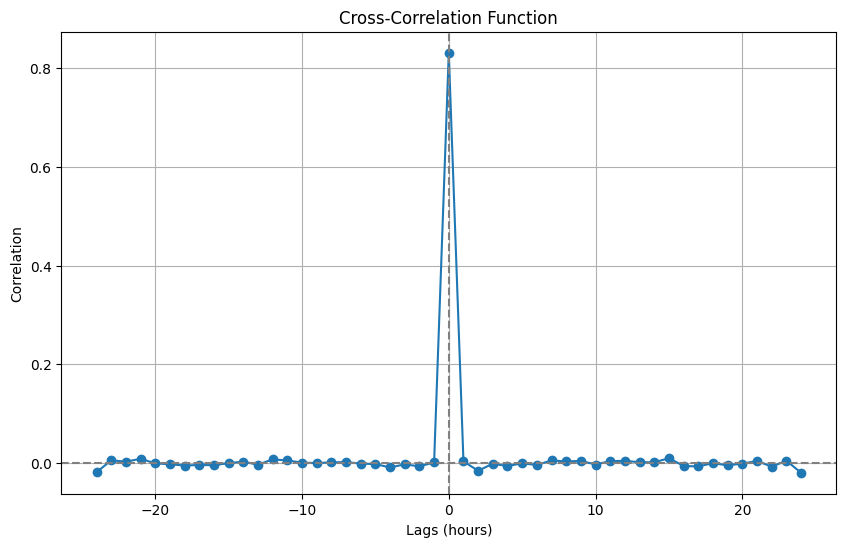

In [92]:
cross_correlate(BTC_1h_Price_Change, ETH_1h_Price_Change, max_lag=24, interval='hours')

<a id="lead-lag-corr-price-1h-24h-BTC-SOL"></a>
### 8.3.2 Cross-correlation: BTC v SOL 1 Hour Price Change, Lag Range 24 Hours

In [93]:
check_correlation_significance(BTC_1h_Price_Change, SOL_1h_Price_Change)

Correlation Coefficient: 0.6492192121985205
P-value: 0.0
The correlation is statistically significant.


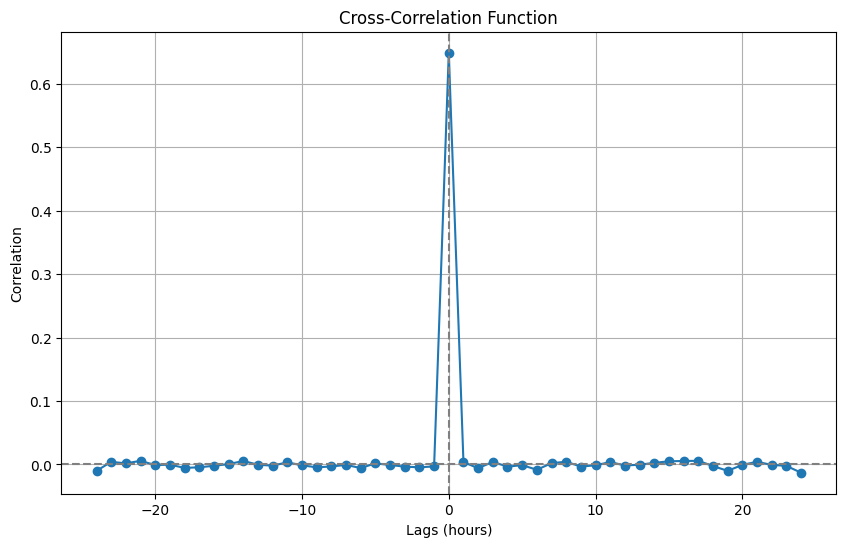

In [94]:
cross_correlate(BTC_1h_Price_Change, SOL_1h_Price_Change, max_lag=24, interval='hours')

<a id="lead-lag-corr-price-1h-24h-ETH-SOL"></a>
### 8.3.3 Cross-correlation: ETH v SOL 1 Hour Price Change, Lag Range 24 Hours

In [95]:
check_correlation_significance(ETH_1h_Price_Change, SOL_1h_Price_Change)

Correlation Coefficient: 0.750776359984879
P-value: 0.0
The correlation is statistically significant.


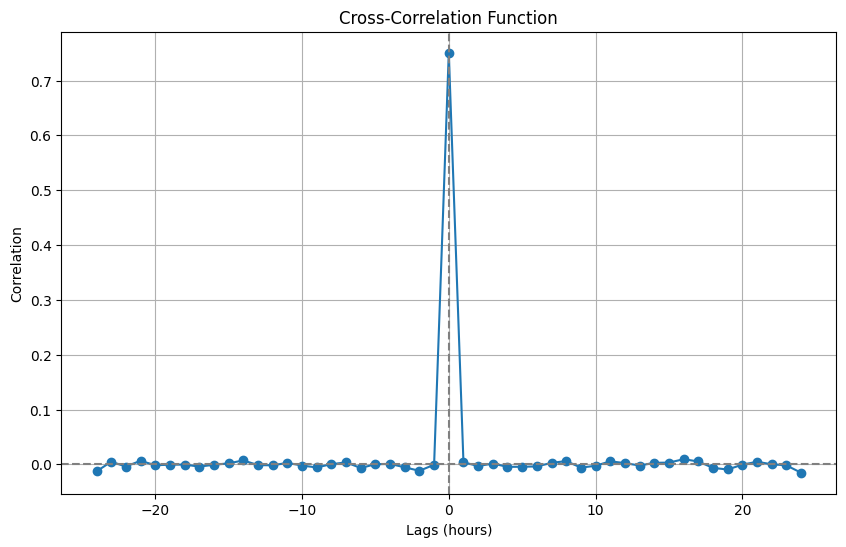

In [96]:
cross_correlate(ETH_1h_Price_Change, SOL_1h_Price_Change, max_lag=24, interval='hours')

<a id="lead-lag-corr-vusd-1h-24h-BTC-ETH"></a>
### 8.3.4 Cross Correlation: BTC v ETH 1 Hour vUSD Change, Lag Range 24 Hours

In [97]:
check_correlation_significance(BTC_1h_vUSD_Change, ETH_1h_vUSD_Change)

Correlation Coefficient: 0.2538027661805364
P-value: 0.0
The correlation is statistically significant.


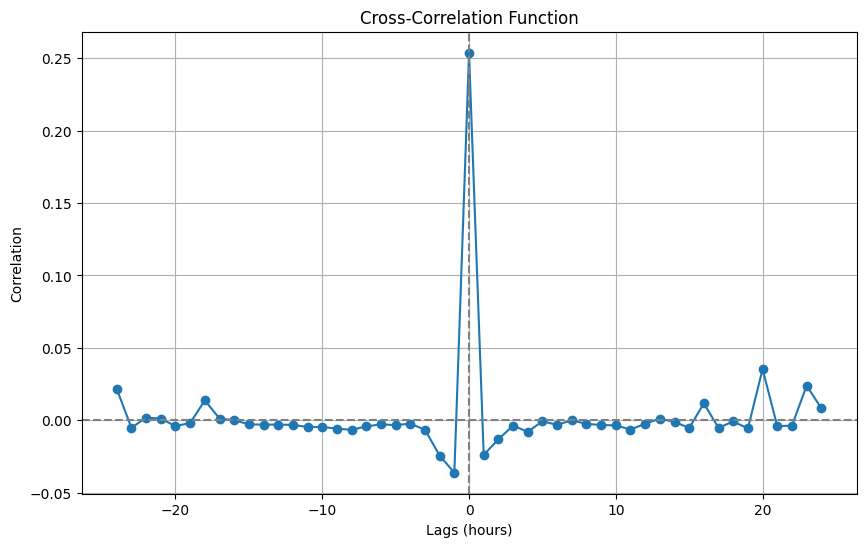

In [98]:
cross_correlate(BTC_1h_vUSD_Change, ETH_1h_vUSD_Change, max_lag=24, interval='hours')

<a id="lead-lag-corr-vusd-1h-24h-BTC-SOL"></a>
### 8.3.5 Cross Correlation: BTC v SOL 1 Hour vUSD Change, Lag Range 24 Hours

In [99]:
check_correlation_significance(BTC_1h_vUSD_Change, SOL_1h_vUSD_Change)

Correlation Coefficient: 0.04663954841079264
P-value: 3.181177642099954e-17
The correlation is statistically significant.


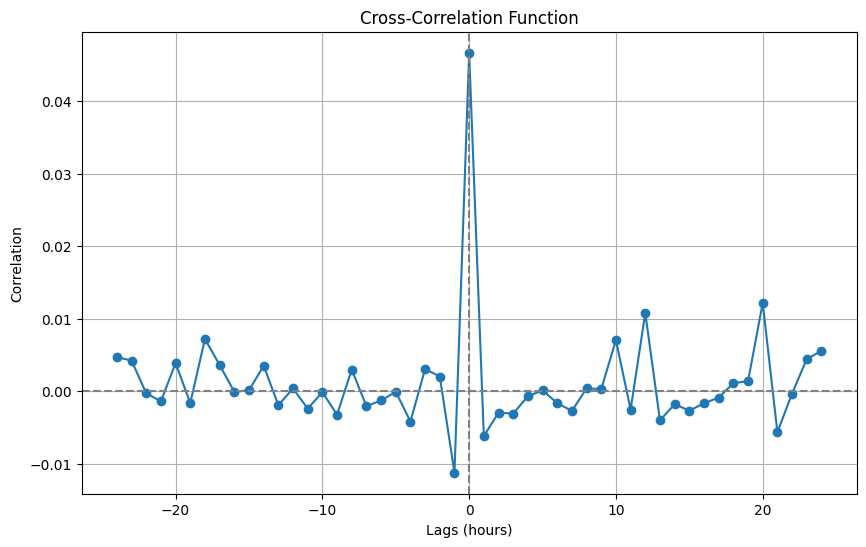

In [100]:
cross_correlate(BTC_1h_vUSD_Change, SOL_1h_vUSD_Change, max_lag=24, interval='hours')

<a id="lead-lag-corr-vusd-1h-24h-ETH-SOL"></a>
### 8.3.6 Cross Correlation: ETH v SOL 1 Hour vUSD Change, Lag Range 24 Hours

In [101]:
check_correlation_significance(ETH_1h_vUSD_Change, SOL_1h_vUSD_Change)

Correlation Coefficient: 0.1269510164633711
P-value: 1.3600658744719013e-117
The correlation is statistically significant.


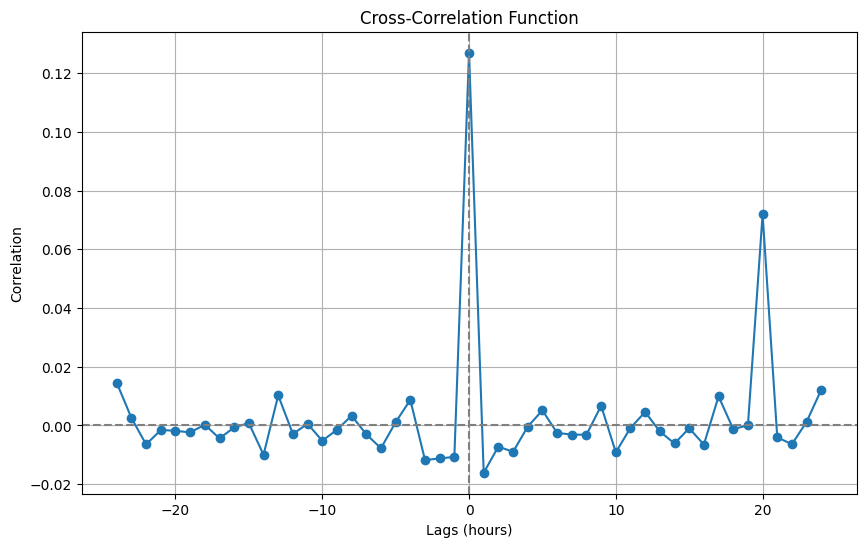

In [102]:
cross_correlate(ETH_1h_vUSD_Change, SOL_1h_vUSD_Change, max_lag=24, interval='hours')

<a id="lead-lag-corr-1h-reflections"></a>
### 8.3.7 Cross Correlation: 1 Hour Change Reflections
- All the comparisons made have very low p-scores, suggesting that any observed correlations are very unlikely to have occurred by random chance
- The data suggests that there is a significant positive linear correlation between hourly price changes, particularly between Bitcoin and Ethereum, and to a slightly less degree, Ethereum and Solana
- The data does not suggest that there is a linear correlation between the hourly changes in trade volume, measured in USD, of the three coins
- There is insufficient evidence to suggest any lead-lag relationship between any of the coins on an hour-to-hour interval

<a id="lead-lag-corr-1d-30d"></a>
## 8.4 Cross Correlation: 1 Day Change, Lag Range 30 Days

<a id="lead-lag-corr-price-1d-30d-BTC-ETH"></a>
### 8.4.1 Cross Correlation: BTC v ETH 1 Day Price Change, Lag Range 30 Days

In [103]:
check_correlation_significance(BTC_1d_Price_Change, ETH_1d_Price_Change)

Correlation Coefficient: 0.801438239819352
P-value: 2.48704908915606e-302
The correlation is statistically significant.


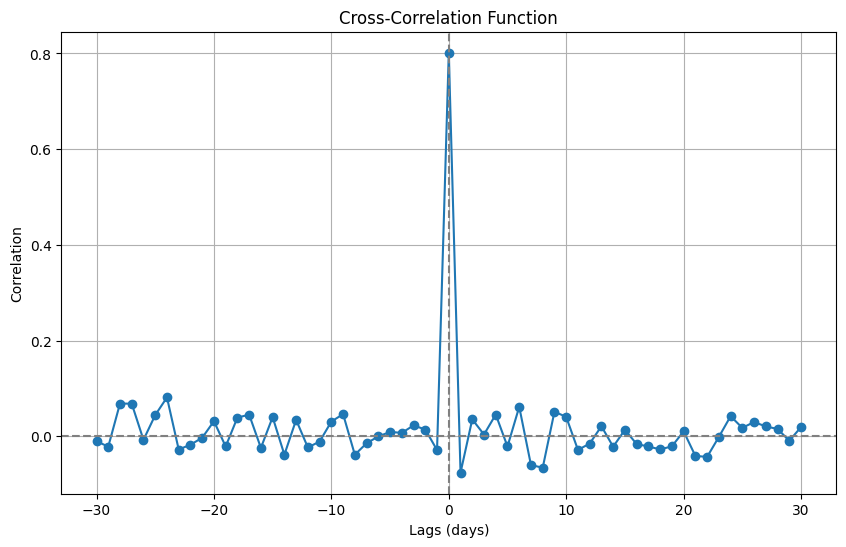

In [104]:
cross_correlate(BTC_1d_Price_Change, ETH_1d_Price_Change, max_lag=30, interval='days')

<a id="lead-lag-corr-price-1d-30d-BTC-SOL"></a>
### 8.4.2 Cross-correlation: BTC v SOL 1 Day Price Change, Lag Range 30 Days

In [105]:
check_correlation_significance(BTC_1d_Price_Change, SOL_1d_Price_Change)

Correlation Coefficient: 0.4827421912588935
P-value: 1.6601376915557337e-79
The correlation is statistically significant.


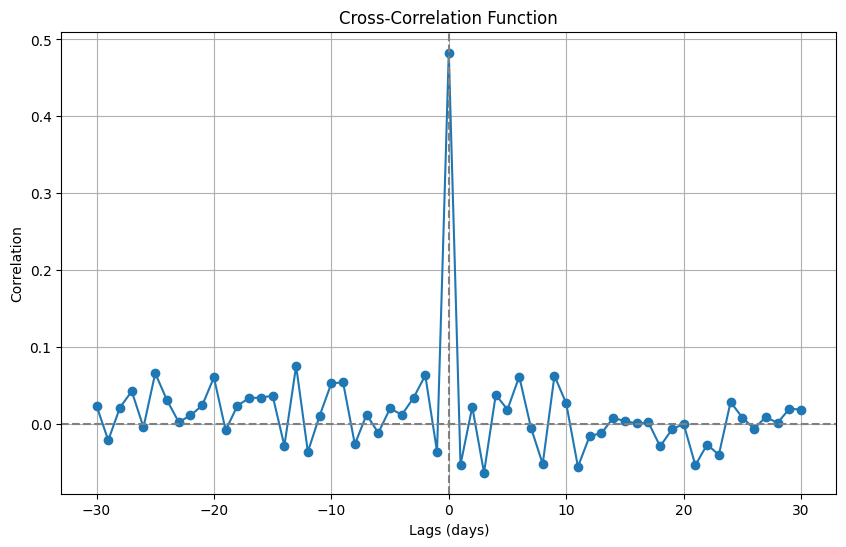

In [106]:
cross_correlate(BTC_1d_Price_Change, SOL_1d_Price_Change, max_lag=30, interval='days')

<a id="lead-lag-corr-price-1d-30d-ETH-SOL"></a>
### 8.4.3 Cross-correlation: ETH v SOL 1 Day Price Change, Lag Range 30 Days

In [107]:
check_correlation_significance(ETH_1d_Price_Change, SOL_1d_Price_Change)

Correlation Coefficient: 0.5745560268834763
P-value: 4.4669097074966027e-119
The correlation is statistically significant.


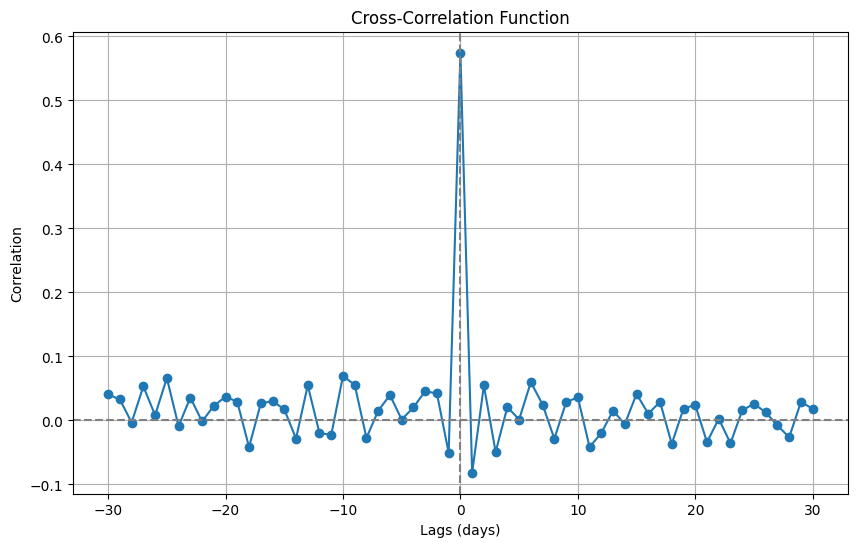

In [108]:
cross_correlate(ETH_1d_Price_Change, SOL_1d_Price_Change, max_lag=30, interval='days')

<a id="lead-lag-corr-vusd-1d-30d-BTC-ETH"></a>
### 8.4.4 Cross-correlation: BTC v ETH 1 Day vUSD Change, Lag Range 30 Days

In [109]:
check_correlation_significance(BTC_1d_vUSD_Change, ETH_1d_vUSD_Change)

Correlation Coefficient: 0.8052879654426256
P-value: 2.0078491688392314e-307
The correlation is statistically significant.


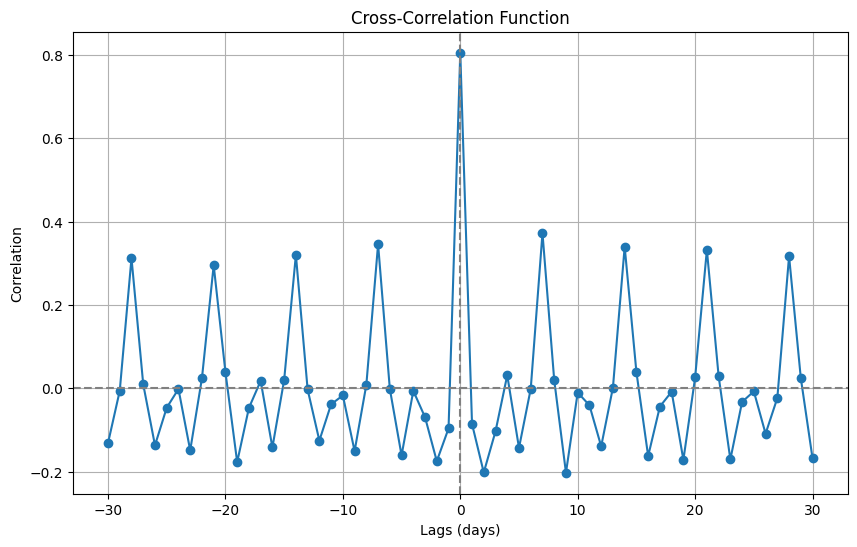

In [110]:
cross_correlate(BTC_1d_vUSD_Change, ETH_1d_vUSD_Change, max_lag=30, interval='days')

<a id="lead-lag-corr-vusd-1d-30d-BTC-SOL"></a>
### 8.4.5 Cross-correlation: BTC v SOL 1 Day vUSD Change, Lag Range 30 Days

In [111]:
check_correlation_significance(BTC_1d_vUSD_Change, SOL_1d_vUSD_Change)

Correlation Coefficient: 0.26614448097900056
P-value: 2.93401561618529e-23
The correlation is statistically significant.


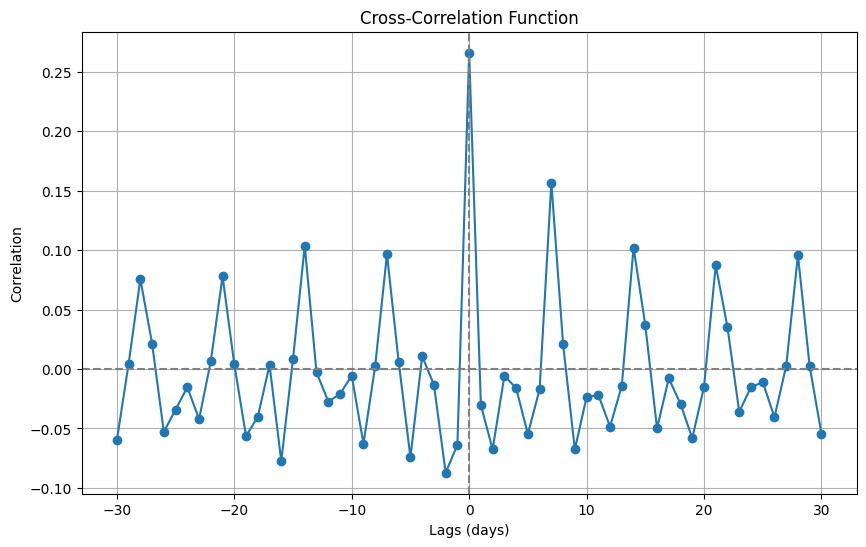

In [112]:
cross_correlate(BTC_1d_vUSD_Change, SOL_1d_vUSD_Change, max_lag=30, interval='days')

<a id="lead-lag-corr-vusd-1d-30d-ETH-SOL"></a>
### 8.4.5 Cross-correlation: ETH v SOL 1 Day vUSD Change, Lag Range 30 Days

In [113]:
check_correlation_significance(ETH_1d_vUSD_Change, SOL_1d_vUSD_Change)

Correlation Coefficient: 0.22254331608831182
P-value: 1.4462598697938292e-16
The correlation is statistically significant.


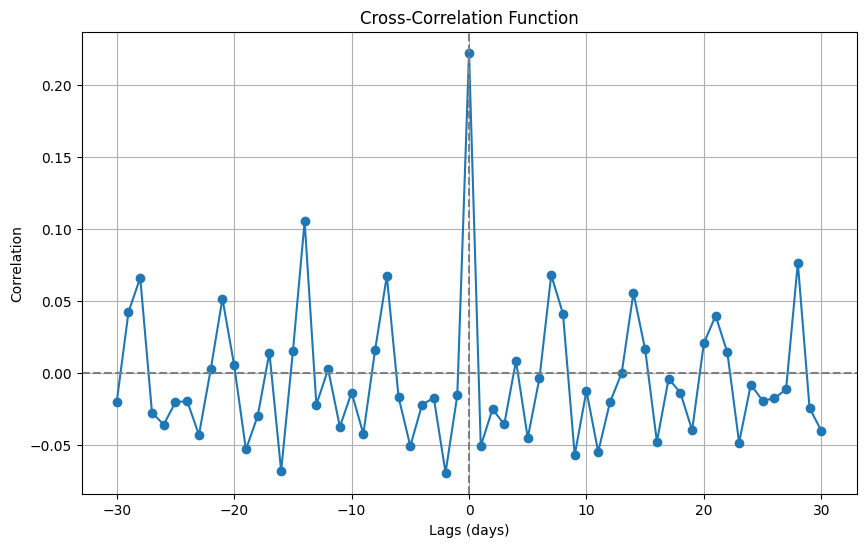

In [114]:
cross_correlate(ETH_1d_vUSD_Change, SOL_1d_vUSD_Change, max_lag=30, interval='days')

<a id="lead-lag-corr-30d-reflections"></a>
### 8.4.6 Cross Correlation: 30 Day Reflections
- All the comparisons made have very low p-scores, suggesting that any observed correlations are very unlikely to have occurred by random chance
- The data suggests that there is a significant positive linear correlation between hourly price changes, particularly between Bitcoin and Ethereum, and to a slightly less degree, Ethereum and Solana
- As gleaned from previous measures, there is a strong correlation coefficient between Bitcoin and Ethereum, both in terms of 30 day price change and 30 day change in trade volumes
- A correlation of 0.8 at lag 0 indicates a strong synchronous relationship, meaning the daily volume changes in BTC and ETH move together quite closely on the same day.
- The varying correlations at other lags suggest that the lead-lag relationship between BTC and ETH daily volume changes isn't consistently strong
- Negative correlations at some lags, although generally weak, indicate periods where an increase in BTC volume might correspond with a decrease in ETH volume, or vice versa.
- Relationships between the other coin pairs are characterised by weaker correlation coefficients and a less synchronous relations than that of Bitcoin and Ethereum.
- Like with Bitcoin-Ethereum, positive and negative lead-lag relationships fluctuate with irregularity.
- While the three cryptocurrencies do appear to be moving together, to varying degrees, their day-to-day lead-lag relationships vary.


<a id="lead-lag-corr-1w-28w"></a>
## 8.5 Cross Correlation: 1 Week Changes, Lag Range 28 Weeks

<a id="lead-lag-corr-price-1w-28w-BTC-ETH"></a>
### 9.5.1 Cross-correlation: BTC v ETH 1 Week Price Change, Lag Range 28 Weeks

In [115]:
check_correlation_significance(BTC_7d_Price_Change, ETH_7d_Price_Change)

Correlation Coefficient: 0.7942408064525489
P-value: 4.19550749680584e-293
The correlation is statistically significant.


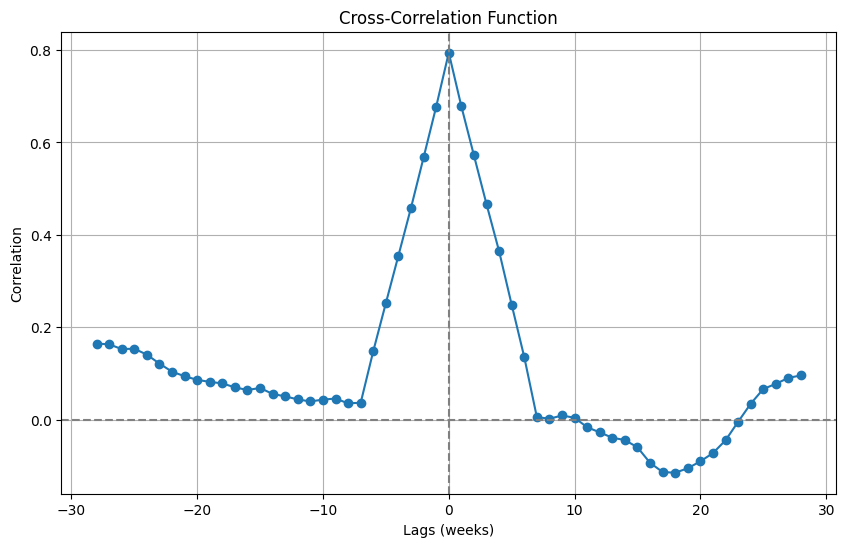

In [116]:
cross_correlate(BTC_7d_Price_Change, ETH_7d_Price_Change, max_lag=28, interval='weeks')

<a id="lead-lag-corr-price-1w-28w-BTC-SOL"></a>
### 9.5.2 Cross-correlation: BTC v SOL 1 Week Price Change, Lag Range 28 Weeks

In [117]:
check_correlation_significance(BTC_7d_Price_Change, SOL_7d_Price_Change)

Correlation Coefficient: 0.4620332759492447
P-value: 3.8969082819751716e-72
The correlation is statistically significant.


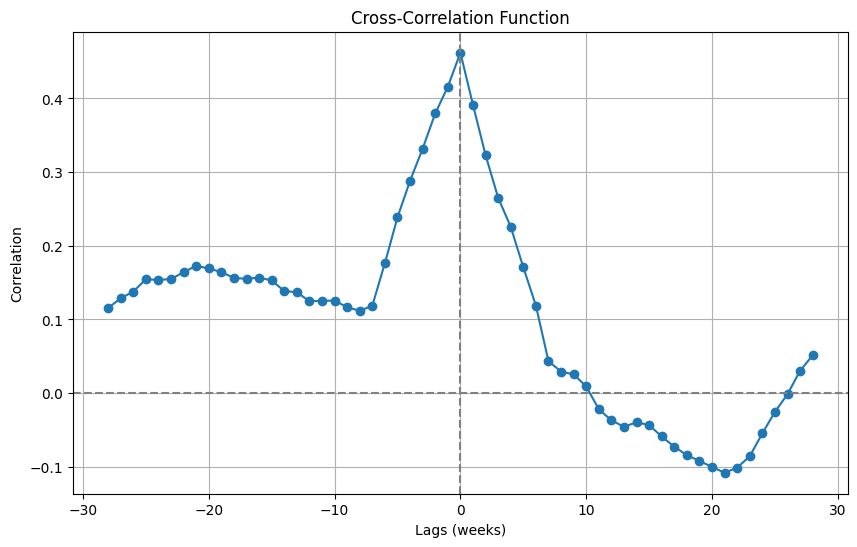

In [118]:
cross_correlate(BTC_7d_Price_Change, SOL_7d_Price_Change, max_lag=28, interval='weeks')

<a id="lead-lag-corr-price-1w-28w-ETH-SOL"></a>
### 9.5.3 Cross-correlation: ETH v SOL 1 Week Price Change, Lag Range 28 Weeks

In [119]:
check_correlation_significance(ETH_7d_Price_Change, SOL_7d_Price_Change)

Correlation Coefficient: 0.5478852534710525
P-value: 2.690156715293596e-106
The correlation is statistically significant.


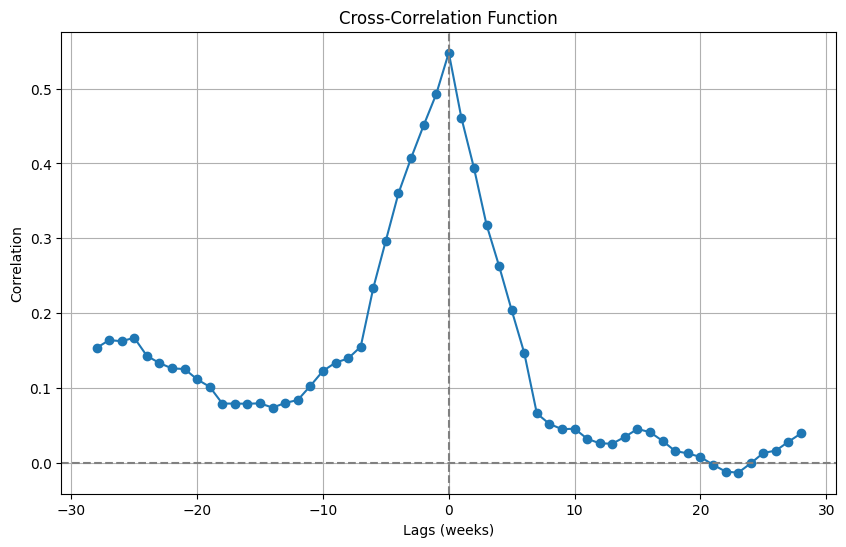

In [120]:
cross_correlate(ETH_7d_Price_Change, SOL_7d_Price_Change, max_lag=28, interval='weeks')

<a id="lead-lag-corr-vusd-1w-28w-BTC-ETH"></a>
### 9.5.4 Cross-correlation: BTC v ETH 1 Week vUSD Change, Lag Range 28 Weeks

In [121]:
check_correlation_significance(ETH_7d_vUSD_Change, SOL_7d_vUSD_Change)

Correlation Coefficient: 0.2864557781573211
P-value: 7.7491194063192e-27
The correlation is statistically significant.


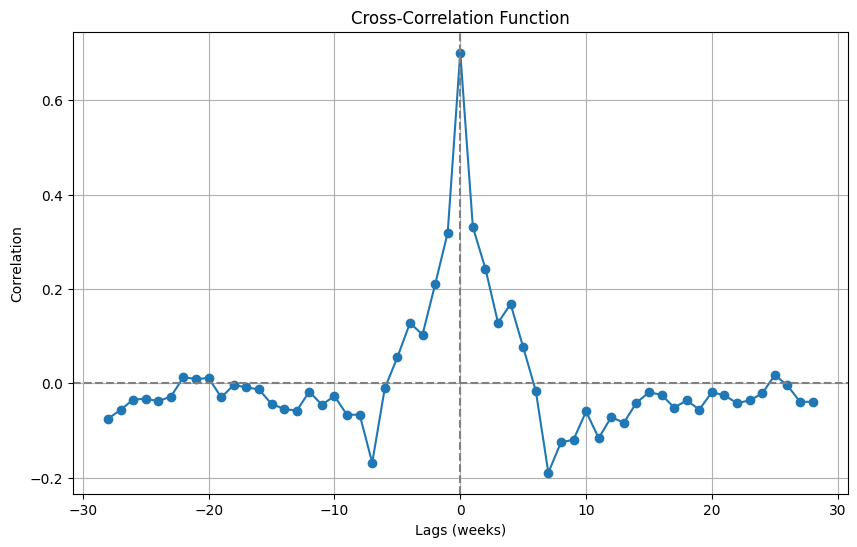

In [122]:
cross_correlate(BTC_7d_vUSD_Change, ETH_7d_vUSD_Change, max_lag=28, interval='weeks')

<a id="lead-lag-corr-vusd-1w-28w-BTC-SOL"></a>
### 9.5.6 Cross-correlation: BTC v SOL 1 Week vUSD Change, Lag Range 28 Weeks

In [123]:
check_correlation_significance(BTC_7d_vUSD_Change, SOL_7d_vUSD_Change)

Correlation Coefficient: 0.3511615956659094
P-value: 2.4040799380894154e-40
The correlation is statistically significant.


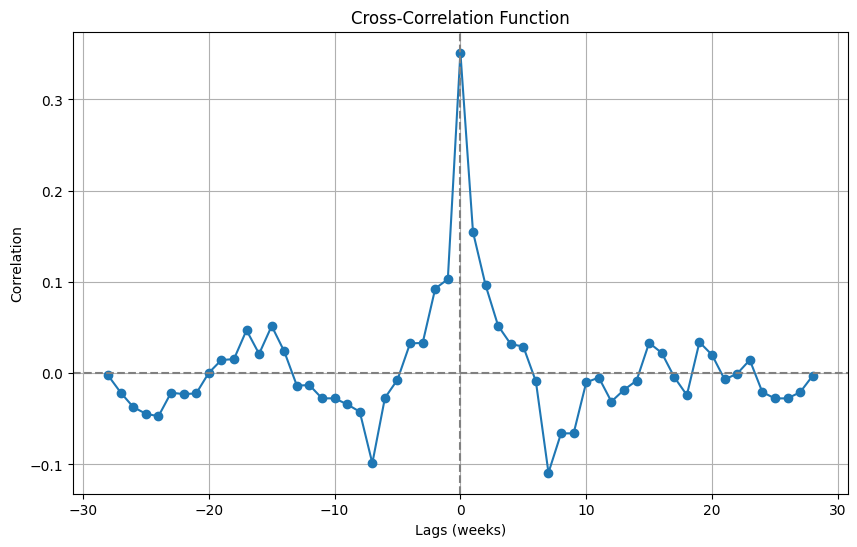

In [124]:
cross_correlate(BTC_7d_vUSD_Change, SOL_7d_vUSD_Change, max_lag=28, interval='weeks')

<a id="lead-lag-corr-vusd-1w-28w-ETH-SOL"></a>
### 9.5.7 Cross-correlation: ETH v SOL 1 Week vUSD Change, Lag Range 28 Weeks

In [125]:
check_correlation_significance(BTC_7d_vUSD_Change, SOL_7d_vUSD_Change)

Correlation Coefficient: 0.3511615956659094
P-value: 2.4040799380894154e-40
The correlation is statistically significant.


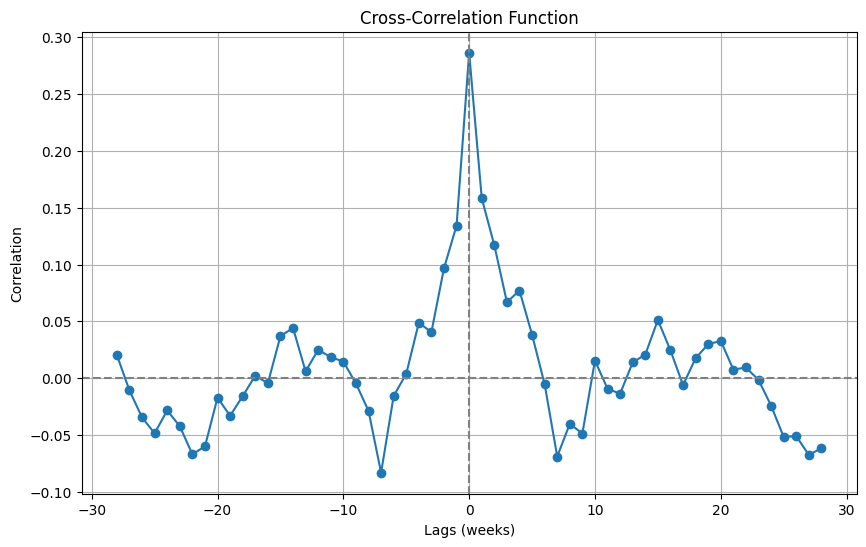

In [126]:
cross_correlate(ETH_7d_vUSD_Change, SOL_7d_vUSD_Change, max_lag=28, interval='weeks')

<a id="lead-lag-corr-1w-28w-reflections"></a>
### 9.5.8 Cross Correlation: 28 Week Reflections
- P-scores and correlation coefficients mirrored those in previous measurements, with those of the Bitcoin-Ethereum price changes being the strongest.
- Bitcoin-Ethereum lead-lag symmetry exists between lags of -8 and 8 weeks, suggesting that price changes of either one could precede that of the other.
- Similar shapes in the other measures are clearly similar, with all seeing a linear slope starting at lags -8/8, converging at 0.
- The tails beyond those 8 week intervals display fluctuations of insignifcant magnitude and no clear patterns

<a id="granger-causality-tests"></a>
# 10. Granger Causality Tests
**While lead-lag analysis identifies temporal relationships, it doesn't imply causation. Granger Causality tests go a step further to assess if past values of one variable (say, Bitcoin's price) have a statistically significant effect on predicting future values of another (like Ethereum's price)**

<a id="granger-causality-fx"></a>
## 10.1 Granger Causality Function

In [127]:
def perform_granger_causality_test(coin_measure_1, coin_measure_2, max_lag, interval='days'):
    """
    Performs the Granger Causality test on two time series data and returns p-values for each lag.

    Parameters:
    coin_measure_1 (pd.Series): The first time series data.
    coin_measure_2 (pd.Series): The second time series data.
    max_lag (int): The maximum number of lags to use for the Granger Causality test.
    interval (str): The time interval of the data ('hours', 'days', 'weeks'). Default is 'days'.

    Returns:
    dict: A dictionary where keys are lag numbers and values are p-values for each lag.
    """
    df = pd.concat([coin_measure_1, coin_measure_2], axis=1)
    p_values = {}
    for lag in range(1, max_lag + 1):
        test_result = grangercausalitytests(df, lag, verbose=False)
        p_values[lag] = test_result[lag][0]['ssr_ftest'][1]  # Extracting the p-value
    return p_values


In [128]:
def plot_granger_causality_p_values(p_values, threshold=0.05):
    """
    Plots the p-values from the Granger Causality test against a significance threshold.

    Parameters:
    p_values (dict): A dictionary with lag numbers as keys and p-values as values.
    threshold (float): The significance threshold to be plotted. Default is 0.05.

    Returns:
    None: This function plots the graph but does not return any value.
    """
    plt.figure(figsize=(10, 6))
    lags = list(p_values.keys())
    p_vals = list(p_values.values())

    plt.plot(lags, p_vals, marker='o', color='b', label='P-Values')
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Significance Threshold ({threshold})')

    plt.title('Granger Causality Test P-Values')
    plt.xlabel('Lag')
    plt.ylabel('P-Value')
    plt.legend()
    plt.grid(True)
    plt.show()




<a id="granger-tests-1h"></a>
## 10.2 Granger Causality Tests: 1 Hour Intervals

In [129]:
# Hourly Price Changes
BTC_1h_Price_Change = hourly_changes['BTC_1h%']
ETH_1h_Price_Change = hourly_changes['ETH_1h%']
SOL_1h_Price_Change = hourly_changes['SOL_1h%']
# Hourly Volume Changes
BTC_1h_vUSD_Change = hourly_changes['BTC_1h_vUSD%']
ETH_1h_vUSD_Change = hourly_changes['ETH_1h_vUSD%']
SOL_1h_vUSD_Change = hourly_changes['SOL_1h_vUSD%']
# 1 Day Price Changes
BTC_1d_Price_Change = daily_weekly_changes['BTC_24h%']
ETH_1d_Price_Change = daily_weekly_changes['ETH_24h%']
SOL_1d_Price_Change = daily_weekly_changes['SOL_24h%']
# 1 Day Volume Changes
BTC_1d_vUSD_Change = daily_weekly_changes['BTC_vUSD_24h%']
ETH_1d_vUSD_Change = daily_weekly_changes['ETH_vUSD_24h%']
SOL_1d_vUSD_Change = daily_weekly_changes['SOL_vUSD_24h%']
# 7 Day Price Changes
BTC_7d_Price_Change = daily_weekly_changes['BTC_7d%']
ETH_7d_Price_Change = daily_weekly_changes['ETH_7d%']
SOL_7d_Price_Change = daily_weekly_changes['SOL_7d%']
# 7 Day Volume Changes
BTC_7d_vUSD_Change = daily_weekly_changes['BTC_vUSD_7d%']
ETH_7d_vUSD_Change = daily_weekly_changes['ETH_vUSD_7d%']
SOL_7d_vUSD_Change = daily_weekly_changes['SOL_vUSD_7d%']# Hourly Price Changes
BTC_1h_Price_Change = hourly_changes['BTC_1h%']
ETH_1h_Price_Change = hourly_changes['ETH_1h%']
SOL_1h_Price_Change = hourly_changes['SOL_1h%']
# Hourly Volume Changes
BTC_1h_vUSD_Change = hourly_changes['BTC_1h_vUSD%']
ETH_1h_vUSD_Change = hourly_changes['ETH_1h_vUSD%']
SOL_1h_vUSD_Change = hourly_changes['SOL_1h_vUSD%']
# 1 Day Price Changes
BTC_1d_Price_Change = daily_weekly_changes['BTC_24h%']
ETH_1d_Price_Change = daily_weekly_changes['ETH_24h%']
SOL_1d_Price_Change = daily_weekly_changes['SOL_24h%']
# 1 Day Volume Changes
BTC_1d_vUSD_Change = daily_weekly_changes['BTC_vUSD_24h%']
ETH_1d_vUSD_Change = daily_weekly_changes['ETH_vUSD_24h%']
SOL_1d_vUSD_Change = daily_weekly_changes['SOL_vUSD_24h%']
# 7 Day Price Changes
BTC_7d_Price_Change = daily_weekly_changes['BTC_7d%']
ETH_7d_Price_Change = daily_weekly_changes['ETH_7d%']
SOL_7d_Price_Change = daily_weekly_changes['SOL_7d%']
# 7 Day Volume Changes
BTC_7d_vUSD_Change = daily_weekly_changes['BTC_vUSD_7d%']
ETH_7d_vUSD_Change = daily_weekly_changes['ETH_vUSD_7d%']
SOL_7d_vUSD_Change = daily_weekly_changes['SOL_vUSD_7d%']

<a id="granger-tests-1h-btc-eth"></a>
### 10.2.1 Granger Causality Test: BTC v ETH 1 Hour Price Change

In [130]:
BTC_ETH_1h_price_change = perform_granger_causality_test(BTC_1h_Price_Change, ETH_1h_Price_Change, 24, interval='hours')
BTC_ETH_1h_price_change

/home/boss_andre/anaconda3/envs/JupyterEnv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: 0.30379612243774906,
 2: 0.02146633505674029,
 3: 0.02128773509470164,
 4: 0.04554455816440529,
 5: 0.06958054801634682,
 6: 0.11494527024841673,
 7: 0.14026938328993868,
 8: 0.18743955079697708,
 9: 0.24434424932208962,
 10: 0.26136935577357673,
 11: 0.3311987117144025,
 12: 0.39261217665016707,
 13: 0.3850729679443571,
 14: 0.45966251753619014,
 15: 0.28995917236017993,
 16: 0.3486298469723225,
 17: 0.33569229811788803,
 18: 0.36664664773001177,
 19: 0.42663462679657704,
 20: 0.48134593828745675,
 21: 0.5262967723942051,
 22: 0.409438245362584,
 23: 0.46700610203770465,
 24: 0.3560686878799021}

<a id="granger-tests-1h-price-btc-to-eth"></a>
#### 10.2.1.1 Granger Causality Test: BTC -> ETH 1-Hour Price Change**

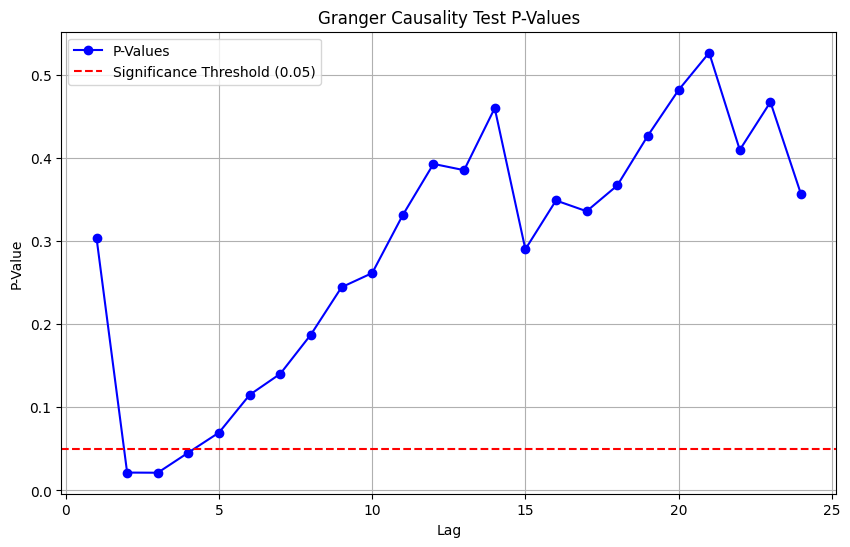

In [131]:
plot_granger_causality_p_values(BTC_ETH_1h_price_change, threshold=0.05)

In [132]:
ETH_BTC_1h_price_change = perform_granger_causality_test(ETH_1h_Price_Change, BTC_1h_Price_Change, 24, interval='hours')
ETH_BTC_1h_price_change

{1: 0.5171652926527988,
 2: 0.2134155559312421,
 3: 0.21643162242194328,
 4: 0.3474421752346258,
 5: 0.45375401925024483,
 6: 0.3896882849723579,
 7: 0.3960033319650146,
 8: 0.4304763479203011,
 9: 0.5308733365139735,
 10: 0.5184720235441282,
 11: 0.5743792530915919,
 12: 0.6526021762387181,
 13: 0.6389647726622235,
 14: 0.7138873932866918,
 15: 0.6791027536504357,
 16: 0.7088103717821579,
 17: 0.7679527802768029,
 18: 0.7998547894429694,
 19: 0.845063542800612,
 20: 0.8740091364074352,
 21: 0.8677568301372443,
 22: 0.7743560284097264,
 23: 0.8153848977930007,
 24: 0.8604823034335827}

<a id="granger-tests-1h-price-eth-to-btc"></a>
#### 10.2.1.2 Granger Causality Test: ETH -> BTC 1-Hour Price Change**

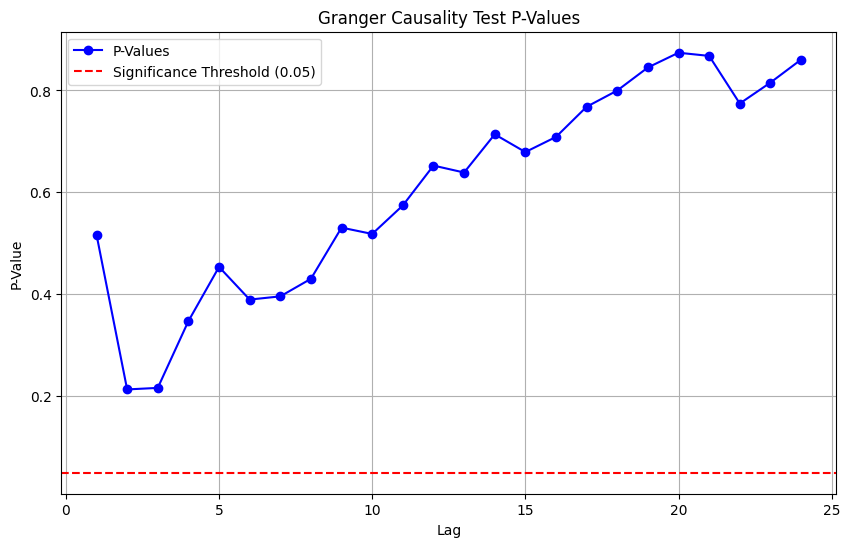

In [133]:
plot_granger_causality_p_values(ETH_BTC_1h_price_change, threshold=0.05)

<a id="granger-tests-1h-btc-sol"></a>
### 10.2.2 Granger Causality Test: BTC v SOL 1 Hour Price Change

In [134]:
BTC_SOL_1h_price_change = perform_granger_causality_test(BTC_1h_Price_Change, SOL_1h_Price_Change, 24, interval='hours')
BTC_SOL_1h_price_change

{1: 0.41481251094477267,
 2: 0.721117454012022,
 3: 0.8474760745687671,
 4: 0.935258904784184,
 5: 0.9531381184561636,
 6: 0.8454772556642539,
 7: 0.9113106901870818,
 8: 0.9212541812563639,
 9: 0.822880549465282,
 10: 0.8737016592441855,
 11: 0.9143724060339893,
 12: 0.9051941652030753,
 13: 0.9373848564881165,
 14: 0.9584256228449133,
 15: 0.9716561493273138,
 16: 0.8035939627923955,
 17: 0.5818988101467744,
 18: 0.6478691835585482,
 19: 0.5239874045560015,
 20: 0.587359658717185,
 21: 0.651858993460662,
 22: 0.7054522941107814,
 23: 0.6554862697976084,
 24: 0.6972098511993352}

<a id="granger-tests-1h-price-btc-to-sol"></a>
#### 10.2.2.1 Granger Causality Test: BTC -> SOL 1-Hour Price Change

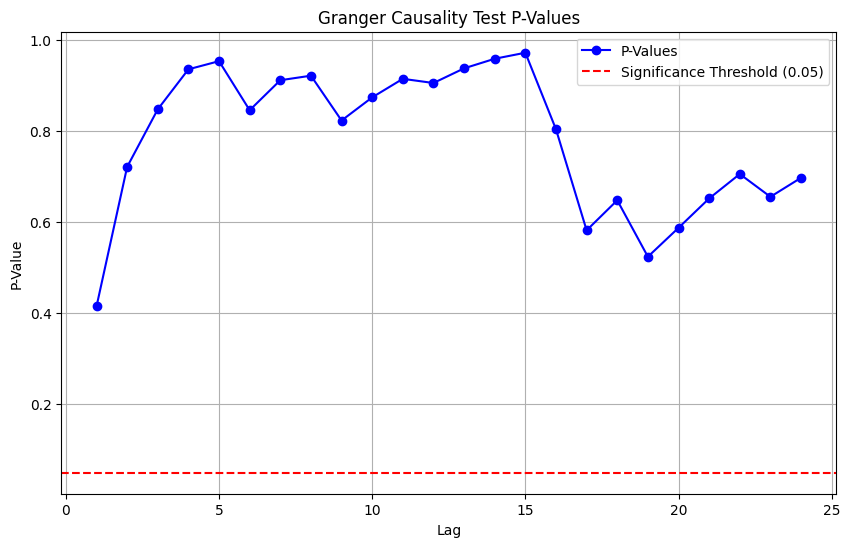

In [135]:
plot_granger_causality_p_values(BTC_SOL_1h_price_change, threshold=0.05)

In [136]:
SOL_BTC_1h_price_change = perform_granger_causality_test(SOL_1h_Price_Change, BTC_1h_Price_Change, 24, interval='hours')
SOL_BTC_1h_price_change

{1: 0.1393185986383265,
 2: 0.3197429434939696,
 3: 0.5189178461838743,
 4: 0.6847465976771264,
 5: 0.7681508136841709,
 6: 0.8592288676844316,
 7: 0.917156536731194,
 8: 0.8811734701538092,
 9: 0.8316625076090558,
 10: 0.874282829046584,
 11: 0.9170473739300399,
 12: 0.9473427999481229,
 13: 0.9669852824706205,
 14: 0.9494952352047793,
 15: 0.9642951225011672,
 16: 0.8965134122487847,
 17: 0.693123691843416,
 18: 0.49800528916448483,
 19: 0.5650037631084484,
 20: 0.625289464173456,
 21: 0.683562449684065,
 22: 0.6662538132320925,
 23: 0.662261444478774,
 24: 0.6982573052980237}

<a id="granger-tests-1h-price-sol-to-btc"></a>
#### 10.2.2.2 Granger Causality Test: SOL -> BTC 1-Hour Price Change

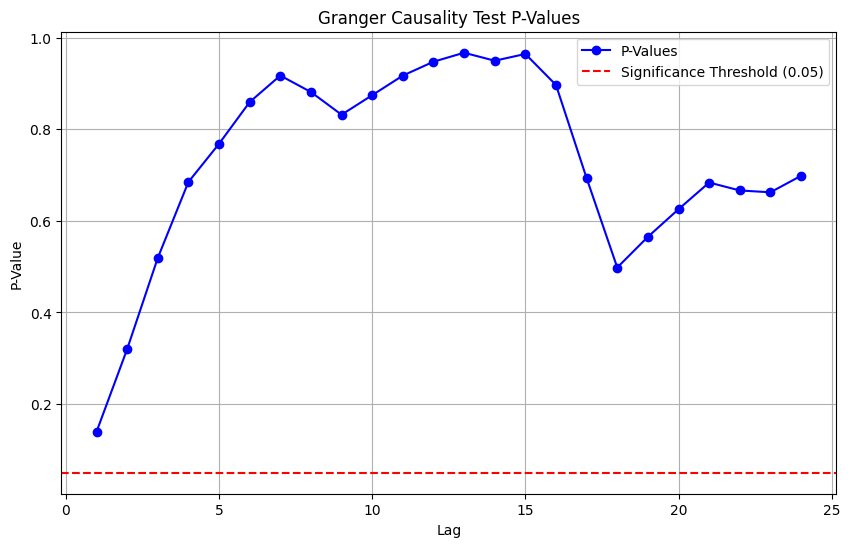

In [137]:
plot_granger_causality_p_values(SOL_BTC_1h_price_change, threshold=0.05)

<a id="granger-tests-1h-eth-sol"></a>
### 10.2.3 Granger Causality Test: ETH v SOL 1 Hour Price Change

In [138]:
ETH_SOL_1h_price_change = perform_granger_causality_test(ETH_1h_Price_Change, SOL_1h_Price_Change, 24, interval='hours')
ETH_SOL_1h_price_change

{1: 0.8435232426363316,
 2: 0.12401795980293107,
 3: 0.044672775603062674,
 4: 0.06946599855513906,
 5: 0.12054730405180963,
 6: 0.07307209592730479,
 7: 0.10853526490218289,
 8: 0.14632405607489626,
 9: 0.09501904579202736,
 10: 0.1373238169083021,
 11: 0.16763495530788214,
 12: 0.17722205778376518,
 13: 0.21084093974253115,
 14: 0.2672048554704049,
 15: 0.3327572691002883,
 16: 0.056007856385974705,
 17: 0.014137126935242463,
 18: 0.01667120369858701,
 19: 0.007581442111982033,
 20: 0.010797039555759322,
 21: 0.016301661492145923,
 22: 0.02183325705325663,
 23: 0.012689142768234206,
 24: 0.016559949281251783}

<a id="granger-tests-1h-price-eth-to-sol"></a>
#### 10.2.3.1 Granger Causality Test: ETH -> SOL 1-Hour Price Change**

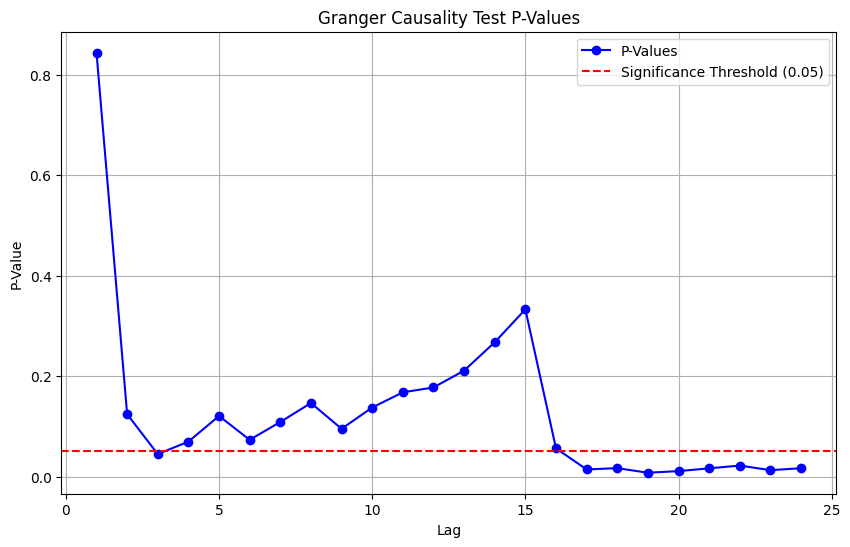

In [139]:
plot_granger_causality_p_values(ETH_SOL_1h_price_change, threshold=0.05)

In [140]:
SOL_ETH_1h_price_change = perform_granger_causality_test(SOL_1h_Price_Change, ETH_1h_Price_Change, 24, interval='hours')
SOL_ETH_1h_price_change

{1: 0.005943894434038468,
 2: 0.002540854070082566,
 3: 0.00710443165227766,
 4: 0.014705680460664497,
 5: 0.029418890851872284,
 6: 0.05313462230844033,
 7: 0.0409169944152105,
 8: 0.06568074666396452,
 9: 0.05066098570736034,
 10: 0.07120385138052798,
 11: 0.0963313877315963,
 12: 0.1336731423208289,
 13: 0.1788707956439374,
 14: 0.11633685564407814,
 15: 0.15543581633918452,
 16: 0.1068619888198965,
 17: 0.03498675662589725,
 18: 0.03815088410757021,
 19: 0.052192873960762776,
 20: 0.06585226095835912,
 21: 0.09062375172691604,
 22: 0.11512917180291875,
 23: 0.10121596975582674,
 24: 0.10201638430490483}

<a id="granger-tests-1h-price-sol-to-eth"></a>
#### 10.2.3.2 Granger Causality Test: SOL -> ETH 1-Hour Price Change

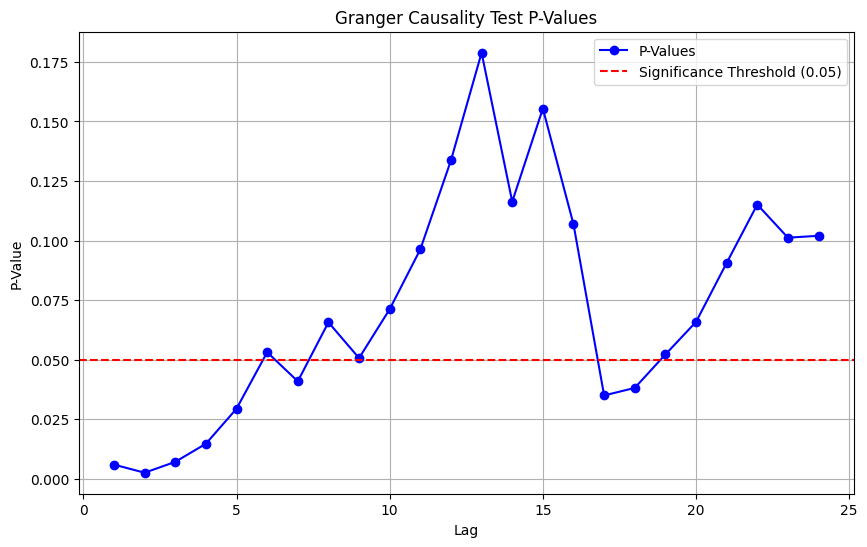

In [141]:
plot_granger_causality_p_values(SOL_ETH_1h_price_change, threshold=0.05)

<a id="granger-tests-1h-vusd-btc-eth"></a>
### 10.2.4 Granger Causality Test: BTC v ETH 1 Hour Trade Volume Change

In [142]:
BTC_ETH_1h_vUSD_change = perform_granger_causality_test(BTC_1h_vUSD_Change, ETH_1h_vUSD_Change, 24, interval='hours')
BTC_ETH_1h_vUSD_change

{1: 0.0004867215616653806,
 2: 2.626967064145367e-05,
 3: 3.155668362034663e-05,
 4: 1.590714881344792e-05,
 5: 3.47565118706492e-05,
 6: 3.076886708120198e-05,
 7: 6.954301203649331e-05,
 8: 0.00013071750115680315,
 9: 0.00020346530997445157,
 10: 0.0003016183269588938,
 11: 0.0002820231938032681,
 12: 0.00039444396446800645,
 13: 0.0006815355756730947,
 14: 0.0011268683264978442,
 15: 0.0011363605296497643,
 16: 0.0007306099778709715,
 17: 0.0010018236694435178,
 18: 0.0012846076934631024,
 19: 0.001362903279983842,
 20: 9.095297171472407e-09,
 21: 1.779852623020644e-08,
 22: 3.421419379339201e-08,
 23: 1.5122965978978395e-11,
 24: 2.420962555692684e-12}

<a id="granger-tests-1h-vusd-btc-to-eth"></a>
#### 10.2.4.1 Granger Causality Test: BTC -> ETH 1-Hour Trade Volume Change

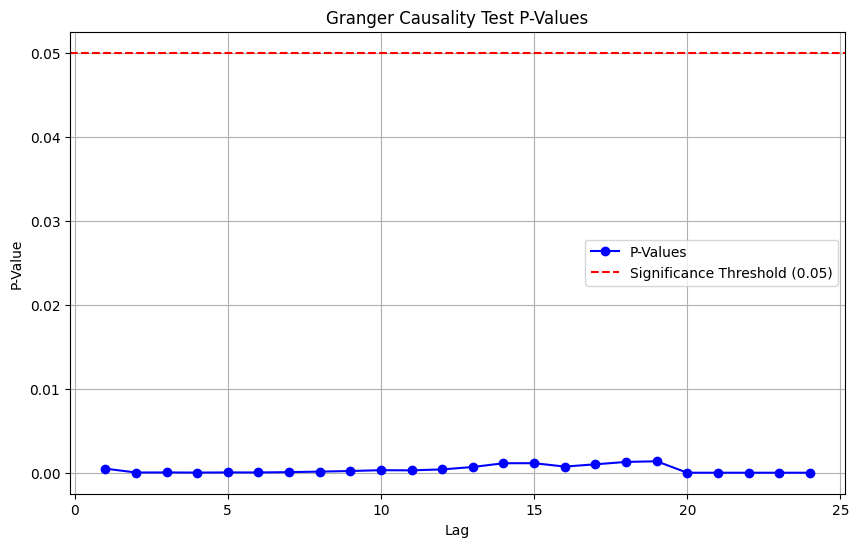

In [143]:
plot_granger_causality_p_values(BTC_ETH_1h_vUSD_change, threshold=0.05)

In [144]:
ETH_BTC_1h_vUSD_change = perform_granger_causality_test(ETH_1h_vUSD_Change, BTC_1h_vUSD_Change, 24, interval='hours')
ETH_BTC_1h_vUSD_change

{1: 0.446474731159612,
 2: 0.17004261027029516,
 3: 0.35295877989800317,
 4: 0.5259420068660445,
 5: 0.6567309717046864,
 6: 0.7585196004763223,
 7: 0.7780631339575468,
 8: 0.7041212225867445,
 9: 0.6448182536537339,
 10: 0.645845867688622,
 11: 0.674292711191665,
 12: 0.5958438404163819,
 13: 0.5601251747833529,
 14: 0.6357079097810756,
 15: 0.693865748782359,
 16: 0.7590120726998075,
 17: 0.8099600733840907,
 18: 0.4093286392039933,
 19: 0.4525034245124268,
 20: 0.46921891211931666,
 21: 0.5225721709888784,
 22: 0.5760168491010944,
 23: 0.5176449018194664,
 24: 0.5287931719134575}

<a id="granger-tests-1h-vusd-eth-to-btc"></a>
#### 10.2.4.2 Granger Causality Test: ETH -> BTC 1-Hour Trade Volume Change**

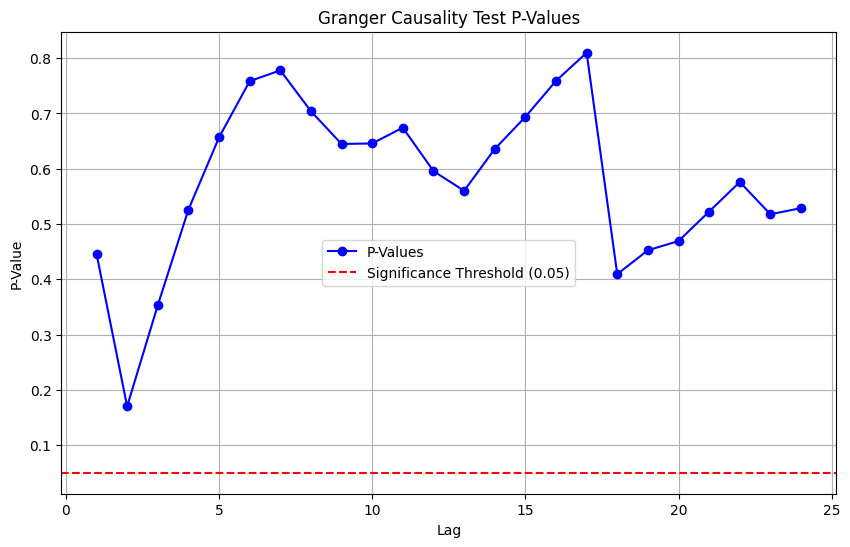

In [145]:
plot_granger_causality_p_values(ETH_BTC_1h_vUSD_change, threshold=0.05)

<a id="granger-tests-1h-vusd-btc-sol"></a>
### 10.2.5 Granger Causality Test: BTC v SOL 1 Hour Trade Volume Change

In [146]:
BTC_SOL_1h_vUSD_change = perform_granger_causality_test(BTC_1h_vUSD_Change, SOL_1h_vUSD_Change, 24, interval='hours')
BTC_SOL_1h_vUSD_change

{1: 0.34655548833005256,
 2: 0.5429328166075507,
 3: 0.6632601962436454,
 4: 0.8103130310268221,
 5: 0.902434928407284,
 6: 0.9437401633492492,
 7: 0.9652125836473564,
 8: 0.9829424036283465,
 9: 0.9920964140602916,
 10: 0.9508649374987793,
 11: 0.9705261865859018,
 12: 0.7916995696642863,
 13: 0.8318752844329658,
 14: 0.8728407305105411,
 15: 0.8959519850844864,
 16: 0.9235280698163048,
 17: 0.9466156285681544,
 18: 0.9637766524815334,
 19: 0.9750555282857878,
 20: 0.8236348536271809,
 21: 0.8400242077362619,
 22: 0.8764789055075908,
 23: 0.8821026694070244,
 24: 0.8710259045458303}

<a id="granger-tests-1h-vusd-btc-to-sol"></a>
#### 10.2.5.1 Granger Causality Test: BTC -> SOL 1-Hour Trade Volume Change

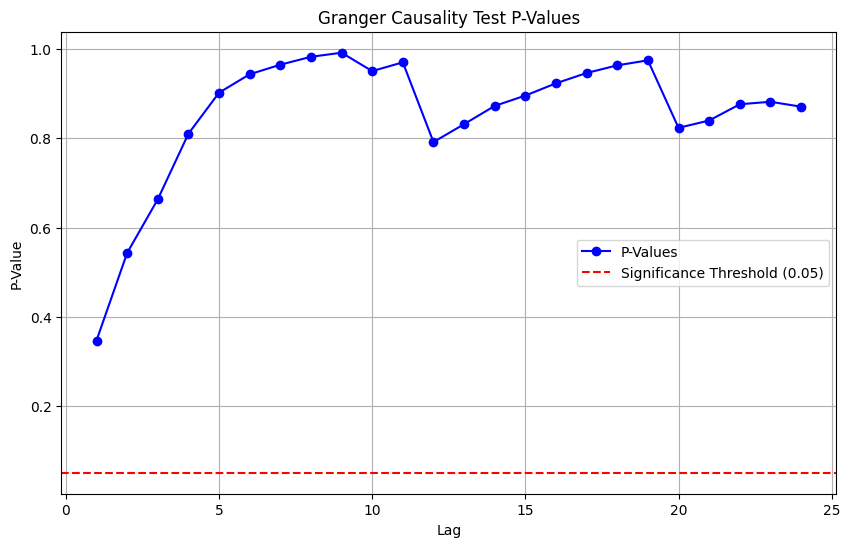

In [147]:
plot_granger_causality_p_values(BTC_SOL_1h_vUSD_change, threshold=0.05)

In [148]:
SOL_BTC_1h_vUSD_change = perform_granger_causality_test(SOL_1h_vUSD_Change, BTC_1h_vUSD_Change, 24, interval='hours')
SOL_BTC_1h_vUSD_change

{1: 0.09299443026551164,
 2: 0.2481287586027852,
 3: 0.43432082615866574,
 4: 0.5040881448006658,
 5: 0.633543873227983,
 6: 0.7385366243598653,
 7: 0.7920010076701476,
 8: 0.8569469878212609,
 9: 0.8770661835683533,
 10: 0.9239039689145323,
 11: 0.9397401990339519,
 12: 0.967886120469455,
 13: 0.9777653071473953,
 14: 0.9852996138582385,
 15: 0.9921665597029969,
 16: 0.9958461942192711,
 17: 0.9969872473756289,
 18: 0.9890548003021491,
 19: 0.9903831842998324,
 20: 0.9938191069093276,
 21: 0.9935806771174519,
 22: 0.9963912676652934,
 23: 0.9970666900672719,
 24: 0.9971162383462161}

<a id="granger-tests-1h-vusd-sol-to-btc"></a>
#### 10.2.5.2 Granger Causality Test: SOL -> BTC 1-Hour Trade Volume Change

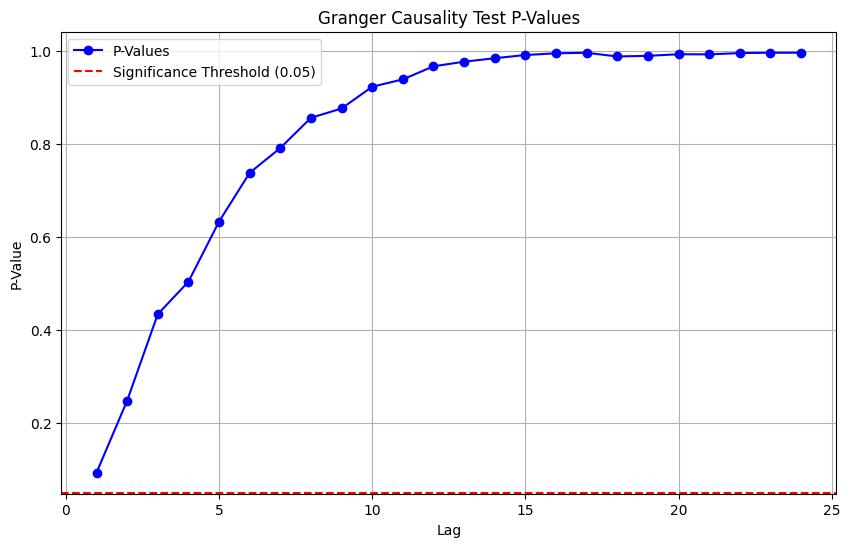

In [149]:
plot_granger_causality_p_values(SOL_BTC_1h_vUSD_change, threshold=0.05)

<a id="granger-tests-1h-vusd-eth-sol"></a>
### 10.2.6 Granger Causality Test: ETH v SOL 1 Hour Trade Volume Change

In [150]:
ETH_SOL_1h_vUSD_change = perform_granger_causality_test(ETH_1h_vUSD_Change, SOL_1h_vUSD_Change, 24, interval='hours')
ETH_SOL_1h_vUSD_change

{1: 0.45822866138000173,
 2: 0.646506257729202,
 3: 0.5943981309396313,
 4: 0.7905878331969854,
 5: 0.7285330230805895,
 6: 0.8152670979301104,
 7: 0.8677182207566392,
 8: 0.8960897608461239,
 9: 0.8397488574939223,
 10: 0.7414674974697975,
 11: 0.8174374094435556,
 12: 0.8568437145408884,
 13: 0.8964319118043779,
 14: 0.8873567823416104,
 15: 0.924602502825162,
 16: 0.8871035449752035,
 17: 0.8035519355472883,
 18: 0.8486517150532339,
 19: 0.8854567623490828,
 20: 8.839788586847706e-30,
 21: 1.5994274252555564e-30,
 22: 4.9716360380987384e-30,
 23: 1.2398951881224367e-29,
 24: 5.839927536852731e-29}

<a id="granger-tests-1h-vusd-eth-to-sol"></a>
#### 10.2.6.1 Granger Causality Test: ETH -> SOL 1-Hour Trade Volume Change

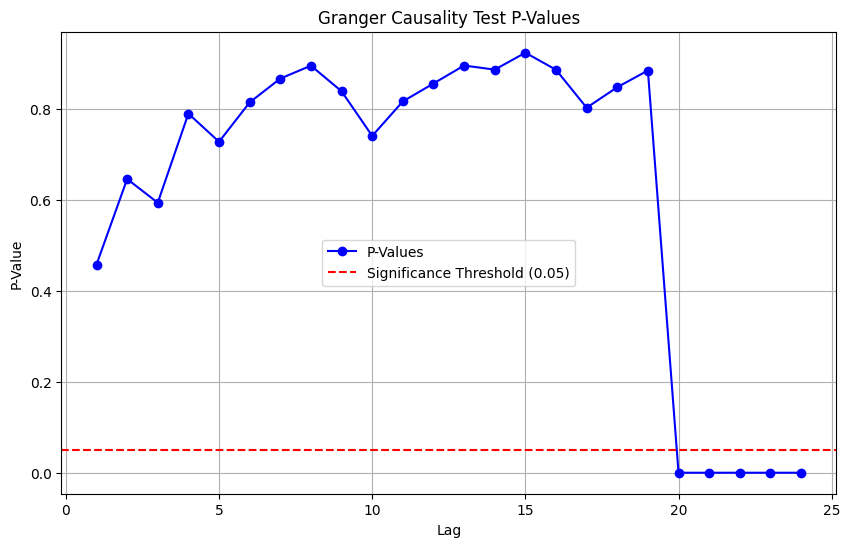

In [151]:
plot_granger_causality_p_values(ETH_SOL_1h_vUSD_change, threshold=0.05)

In [152]:
SOL_ETH_1h_vUSD_change = perform_granger_causality_test(SOL_1h_vUSD_Change, ETH_1h_vUSD_Change, 24, interval='hours')
SOL_ETH_1h_vUSD_change

{1: 0.3252655186401644,
 2: 0.015436304185323154,
 3: 5.397492323682596e-05,
 4: 0.00021931173413043017,
 5: 0.0007541018096380621,
 6: 0.000347602161374848,
 7: 0.00014143350206689194,
 8: 0.00037770923379934067,
 9: 0.0008245014878220245,
 10: 0.0008786982285124206,
 11: 0.0014944257800136678,
 12: 0.001124257174885482,
 13: 0.0016314835663242791,
 14: 0.0007896992514652257,
 15: 0.0014045144506891786,
 16: 0.0022525938962053346,
 17: 0.002638898150425959,
 18: 0.0042578017017929895,
 19: 0.00436384445613772,
 20: 0.004236114666373534,
 21: 0.003726400594668051,
 22: 0.0010053336149755093,
 23: 0.0009853899360091041,
 24: 0.0007393841399336644}

<a id="granger-tests-1h-vusd-sol-to-eth"></a>
#### 10.2.6.2 Granger Causality Test: SOL -> ETH 1-Hour Trade Volume Change

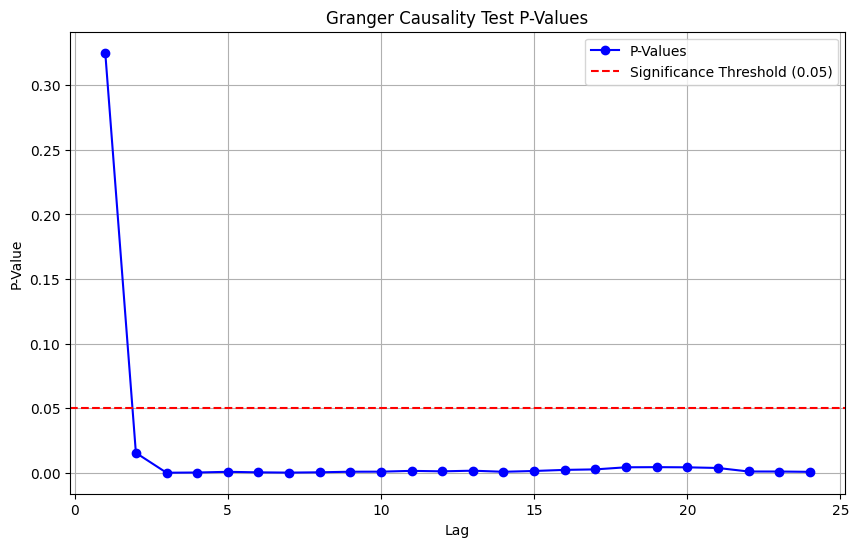

In [153]:
plot_granger_causality_p_values(SOL_ETH_1h_vUSD_change, threshold=0.05)

<a id="granger-tests-1h-reflections"></a>
### 10.2.7 Granger Causality Tests: 1 Hour Interval Reflections
**With a p-value of 0.05 set as the threshold of significance, the following were identified as possessing predictive relevance:**
- BTC/ETH Price Change at lag 2 hours and 3 hours
- BTC/ETH Trade Volume Change exhibited strong Granger causality across the entire 24 hours.  However, the inverse is not true.  This suggests that when bullish purchase behavior begins with BTC, that the trand then follows with ETH.
- ETH/SOL Price Change showed strong causality from lag 16 to 24, while SOL/ETH showed intermittant causality at lags 1-5 and 17-18.
- ETH/SOL Trade Volume Change showed strong relevance from lag 20 to 24.  However, SOL/ETH showed strong causality from hour 2 to 24.  T
- The sudden emergence of ostensible causality in the ETH/SOL pair late in the 24 hour cycle, both in terms of price change and trade volume change, warrants further investigation
- The evidence for SOL to ETH causality in trade volume movement is of particular interest.  We saw no evidence of causation betweeen BTC and SOL, either in price change or trade volume.  ETH did, however, show intermittent signs of causal effect upon SOL price, but no more than SOL did upon ETH.  However, across the 24 hour interval there is strong evidence that SOL trade volume fluctuations effect ETH fluctuations.  This was so surprising, in fact, that SOL/ETH scatterplots were revisited below the SOL -> ETH Granger tests. The corresponding scatterplot shows broad variability

<a id="granger-tests-1d"></a>
## 10.3 Granger Causality Tests: 1 Day Intervals

<a id="granger-tests-1d-price-btc-eth"></a>
### 10.3.1 Granger Causality Test: BTC v ETH, 1 Day Price Change

In [154]:
BTC_ETH_1d_price_change = perform_granger_causality_test(BTC_1d_Price_Change, ETH_1d_Price_Change, 7, interval='days')
BTC_ETH_1d_price_change

{1: 0.0032494448864181444,
 2: 0.006861750246090223,
 3: 0.015965128576987286,
 4: 0.011728765947896895,
 5: 0.0026835408515608057,
 6: 0.00024480335539674175,
 7: 4.9362439979700404e-05}

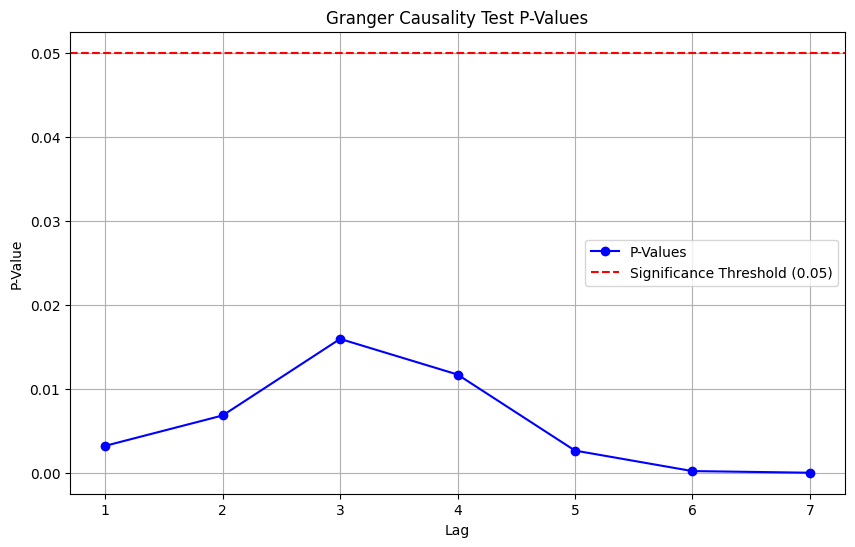

In [155]:
plot_granger_causality_p_values(BTC_ETH_1d_price_change, threshold=0.05)

In [156]:
ETH_BTC_1d_price_change = perform_granger_causality_test(ETH_1d_Price_Change, BTC_1d_Price_Change, 7, interval='days')
ETH_BTC_1d_price_change

{1: 0.2041461609831681,
 2: 0.2124277160380936,
 3: 0.2537614844637485,
 4: 0.3448609718286055,
 5: 0.039886823022969406,
 6: 0.0006914851446150773,
 7: 0.0013832669955771116}

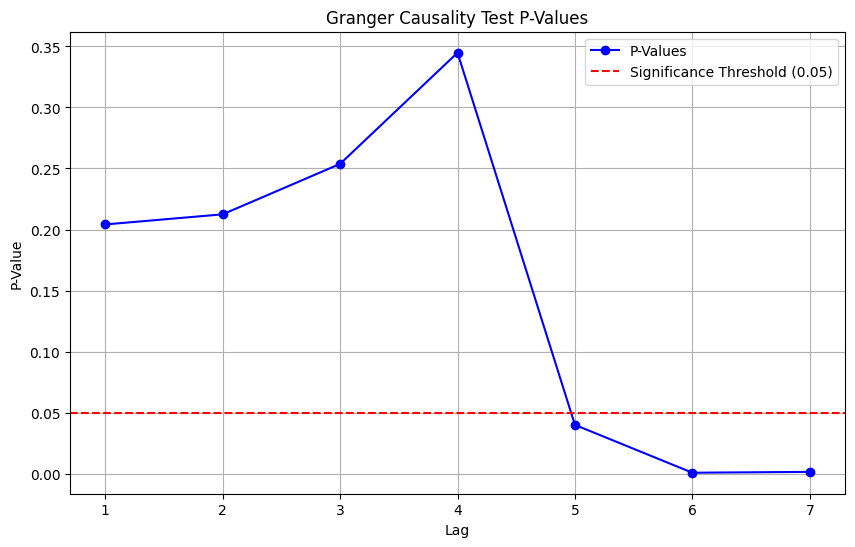

In [157]:
plot_granger_causality_p_values(ETH_BTC_1d_price_change, threshold=0.05)

<a id="granger-tests-1d-price-btc-sol"></a>
### 10.3.2 Granger Causality Test: BTC v SOL, 1 Day Price Change

In [158]:
BTC_SOL_1d_price_change = perform_granger_causality_test(BTC_1d_Price_Change, SOL_1d_Price_Change, 7, interval='days')
BTC_SOL_1d_price_change

{1: 0.1289276494213458,
 2: 0.28466944762847485,
 3: 0.0068680936576001736,
 4: 0.00875172501949832,
 5: 0.013375832441776713,
 6: 0.0024524429910345725,
 7: 0.004545745303017876}

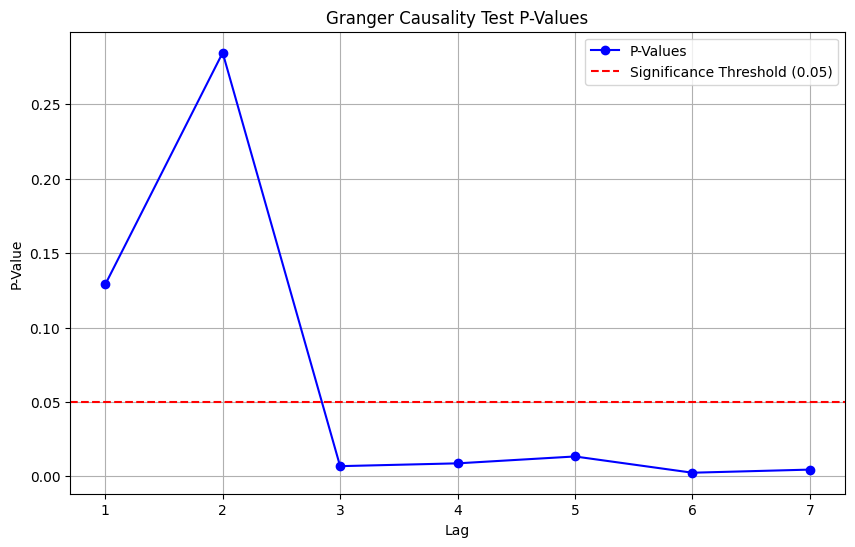

In [159]:
plot_granger_causality_p_values(BTC_SOL_1d_price_change, threshold=0.05)

<a id="granger-tests-1d-price-eth-sol"></a>
### 10.3.3 Granger Causality Test: ETH v SOL, 1 Day Price Change

In [160]:
ETH_SOL_1d_price_change = perform_granger_causality_test(ETH_1d_Price_Change, SOL_1d_Price_Change, 7, interval='days')
ETH_SOL_1d_price_change

{1: 0.03755597383755512,
 2: 0.05192307869007609,
 3: 0.005869882334670947,
 4: 0.008813861643115558,
 5: 0.010294808128725224,
 6: 0.010323921032965231,
 7: 0.0042566579562262116}

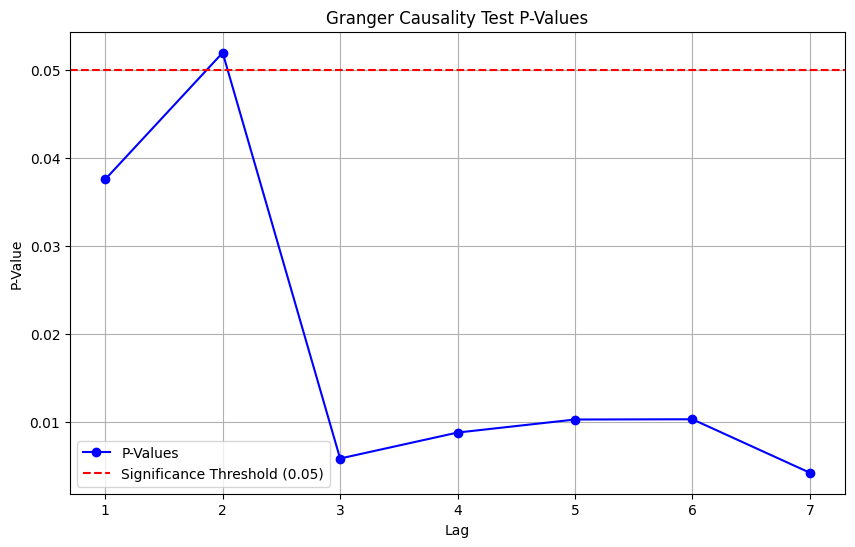

In [161]:
plot_granger_causality_p_values(ETH_SOL_1d_price_change, threshold=0.05)

<a id="granger-tests-1d-vusd-btc-eth"></a>
### 10.3.4 Granger Causality Test: BTC v ETH, 1 Day Trade Volume Change

In [162]:
BTC_ETH_1d_vUSD_change = perform_granger_causality_test(BTC_1d_vUSD_Change, ETH_1d_vUSD_Change, 7, interval='days')
BTC_ETH_1d_vUSD_change

{1: 0.7889212337497414,
 2: 0.27150836574905174,
 3: 0.0040967038657632425,
 4: 0.00816886716160185,
 5: 0.0071124830785015926,
 6: 0.0056664105876641805,
 7: 0.007023591231908087}

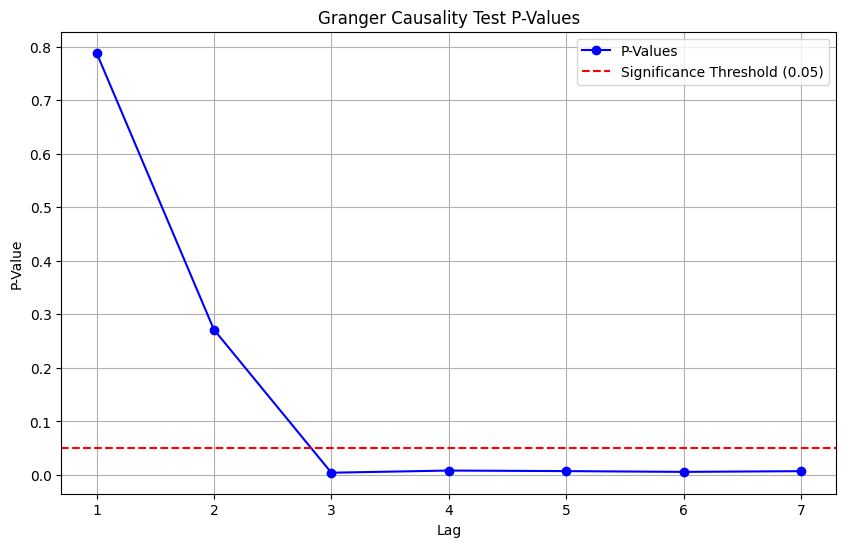

In [163]:
plot_granger_causality_p_values(BTC_ETH_1d_vUSD_change, threshold=0.05)

<a id="granger-tests-1d-vusd-btc-sol"></a>
### 10.3.5 Granger Causality Test: BTC v SOL, 1 Day Trade Volume Change

In [164]:
BTC_SOL_1d_vUSD_change = perform_granger_causality_test(BTC_1d_vUSD_Change, SOL_1d_vUSD_Change, 7, interval='days')
BTC_SOL_1d_vUSD_change

{1: 0.9793225318645382,
 2: 0.8710997452125857,
 3: 0.7789922068173435,
 4: 0.8406916536176136,
 5: 0.8203149032889551,
 6: 0.7116451450518252,
 7: 0.7436799675401768}

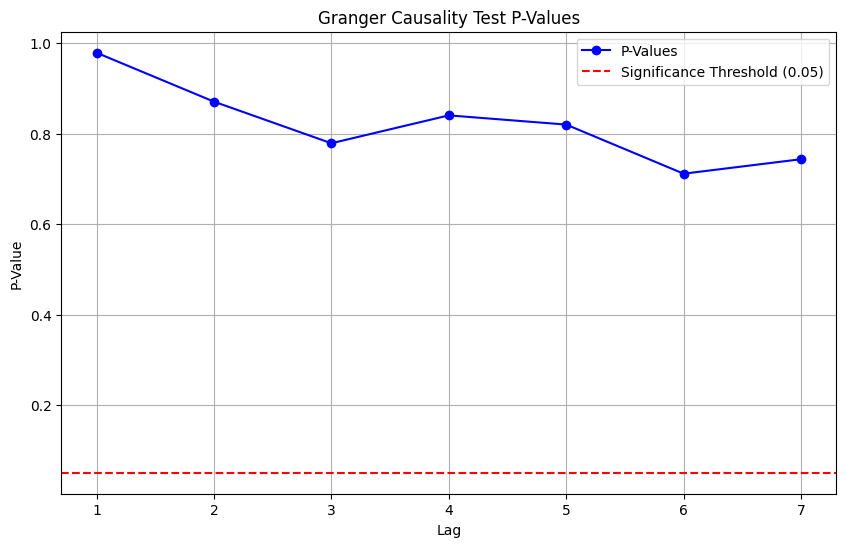

In [165]:
plot_granger_causality_p_values(BTC_SOL_1d_vUSD_change, threshold=0.05)

<a id="granger-tests-1d-vusd-eth-sol"></a>
### 10.3.6 Granger Causality Test: ETH v SOL, 1 Day Trade Volume Change

In [166]:
ETH_SOL_1d_vUSD_change = perform_granger_causality_test(ETH_1d_vUSD_Change, SOL_1d_vUSD_Change, 7, interval='days')
ETH_SOL_1d_vUSD_change

{1: 0.5021393835506525,
 2: 0.7652788657618839,
 3: 0.7502820629652485,
 4: 0.8962037495009931,
 5: 0.8059537227967478,
 6: 0.8643800857420201,
 7: 0.9568744736198418}

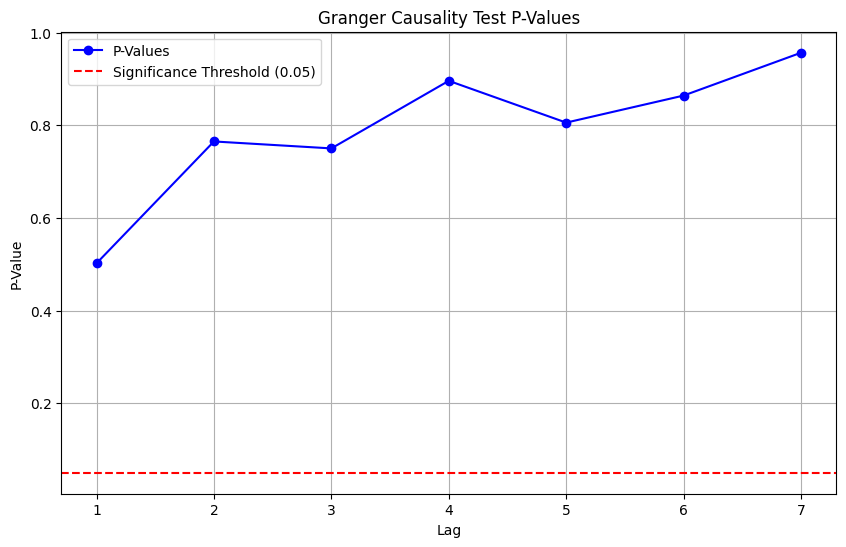

In [167]:
plot_granger_causality_p_values(ETH_SOL_1d_vUSD_change, threshold=0.05)

<a id="granger-tests-1d-reflections"></a>
### 10.3.7 Granger Causality Tests: 1 Day Interval Reflections
- BTC/ETH pair deminstrated Granger causality in price changes every day from lag 1 to 7.
- BTC/ETH also demonstrated Granger causality in trade volume changes from lag 3 to 7.
- BTC/SOL price change pair showed signs of predictive relevance from lag 3 to 7.  However, its p-scores for days 1 & 2 were very high.
- ETH/SOL price change pair likewise showed predictive relevance from lag 4 to 7, with days prior scoring very high.
- Further research is suggested to inquire why the sudden spikes of predictive relevance occur at lag 3 & 4.


<a id="granger-tests-7d"></a>
## 10.4 Granger Causality Tests: 7 Day Intervals

<a id="granger-tests-7d-price-btc-eth"></a>
### 10.4.1 Granger Causality: BTC v ETH, 7 Day Price Change

In [168]:
BTC_ETH_7d_price_change = perform_granger_causality_test(BTC_7d_Price_Change, ETH_7d_Price_Change, 28, interval='weeks')
BTC_ETH_7d_price_change

{1: 0.5546773770219754,
 2: 0.41055993405970437,
 3: 0.20556037264784088,
 4: 0.16584828641102614,
 5: 0.007650328159239125,
 6: 0.00582516348537924,
 7: 0.00039359997545415686,
 8: 0.002831220653053436,
 9: 0.0006241440109652678,
 10: 0.0008261209646400218,
 11: 3.8782592821135415e-06,
 12: 5.126559188338096e-06,
 13: 1.546602745928953e-05,
 14: 9.981031811620165e-06,
 15: 8.845176726808996e-05,
 16: 0.00014885918188557127,
 17: 0.000196937834890727,
 18: 0.00011372206233679957,
 19: 6.91400283824175e-05,
 20: 0.00011197714150934638,
 21: 0.00017605307555204952,
 22: 4.8539553230431475e-05,
 23: 1.0253421532347885e-05,
 24: 1.4571206123890668e-05,
 25: 1.371083638080065e-05,
 26: 3.248154926561449e-05,
 27: 5.341380150226832e-05,
 28: 0.00018704317288272985}

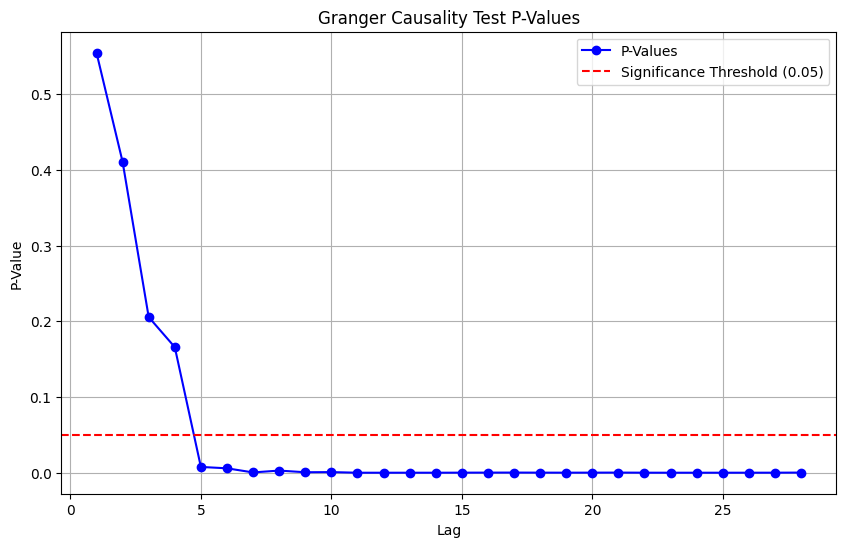

In [169]:
plot_granger_causality_p_values(BTC_ETH_7d_price_change, threshold=0.05)

<a id="granger-tests-7d-price-btc-sol"></a>
### 10.4.2 Granger Causality: BTC v SOL, 7 Day Price Change

In [170]:
BTC_SOL_7d_price_change = perform_granger_causality_test(BTC_7d_Price_Change, SOL_7d_Price_Change, 28, interval='weeks')
BTC_SOL_7d_price_change

{1: 0.6071222265973817,
 2: 0.8590266422431483,
 3: 0.9190621623725478,
 4: 0.07167512686192647,
 5: 0.028219829372469137,
 6: 0.01744086512977748,
 7: 0.0004913984044534307,
 8: 0.0013441399116401887,
 9: 0.0013937181001670387,
 10: 0.00442393369649155,
 11: 0.005479271312017943,
 12: 0.01328534899754883,
 13: 0.018471281113049954,
 14: 0.015130859625587472,
 15: 0.004959184474925305,
 16: 0.007644504241123068,
 17: 0.008919605379531459,
 18: 0.003621084508492255,
 19: 0.00344780127640348,
 20: 0.005624954243911201,
 21: 0.006425503928987868,
 22: 0.0020301363376541578,
 23: 0.001775593479965715,
 24: 0.0017098621443766985,
 25: 0.0014950404135299533,
 26: 0.0009272622196225684,
 27: 0.0005140768791972685,
 28: 0.0007391049657966786}

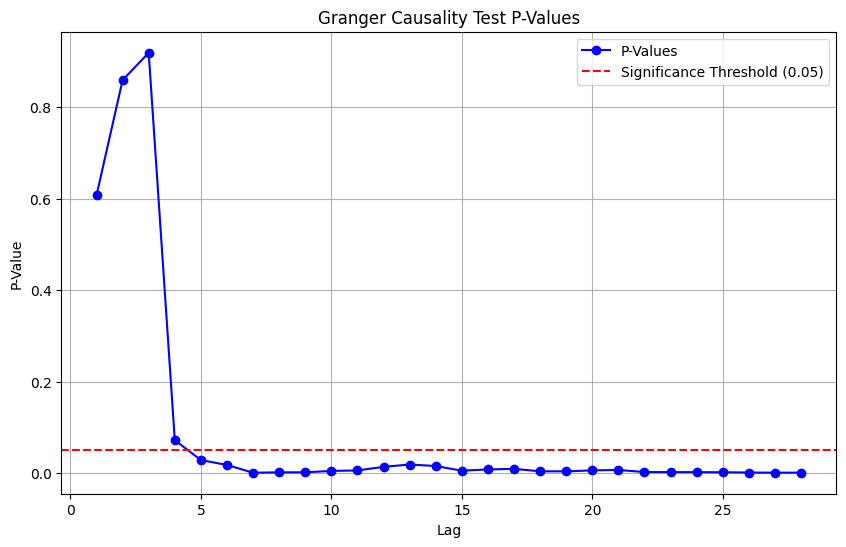

In [171]:
plot_granger_causality_p_values(BTC_SOL_7d_price_change, threshold=0.05)

<a id="granger-tests-7d-price-eth-sol"></a>
### 10.4.3 Granger Causality: ETH v SOL, 7 Day Price Change

In [172]:
ETH_SOL_7d_price_change = perform_granger_causality_test(ETH_7d_Price_Change, SOL_7d_Price_Change, 28, interval='weeks')
ETH_SOL_7d_price_change

{1: 0.6146674571204347,
 2: 0.29228144290301616,
 3: 0.4989951637366963,
 4: 0.07800547717557496,
 5: 0.09979095872739144,
 6: 0.12387827241348197,
 7: 0.020282612059414815,
 8: 0.09963520012525609,
 9: 0.06329058275335374,
 10: 0.09531033077126046,
 11: 0.06701230731196765,
 12: 0.0970947245347336,
 13: 0.11533158926416442,
 14: 0.1174169488794136,
 15: 0.24598125065575463,
 16: 0.2550842445605974,
 17: 0.2129775677608121,
 18: 0.2531553360292714,
 19: 0.2793696125839765,
 20: 0.28123185234511827,
 21: 0.14114642462077412,
 22: 0.0703133801762548,
 23: 0.09054989020889553,
 24: 0.07255652587726272,
 25: 0.04947336177122249,
 26: 0.045247460479559486,
 27: 0.038977912228462024,
 28: 0.04583296706840802}

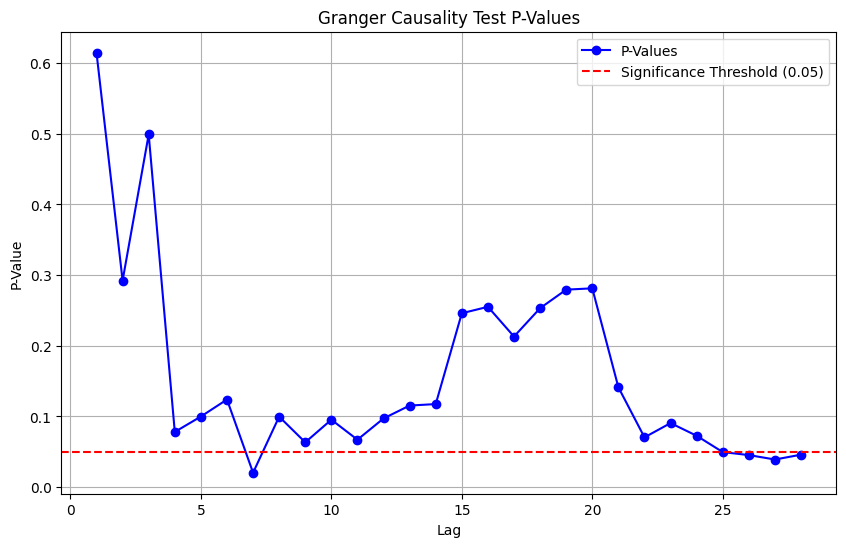

In [173]:
plot_granger_causality_p_values(ETH_SOL_7d_price_change, threshold=0.05)

<a id="granger-tests-7d-vusd-eth-sol"></a>
### 10.4.4 Granger Causality: BTC v ETH, 7 Day Trade Volume Change

In [174]:
BTC_ETH_7d_vUSD_change = perform_granger_causality_test(BTC_7d_vUSD_Change, ETH_7d_vUSD_Change, 28, interval='weeks')
BTC_ETH_7d_vUSD_change

{1: 0.0035268287228994106,
 2: 0.032099617406725206,
 3: 0.04712356034290853,
 4: 0.000743390115799151,
 5: 0.0009479183917664279,
 6: 0.00045430608832586216,
 7: 0.0010604396961921359,
 8: 0.00250592690189169,
 9: 0.0033519449581178025,
 10: 0.004578935842663805,
 11: 0.00636297722205725,
 12: 0.01156879993067577,
 13: 0.01472022115985187,
 14: 0.03244644951859417,
 15: 0.047627120339526506,
 16: 0.03571220096049783,
 17: 0.03654478250310318,
 18: 0.050000060300455625,
 19: 0.06247698894703978,
 20: 0.06546462467767436,
 21: 0.08177860988260134,
 22: 0.0919220331911691,
 23: 0.08593440003572952,
 24: 0.09680744807200044,
 25: 0.04110450537122441,
 26: 0.021160796806146933,
 27: 0.025941431660830714,
 28: 0.03881459220831872}

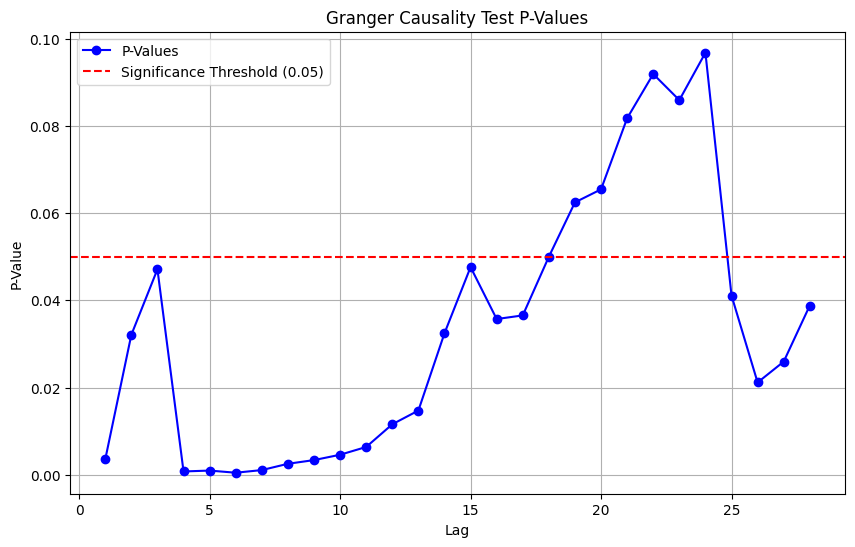

In [175]:
plot_granger_causality_p_values(BTC_ETH_7d_vUSD_change, threshold=0.05)

In [176]:
ETH_BTC_7d_vUSD_change = perform_granger_causality_test(ETH_7d_vUSD_Change, BTC_7d_vUSD_Change, 28, interval='weeks')
ETH_BTC_7d_vUSD_change

{1: 0.039647829364071456,
 2: 0.14932303522116444,
 3: 0.18984712906257872,
 4: 0.02655715258264701,
 5: 0.06875351432832592,
 6: 0.06769363078905369,
 7: 0.3808814094009404,
 8: 0.6199784017846306,
 9: 0.6788737938019618,
 10: 0.7927017831315335,
 11: 0.7633936890465846,
 12: 0.8275825880632222,
 13: 0.8025337647248699,
 14: 0.5439504656326244,
 15: 0.6004452607018269,
 16: 0.6696910286331546,
 17: 0.7343029501899528,
 18: 0.7973190973893691,
 19: 0.8370827053107219,
 20: 0.8618869788079637,
 21: 0.8804645521828021,
 22: 0.910090563948135,
 23: 0.9307766245188782,
 24: 0.9501051418351758,
 25: 0.9596992663735933,
 26: 0.9677210305874117,
 27: 0.9789058286179104,
 28: 0.9421056822627202}

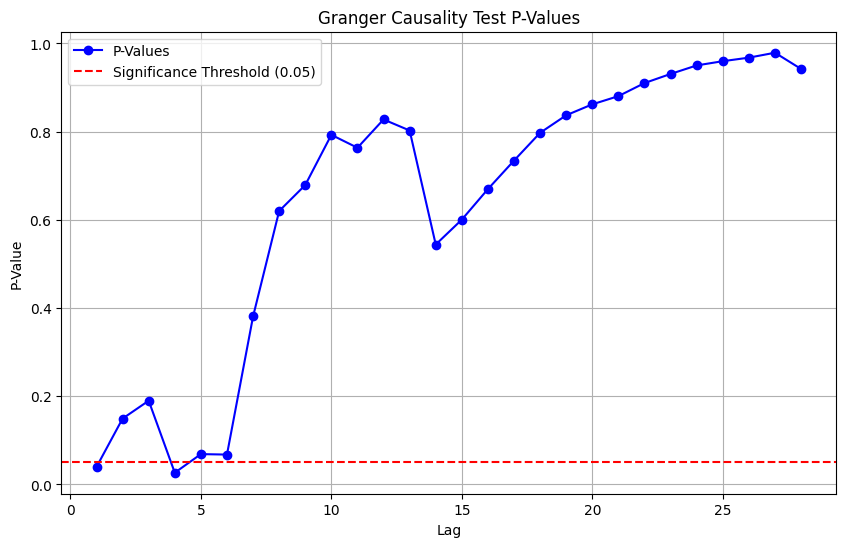

In [177]:
plot_granger_causality_p_values(ETH_BTC_7d_vUSD_change, threshold=0.05)

<a id="granger-tests-7d-vusd-btc-sol"></a>
### 10.4.5 Granger Causality: BTC v SOL, 7 Day Trade Volume Change

In [178]:
BTC_SOL_7d_vUSD_change = perform_granger_causality_test(BTC_7d_vUSD_Change, SOL_7d_vUSD_Change, 28, interval='weeks')
BTC_SOL_7d_vUSD_change

{1: 0.5332491170709889,
 2: 0.47053063055877886,
 3: 0.6638350060383634,
 4: 0.6284435367433375,
 5: 0.5517435190015467,
 6: 0.7436272875044883,
 7: 0.6144982326189254,
 8: 0.73093187025724,
 9: 0.7096843728970548,
 10: 0.6188671080622733,
 11: 0.6736803030144158,
 12: 0.6289289632601744,
 13: 0.6356405642719306,
 14: 0.6820190800448156,
 15: 0.6355589346317785,
 16: 0.6844925361421332,
 17: 0.743949602733577,
 18: 0.7955153388138774,
 19: 0.3425804769131158,
 20: 0.415438938841467,
 21: 0.3387231802748492,
 22: 0.2560716511905225,
 23: 0.21815510781718928,
 24: 0.07503130320401186,
 25: 0.0765595888311073,
 26: 0.07784243034406989,
 27: 0.09715887022602515,
 28: 0.09929782440797098}

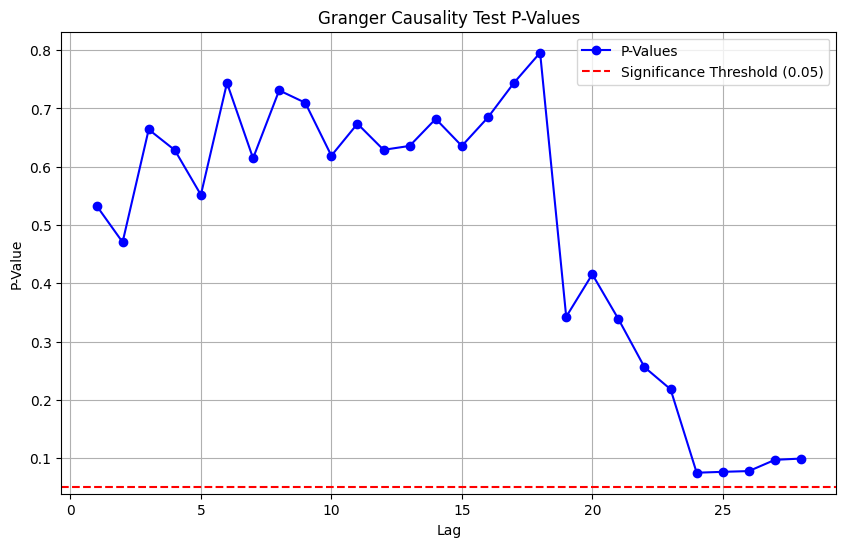

In [179]:
plot_granger_causality_p_values(BTC_SOL_7d_vUSD_change, threshold=0.05)

<a id="granger-tests-7d-vusd-eth-sol"></a>
### 10.4.6 Granger Causality: ETH v SOL, 7 Day Trade Volume Change

In [180]:
ETH_SOL_7d_vUSD_change = perform_granger_causality_test(ETH_7d_vUSD_Change, SOL_7d_vUSD_Change, 28, interval='weeks')
ETH_SOL_7d_vUSD_change

{1: 0.5467070797495883,
 2: 0.7777695480991088,
 3: 0.868704373976741,
 4: 0.7543977832341362,
 5: 0.8632384911101928,
 6: 0.895278329422839,
 7: 0.9731480267653255,
 8: 0.986701622801437,
 9: 0.9881540254602617,
 10: 0.5973592399997607,
 11: 0.6817668165513567,
 12: 0.6631304662613801,
 13: 0.48977564737407475,
 14: 0.5620332539197208,
 15: 0.5875205399164689,
 16: 0.5024091185518914,
 17: 0.5805054657997999,
 18: 0.6347418666497728,
 19: 0.5697961674984147,
 20: 0.6051256348372926,
 21: 0.6371800574598325,
 22: 0.6191973581393584,
 23: 0.6698621470730043,
 24: 0.5922123540415476,
 25: 0.5269995692760632,
 26: 0.5922825980934278,
 27: 0.6388778890369151,
 28: 0.6762270590004371}

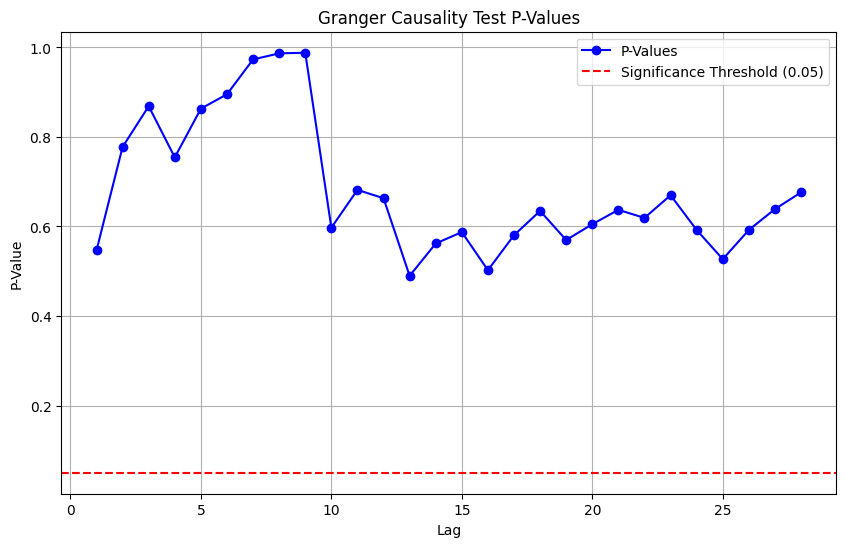

In [181]:
plot_granger_causality_p_values(ETH_SOL_7d_vUSD_change, threshold=0.05)

<a id="granger-tests-7d-reflections"></a>
### 10.4.7 Granger Causality Tests: 7 Day Interval Reflections
**Price Changes**
- We see strong evidence for BTC/ETH causality from week 5 onward through week 28
- Equally convincing eidence for causality as seen in BTC/SOL from week 5 through 27
- ETH/SOL showed sporadic indications of causality at eek 7 and again from week 25 to 28. The trends were erratic, not convincing of causality.
**Volume**
- There was a fairly convincing trand of causality in BTC/ETH trade volume from week 1 to 18.  At that point, the p-value spiked, and then returned below the threshold at week 25. This six week aberration leaves questions that, like elsewhere in this study, might be answered at looking at events and public sentiment during the period in question.

# Closing Thoughts on Analysis
- Throughout this analysis, there was recurring evidence of relationships between Bitcoin and Ethereum, and Bitcoin and Solana.
- These relationships exist both in percent changes in price and in trade volume movements.
- After scatterplots demonstrative of these correlatoins, the charts overlapping the time series decompositions trends of the three coins drove this point home well.  Both over the 30 and 120 day periods, we see the three coins move in such a way that it appears that Ethereum, and then Solana, mimic Bitcoin fluctuations, only at a greater magnitude.
- Granger causality tests further galvanized the claim of correlation and causation, rippling out from Bitcoin.
- Independent relationships between Ethereum and Solana might in fact exist, although we can't confidently assert this in light of the persuasive pull of Bitcoin.
- Opportunities to trade Ethereum and Solana in response to Bitcoin movement would seem to yield greater returns, given the greater magnitude of change the two coins exhibit around Bitcoin fluctuations.
- We suggest further study into external events and relevant sentiments that might be at play on the coins' movements in order to verify whether or not coin movements are in response to Bitcoin, or if all are just in response to events and investor responses to the events. 